# **Asignatura**: Aprendizaje Automático

**Práctica 3**: Introducción a Deep Learning

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 23 de Mayo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>María Cribillés Pérez</mark>





**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de clasificar imágenes que contienen prendas de ropa, prediciendo la categoría de la imagen de entrada que contiene la prenda. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Han Xiao, Kashif Rasul, Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, Technical Report, ArXiv, 2017 (URL: <a href="https://arxiv.org/abs/1708.07747">https://arxiv.org/abs/1708.07747</a>).

## El conjunto de datos

**Fashion-MNIST** es un conjunto de datos que contiene imágenes de artículos de venta online desde la web de **Zalando**. Se distribuye en dos conjuntos de entrenamiento (60.000 imágenes) y test (10.000 imágenes) de prendas de ropa en escala de grises, donde cada imagen tiene un tamaño de 28 filas y 28 columnas. Cada una de las prendas se corresponde con una etiqueta entre 10 classes posibles:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

Una muestra de ejemplo del contenido del conjunto de datos se ilustra en la siguiente figura:

<center>
<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" />
</center>


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático con **Keras** capaz de identificar, si es posible, la categoría a la que pertenece cada prenda de ropa, tratando de alcanzar el máximo rendimiento en la resolución del problema.

El dataset se encuentra disponible en **Keras**, y puede leerse como se muestra en la siguiente celda de código:

In [ ]:
import tensorflow as tf #importamos la libreria necesaria

Train, Test= tf.keras.datasets.fashion_mnist.load_data() #cargamos el dataset dividido en train y test
print('Conjunto de training: ', type(Train), len(Train)) #imprimimos el tipo
print('Conjunto de test: ', type(Test), len(Test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Conjunto de training:  <class 'tuple'> 2
Conjunto de test:  <class 'tuple'> 2


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos tipos de modelos distintos de **Deep Learning**: Al primero lo llamaremos **C1** y al segundo **C2**.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, partiremos de la propuesta realizada en el siguiente artículo:

- E. Xhaferra, E. Cina and L. Toti, "Classification of Standard FASHION MNIST Dataset Using Deep Learning Based CNN Algorithms," 2022 International Symposium on Multidisciplinary Studies and Innovative Technologies (ISMSIT), Ankara, Turkey, 2022, pp. 494-498, doi: 10.1109/ISMSIT56059.2022.9932737 (URL: <a href="https://ieeexplore.ieee.org/document/9932737">https://ieeexplore.ieee.org/document/9932737</a>.




La arquitectura de la red para el modelo **C1** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 26x26 </td>
  <td> 1 | 6 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 26x26 | 13x13 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 13x13 | 11x11 </td>
  <td> 6 | 10 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 11x11 | 5x5 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 250 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>



Por otra parte, la arquitectura de la red para el modelo **C2** es la siguiente:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 112 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 112 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 128 </td>
</tr>
<tr>
  <td></td>
  <td> Batch Norm. </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 25088 | 208 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 208 | 160 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 160 | 128 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Dropout(0.1) </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> FC </td>
  <td> - </td>
  <td> 128 | 10 </td>
  <td> - </td>
</tr>
</table>


**Entrene cada modelo un total de 20 épocas. Pruebe con dos tipos de tamaño de batch (64 y 1000) en cada modelo.**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>

In [ ]:
# Añadimos las librerias necesarias
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, ReLU, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import ReduceLROnPlateau

## Análisis descriptivo y exploratorio de los datos


Empezamos cargando el dataset. Segun la información de Keras:
keras.datasets.fashion_mnist.load_data()

Carga el dataset *Fashion-MNIST*.

Se trata de un conjunto de datos de 60.000 imágenes en escala de grises de 28x28 de 10 categorías de moda, junto con un conjunto de prueba de 10.000 imágenes.

Las clases (etiquetas) son:

* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

Esa función nos devuelve:

Tupla de vectores NumPy: (x_train, y_train), (x_test, y_test).

x_train: uint8 NumPy array de datos de imagen en escala de grises con formas (60000, 28, 28), que contiene los datos de entrenamiento.

y_train: matriz NumPy uint8 de etiquetas (enteros en el rango 0-9) con forma (60000,) para los datos de entrenamiento.

x_test: uint8 matriz NumPy de datos de imagen en escala de grises con forma (10000, 28, 28), que contiene los datos de prueba.

y_test: matriz NumPy uint8 de etiquetas (enteros en el rango 0-9) con forma (10000,) para los datos de prueba.

In [ ]:
#Cargamos el dataset, tanto train y test, como imagenes y etiquetas de cada conjunto
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Creamos un DataFrame con cada tipo de ropa. Para ello creamos un array con el nombre de los tipos de ropa y despues mapeamos cada numero con el nombre.

In [ ]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] #nombre de cada tipo de ropa
train_labels_named = [label_names[label] for label in train_labels] #dentro de las etiquetas del train mapeamos como 0 la primera ropa y asi sucesivamente
test_labels_named = [label_names[label] for label in test_labels] #lo mismo para test

In [ ]:
# contamos las clases de train y test
train_counter = Counter(train_labels_named)
test_counter = Counter(test_labels_named)

print(train_counter)
print(test_counter)

Counter({'Ankle boot': 6000, 'T-shirt/top': 6000, 'Dress': 6000, 'Pullover': 6000, 'Sneaker': 6000, 'Sandal': 6000, 'Trouser': 6000, 'Shirt': 6000, 'Coat': 6000, 'Bag': 6000})
Counter({'Ankle boot': 1000, 'Pullover': 1000, 'Trouser': 1000, 'Shirt': 1000, 'Coat': 1000, 'Sandal': 1000, 'Sneaker': 1000, 'Dress': 1000, 'Bag': 1000, 'T-shirt/top': 1000})


Podemos observar como hay un balanceo perfecto ya que hay de todos los tipos de ropa la misma cantidad.

El conteo que hemos hecho antes lo hemos convertido en un dataframe para poder visualizarlo. Lo hacemos solo en train ya que no es correcto estudiarlo en la partición de test.

In [ ]:
#Lo convertimos en otro dataframe
train_df = pd.DataFrame(list(train_counter.items()), columns=["Category", "Count"])
test_df = pd.DataFrame(list(test_counter.items()), columns=["Category", "Count"])

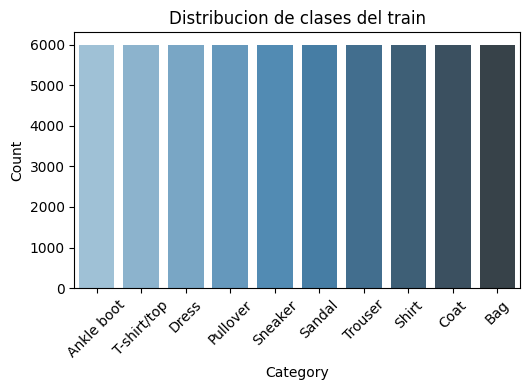

In [ ]:
# visualizamos el balance de clases con seaborn
plt.figure(figsize=(10, 4)) #creamos una figura de ese tamaño

# grafico para entrenamiento
plt.subplot(1, 2, 1) #dividimos la figura en una fila y dos columnas (una para train y otra para test)
sns.barplot(x='Category', y='Count', hue='Category', data=train_df, palette='Blues_d', legend=False) #grafico de seaborn
plt.title("Distribucion de clases del train") #titulo
plt.xticks(rotation=45) #el nombre de las columnas lo roto para que no se solapen

plt.tight_layout()
plt.show() #lo enseñamos


In [ ]:
#vemos el tamaño exacto de las imagenes
train_images.shape

(60000, 28, 28)

Tenemos 60000 imagenes en train y cada una tiene un tamaño de 28x28. Nos quedamos solo con la primera que es que hay 60000 imágenes.

Vamos a ver como son las imágenes de nuestro dataset como ejemplo. Solo lo hacemos del train ya que no es una buena práctica y sería incorrecto hacerlo del test, de hecho, estaríamos haciendo data snooping.

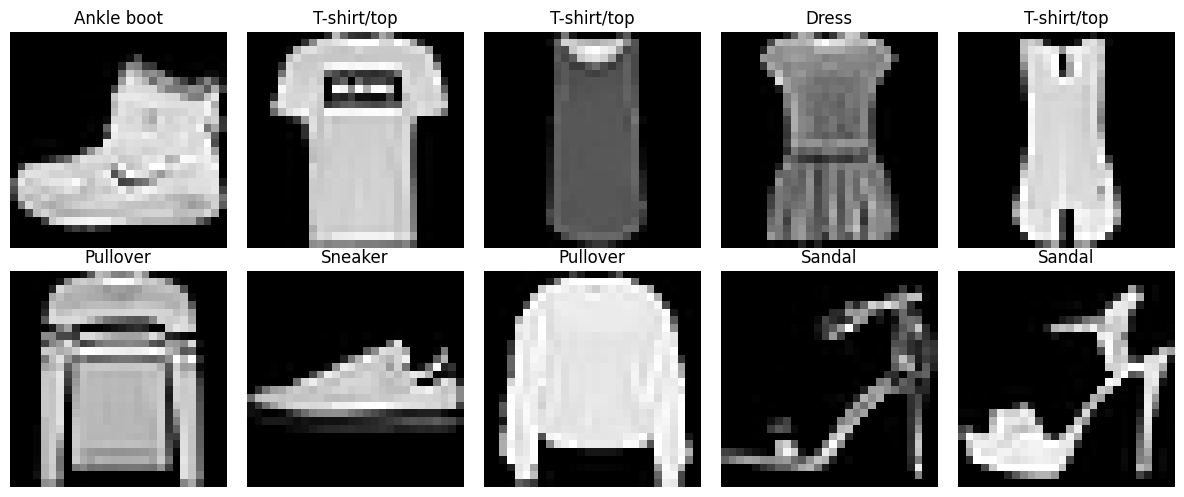

In [ ]:
# Cuantas imagenes hay
image_shape = train_images.shape[1:]

# visualizamos ejemplos de la imagenes
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) #figura de 2 filas y 5 columnas
for i, ax in enumerate(axes.flat): #para cada imagen
    ax.imshow(train_images[i], cmap='gray') #mostramos una imagen
    ax.set_title(label_names[train_labels[i]]) #le ponemos su titulo
    ax.axis('off')
plt.tight_layout()
plt.show() #enseñamos la figura creada

Vamos a crear un diccionario con un resumen de las imagenes, es decir, con lo mas importante.

In [ ]:
# Diccionario con un resumen
data_summary = {
    'Conjunto': ['Entrenamiento', 'Test'], #tipo de conjunto
    'Número de imágenes': [train_images.shape[0], test_images.shape[0]],
    'Dimensiones de imagen': [image_shape, image_shape],
    'Número de clases': [len(train_df), len(test_df)]
}

In [ ]:
# Resumen:
summary_df = pd.DataFrame(data_summary)
print(summary_df)

        Conjunto  Número de imágenes Dimensiones de imagen  Número de clases
0  Entrenamiento               60000              (28, 28)                10
1           Test               10000              (28, 28)                10


Recapitulando, tenemos train con 60000 imagenes y test con 10000 donde todas las imagenes tienen un size de 28x28 y tenemos un total de 10 clases de tipo de ropa.

Como son imágenes, vamos a ver el rango de valores que puede tomar cada pixel. Es decir, son imágenes en blanco y negro que van desde 0 a 255.

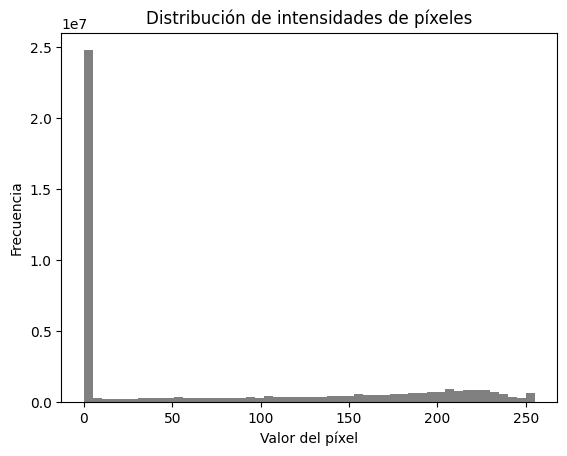

In [ ]:
# histograma con el valor de los pixeles
plt.hist(train_images.ravel(), bins=50, color='gray')
plt.title("Distribución de intensidades de píxeles")
plt.xlabel("Valor del píxel")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar como la gran mayoría es el valor 0 ya que es el fondo, color negro. El resto de niveles de intensidad es bastante parecido aunque en la parte derecha, más tirando a blanco parace haber un poco más de densidad.

## Preprocesado de datos
Vamos a preparar un poco los datos antes de entrenar ya que suele ser mejor tener buenos datos para que den buenos resultados. Aun así, nos daremos cuenta que hace falta poco preprocesado ya que los datos están bastante filtrados y dan buenos resultados de por sí. Vamos a plantear los siguientes apartados:

*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos




### Selección y extracción de características

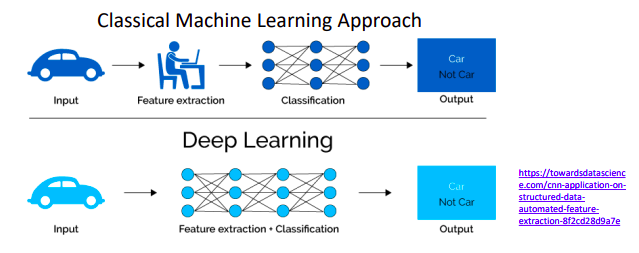

En las prácticas anteriores (primer enfoque de la imagen), hemos sido nosotros los que hemos tenido que hacer una extracción manual de las características y atributos. Después, una vez las teníamos seleccionadas aplicabamos un modelo para clasificar. En Deep Learning, no somos nosotros los que extraemos las características, si no que como input va directamente la imagen y es la propia red neuronal la que extrae directamente las características para hacer la clasificación. Por tanto, como estamos trabajando con imágenes y con redes convolucionales que ya van a aprender las características de las propias imágenes, no hace falta hacer manualmente una selección y extracción de características.

### Reducción de dimensionalidad

Estamos trabajando con imágenes de 28x28 pixeles que son bastante pequeñas en general, por lo que no vamos a reducir la dimensionalidad de la imagen. Buscando en internet cual es el tamaño estándar con el que se trabaja, lo que más me he encontrado es de 224x224 o 128x128.

Como las redes neuronales buscan características, incluso hasta las más pequeñas como texturas o bordes, si reducimos más se podría perder información. Además, en las cnn se suelen hacer pooling que es para reducir la imagen y tener otra perpectiva, por lo que reducidiría más la imagen y no tendría mucho sentido ya que posiblemente no se podría apreciar nada.

### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos. Puede ser mucho más alto o mucho más bajo que los demás puntos de datos. Esto puede hacer que se desvie el ajuste del modelo.

Pueden  ser errores de medición o de ejecución.

Para las prácticas anteriores, calculabamos el rango intercuartílico, pero con imágenes ahora es más complicado porque como mucho podemos ver si hay imágenes corruptas, totalmente en blanco, totalmente en negro, con ruido visual... Yo voy a mirar lo más básico que es ver si hay imágenes enteras en negro o enteras en blanco.

Aun así, al ser un famoso dataset está ya previamente preprocesado, por lo que no es normal que haya una imagen corrupta.

In [ ]:
#Vemos en el train el numero de imagenes todo blanco y todo negro por si hay alguna corrupta
img_tot_negra=np.sum(train_images==0, axis=(1,2))==(28*28) #si absolutamente todos los pixeles son 0 (negro)
img_tot_blanca=np.sum(train_images==255, axis=(1,2))==(28*28)#si absolutamente todos los pixeles son 255 (blanco)

In [ ]:
print("Numero img totalmente negras:", np.sum(img_tot_negra))
print("Numero img totalmente blancas:", np.sum(img_tot_blanca))

Numero img totalmente negras: 0
Numero img totalmente blancas: 0


### Missing values


Vamos a ver si hay imágenes nulas en el dataset:

In [ ]:
print("NaNs en train_images:", np.isnan(train_images).any()) #vemos si hay alguna imagen en los conjuntos que sea de tipo nan
print("NaNs en train_labels:", np.isnan(train_labels).any())

NaNs en train_images: False
NaNs en train_labels: False


Podemos comprobar también que todos los pixeles esten en el rango correspondiente:

In [ ]:
print("Minimo y maximo:", np.min(train_images), np.max(train_images)) #minimo y maximo

Minimo y maximo: 0 255


Podemos ver que todo está en orden y que efectvimente el dataset está limpio para usar sobre este aspecto.

### Escalado de variables

Vamos a transformar los datos numéricos de los píxeles. Es decir, ahora mismo hemos visto que los píxeles van desde 0 (negro) hasta 255 (blanco). Sin embrgo, es importante escalar los valores de píxeles entre 0 y 1.

Esta transformación ayuda a las redes neuronales a procesar las imágenes con mayor eficacia. Al normalizar obligas a que las imágenes se centren en torno al cero, lo que hace que el entrenamiento sea más rápido. También evita el sobreajuste porque todas las características van a contribuir por igual. Además, puede que si no se escalan los gradientes durante el entrenamiento se vuelvan inestables y tarde más en aprender.

Referencia: https://medium.com/@piyushkashyap045/image-normalization-in-pytorch-from-tensor-conversion-to-scaling-3951b6337bc8



Vamos a aplicar MinMaxScaler: transforma los datos paar que estén en un rango, suele ser entre 0 y 1.

La fórmula que utiliza es:
$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$


In [ ]:
train_images=train_images/255.0 #dividimos entre el maximo (el minimo es 0)
test_images=test_images/255.0

In [ ]:
print("Minimo y maximo:", np.min(train_images), np.max(train_images)) #miniom y maximo

Minimo y maximo: 0.0 1.0


### Codificación y transformación de datos

En el propio dataset ya vienen las etiquetas del 0 al 9 dependiendo del tipo.

Al igual que en el ejemplo proporcionado en prado, en TensorFlow, el procesamiento de imágenes necesita especificar de forma explítica la profundidad o canales que tiene cada imagen. Aunque estén en blanco y negro, es necesario y obligado explicitar que hay un único canal.

Haremos esto incluyendo una última dimensión a los datos de entrada.

Las imágenes originales tienen la dimensión (60000, 28, 28) y lo que vamos a hacer es ponerlo de la siguiente forma: (batch_size, height, width, channels)

In [ ]:
train_images = np.expand_dims(train_images, axis=-1) #axis=-1 añade una dimension al final que es el canal del color
test_images = np.expand_dims(test_images, axis=-1) #como las imagenes estan en escala de grises el numero de canales es 1

In [ ]:
train_images.shape

(60000, 28, 28, 1)

Convertimos a tensores de TensorFlow aunque no siempre es necesario.

In [ ]:
train_images_tensor = tf.convert_to_tensor(train_images, dtype=tf.float32) #convertimos a tensor
train_labels_tensor = tf.convert_to_tensor(train_labels, dtype=tf.int32)

test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

In [ ]:
train_images_tensor.shape #dimension

TensorShape([60000, 28, 28, 1])

Se mantiene el canal añadido antes.

### Desbalanceo de datos


Hemos visto antes que no estaban desbalanceados y de hecho lo hemos comprobado visualmente.  

In [ ]:
unique, counts = np.unique(train_labels, return_counts=True) #contamos los ejemplos de cada clase
print(dict(zip(unique, counts)))

{np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


Efectivamente podemos comprobar como está lo máximo balanceado posible ya que cada clase tiene 6000 datos.

## Protocolo de de validación experimental y métricas


Para las redes neuronales convolucionales se divide en tres conjuntos: entrenamiento, validación y test.

Ya hemos dividido entre entrenamiento y test porque es lo que viene predeterminado en el propio dataset: en train 60000 imágenes y en test 10000 imágenes. Por tanto, ahora vamos a hacer dentro de entrenamiento una división del 80% para entrenamiento y 20% para validación. Hacemos que la partición sea estratificada, es decir, que mantenga el mismo porcentaje que teníamos antes (todo igual balanceado) cuando hagamos la división.

In [ ]:
# Dividimos en train y validacion con estratificacion (stratify=train_labels)
X_train, X_val, y_train, y_val=train_test_split(train_images, train_labels, test_size=0.2, random_state=9, stratify=train_labels)

### Métricas de evaluación

Voy a explicar las métricas que voy a utilizar: acuraccy, precision, recall y f1. Sin embargo, están definidas en clasificaciń binaria, por lo que las tenemos que extender a clasificación multiclase.

La accuracy mide el porcentaje de predicciones correctas sobre el total de instancias. Se calcula como:

$$ \text{Accuracy} = \frac{\text{Numero de predicciones correctas}}{\text{Total de muestras}} $$


La precisión mide cuántos de los ejemplos clasificados en una clase específica realmente pertenecen a esa clase. Se calcula como:

$$ \text{Precision} = \frac{TP}{TP + FP}$$

donde:


*   TP (True Positives) son las instancias correctamente clasificadas en la clase.
*   FP (False Positives)son las instancias incorrectamente clasificadas en la clase



Para un problema multiclase, hemos utilizado el parámetro "weighted" que calcula la precisión de cada clase y pondera por el número de instancias en cada una:

$$ \text{Precision}_\text{weighted} = \sum_{i=1}^{n} w_i \cdot \text{Precision}_i, \quad \text{donde } w_i = \frac{N_i}{N}$$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.



El recall/sensibilidad mide cuántas instancias de una clase determinada fueron correctamente identificadas. Se calcula como:

$$ \text{Recall} = \frac{TP}{TP + FN} $$

donde:


*   TP (true positives) son las instancias correctamente clasificadas en la clase.

*   FN (false negatives) son las instancias de la clase que fueron clasificadas incorrectamente como otra.

Como en precisión, "*weighted*" pondera los valores de cada clase por su número de muestras:

$$ \text{Recall}_\text{weighted} = \sum_{i=1}^{n} w_i \cdot \text{Recall}_i, \quad \text{donde } w_i = \frac{N_i}{N} $$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.






El F1-score es la media armónica entre la precisión y el recall. Se calcula como:
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Esto equilibra los valores de precisión y recall, asegurando que el modelo no solo sea preciso sino también capaz de identificar correctamente todas las clases.

Al igual que las anteriores utilizamos el parámetro "weighted":

$$ F1_\text{weighted} = \sum_{i=1}^{n} w_i \cdot F1_i, \quad \text{donde } w_i = \frac{N_i}{N} $$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.




Por último, también calcularemos la matriz de confusión ya que nos ayuda a ver cuantos errores ha cometido nuestro modelo y en qué clase se equivoca más. Normalmente, la más común es la matriz de confusión binaria donde se mide los verdaderos positivos (TP), los falsos positivos (FP), falsos negativos (FN) y verdaderos negativos (VN). Sin embargo, como estamos ante un problema de clasificación multiclase, he implementado una matriz donde las filas y columnas sean las 10 clases a clasificar. En las digonales podremos ver las que están bien clasificadas.

In [ ]:
#funcion para evaluar un modelo
def evaluate_model(model, X, y_true, dataset_name="Test"):
    y_pred_probs = model.predict(X) #obtenemos las preducciones del modelo
    y_pred = np.argmax(y_pred_probs, axis=1)#las convierte en probabilidades
    print(f"\n{dataset_name} Metrics")
    print(classification_report(y_true, y_pred, digits=4)) #informe de clasificacion: precision, recall, f1-score, support
    cm = confusion_matrix(y_true, y_pred) #calcula la matriz de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ #nombres de la matriz de confusion
        "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ])
    fig, ax = plt.subplots(figsize=(8, 6)) #preparamos grafico
    disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
    plt.title(f"Matriz de Confusión - {dataset_name}") #nombre del conjunto (train, validacion y test)
    plt.grid(False)
    plt.show()

In [ ]:
#funcion para visualizar la evolucion en entrenamiento de un modelo
#grafica de loss
#grafica de acuraccy y f1
def plot_training_metrics(history, include_f1=False):
    hist = history.history #diccionario con el historico de entrenamiento
    epochs = range(1, len(hist['loss']) + 1) #eje de epocas
    plt.figure(figsize=(16, 4))

    #perdidas
    plt.subplot(1, 3, 1)
    plt.plot(epochs, hist['loss'], label='train', color='tab:blue')
    plt.plot(epochs, hist['val_loss'], label='valid', color='tab:orange')
    plt.title('losses'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

    #accuracy
    plt.subplot(1, 3, 2)
    if 'accuracy' in hist:
        plt.plot(epochs, hist['val_accuracy'], label='valid', color='tab:orange')
        plt.title('accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

    #f1-score
    if include_f1 and 'val_f1_score' in hist:
        plt.subplot(1, 3, 3)
        plt.plot(epochs, hist['val_f1_score'], label='valid', color='tab:orange')
        plt.title('f1_score'); plt.xlabel('Epoch'); plt.ylabel('F1 Score'); plt.legend()

    plt.tight_layout()
    plt.show()

## Modelos de Deep Learning

### Solución: Modelo C1


Lo voy a definir en una funcion porque como voy a hacer varias pruebas de entrenamiento con diferentes hiperparámetros, tengo que volver a definir el modelo antes de volver a entrenar. Si entreno sin volver a definirlo habrán cambiado los pesos el entrenamiento anterior y volver a entrenar desde los pesos ya entrenados, y lo que queremos es hacerlo desde scracth.

In [ ]:
def build_model_c1():
  #Primero creamos con sequential el modelo C1
  model_c1= Sequential()

  #Añadimos la entrada que sabemos que es 28x28x1
  model_c1.add( Input(shape= (X_train.shape[1], X_train.shape[2], X_train.shape[3])) )

  # Primeras capas conv + relu (no añade parametros) + MaxPooling
  model_c1.add( Conv2D(filters=6, kernel_size=(3,3), activation='relu')) #tiene una entrada de 28x28x1 y una salida de 26x26x6
  model_c1.add( MaxPooling2D(pool_size=(2,2)) ) #reduce en dos la dimension (tiene una entrada de 26x26x6 y una salida de 13x13x6)

  # Segundas capas conv + relu + BatchNorm + MaxPooling
  model_c1.add( Conv2D(filters=10, kernel_size=(3,3), activation='relu')) #salida 11x11x10 (el 10 son los canales)
  model_c1.add(BatchNormalization()) #no añade parametros
  model_c1.add( MaxPooling2D(pool_size=(2,2)) ) #salida 13x13x6

  # Transformación para procesamiento por capa densa
  model_c1.add( Flatten() )

  # Primera capa densa + relu
  model_c1.add( Dense(128, activation='relu') )

  # Capa densa de salida (softmax para clasificación)
  model_c1.add( Dense(10, activation='softmax') ) #ponemos 10 porque tenemos 10 clases

  return model_c1

In [ ]:
model_c1=build_model_c1()

#Vemos el resumen del modelo
model_c1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 10)     │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,068 (133.08 KB)

 Trainable params: 34,048 (133.00 KB)

 Non-trainable params: 20 (80.00 B)

### Solución: Modelo C2

In [ ]:
def build_model_c2():
  #Primero creamos con sequential el modelo C2
  model_c2= Sequential()

  #Añadimos la entrada que sabemos que es 28x28x1
  model_c2.add( Input(shape= (X_train.shape[1], X_train.shape[2], X_train.shape[3])) )

  # Primeras capas conv + BatchNorm + relu (no añade parametros)
  model_c2.add( Conv2D(filters=112, kernel_size=(3,3), padding='same')) #salida 28x28x112 (el 112 son los canales)
  model_c2.add(BatchNormalization()) #no añade parametros y tiene mismo size
  model_c2.add(ReLU()) #no añade parametros

  # Segundas capas conv + relu + BatchNorm + relu
  model_c2.add( Conv2D(filters=64, kernel_size=(3,3), padding='same')) #salida 28x28x64
  model_c2.add(BatchNormalization()) #no añade parametros
  model_c2.add(ReLU()) #no añade parametros

  # Tercera conv + BatchNorm + ReLU
  model_c2.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same')) #salida 28x28x128
  model_c2.add(BatchNormalization()) #no añade parametros
  model_c2.add(ReLU()) #no añade parametros

  # MaxPooling
  model_c2.add(MaxPooling2D(pool_size=(2, 2)))#reduce en dos la dimension (tiene una entrada de 28x28x128 y una salida de 14x14x128)

  # Transformación para procesamiento por capa densa
  model_c2.add( Flatten() ) #parametros: 14x14x128=25088

  # Primera capa densa + dropout + relu
  model_c2.add(Dense(208))
  model_c2.add(Dropout(0.1)) #no añade parametros
  model_c2.add(ReLU()) #no añade parametros

  # Segunda capa densa + dropout + relu
  model_c2.add(Dense(160))
  model_c2.add(Dropout(0.1)) #no añade parametros
  model_c2.add(ReLU()) #no añade parametros

  # Tercera capa densa + dropout + relu
  model_c2.add(Dense(128))
  model_c2.add(Dropout(0.1)) #no añade parametros
  model_c2.add(ReLU()) #no añade parametros

  # Capa densa de salida (softmax para clasificación)
  model_c2.add( Dense(10, activation='softmax') ) #ponemos 10 porque tenemos 10 clases

  return model_c2

In [ ]:
model_c2=build_model_c2()

#Vemos el resumen del modelo
model_c2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 112)    │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 112)    │           448 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 28, 28, 112)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        64,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 208)            │     5,218,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 208)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 160)            │        33,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,414,618 (20.66 MB)

 Trainable params: 5,414,010 (20.65 MB)

 Non-trainable params: 608 (2.38 KB)

### Comparativa de los modelos C1 y C2

Podemos observar como el primer modelo es más simple porque tiene solo 34068 parámetros, mientras que el segundo tiene 5.414.618 parámetros que son bastante más. Esto se debe principalmente a que el primero tiene una única capa densa y el segundo tiene 3 y son las capas que más parámetros introducen. Además, el primero tinee solo dos capas convolucionales mientras que el segundo tiene 3 capas convolucionales.

Otra diferencia que veo es que el primero va intercalando capas convolucionales con maxpooling, es decir, que va buscando texturas y bordes en diferentes escalas de la imagen progresivamente mientras que en el segundo mantiene siempre el size de 28x28 hasta que hace un único maxpooling después de las capas convolucionales y antes de las capas densas.

Por otro lado, el primero utiliza menos canales ya que utiliza 6 y 10 mientras que el segundo utiliza muchos más 112,64 y 128.

Ambas utilizan la misma función de activación: ReLu. Sin embargo, la primera hace primero ReLU y después Batch Normalization y en el segundo modelo lo aplica al revés.

Para finalizar, en el segundo modelo se aplica Dropout que es para evitar el sobreajuste. Esto puede ser debido ya que aumentan mucho los parámetros con tantas capas convolucionales y puede que sea más propenso al overfitting. Al serl el segundo más profundo va a tardar más en entrenar.

En conclusión, el primer modelo es mucho más ligero, va a ser rápido de entrenar y no debería de tener overfitting. El segundo es más profundo y complejo, aprenderá más despacio pero puede que mejor y es muy propenso al overfitting.

Las capas convolucionales se suelen intercalar con funciones de activaciones no lineales. En general, estas funciones de activación no cambian la dimensionalidad. Las funciones de activación son muy importantes porque la no linealidad es necesaria para aprender representaciones complejas de los datos de entrada. De lo contrario, si sólo se utilizaran funciones de activación lineales, la red neuronal se comportaría como una función lineal. Si se considera que las funciones de activación de todas las unidades ocultas de una red son lineales, siempre se puede encontrar una red equivalente sin unidades ocultas.

El MaxPooling reduce la dimensionalidad e introduce cierta invariancia a (pequeñas) traslaciones de la entrada (si la entrada se desplaza una pequeña cantidad, la mayoría de los valores de salida del pooling no cambian). Tenemos un tamaño de kernel de 2x2, lo que nos indica es que va a reducir la dimensión a la mitad. Como es un kernel 2x2, estamos cogiendo cajas de 4 y nos quedamos solo con el máximo de ellos.

Al final, antes de hacer la capa densa, tenemos que hacer Flatering para aplanar la salida y realizar una transformación densa de las características extraídas.

En las funciones de activación y en el maxpooling no se añade parámetros (solo estamos cogiendo el máximo de los píxeles).

## Selección y estimación de valores para hiperparámetros


Podemos entender como hiperparámetro como una variable que es externa al modelo (es decir que no se obtiene automáticamente a partir de los datos) y que en su lugar debemos definir manualmente al momento de programar el algoritmo de entrenamiento.

En una red convolucional, los parámetros son por ejemplo los coeficientes de los filtros, encargados de extraer diferentes características de las imágenes, mientras que los hiperparámetros pueden ser el número de filtros, el tamaño de cada filtro o el número de capas convolucionales.

Referencia: https://codificandobits.com/blog/parametros-hiperparametros-machine-learning/

Más concretamente, como el modelo (todo lo referente a la arquitectura) ya nos lo dan fijo para implementarlo, por lo que no vamos a cambiar nada.

Con respecto a la **tasa de aprendizaje**, es sin duda el hiperparámetro más importante ya que si la fijas demasiado alta, el entrenamiento puede divergir y si la fijas demasiado baja, el entrenamiento acabará convergiendo al óptimo, pero tardará
mucho tiempo. Si lo fijas ligeramente alto, al principio progresará muy rápido, pero acabará bailando alrededor del óptimo y nunca llegará a
estabilizarse. Si dispone de una potencia de cálculo limitada, puede que tenga que interrumpir el entrenamiento antes de que haya convergido correctamente, lo que dará lugar a una solución subóptima.

Para poder explicar más el significado matemático de la tasa de aprendizaje vamos a introducir como se entrena un preceptrón. Se basa en una regla de aprendizaje propuesto por Rosenblatt inspirada en la regla de Hebb (1949), la cual establece que si dos neuronas se activan conjuntamente de forma repetida, la conexión entre ellas se fortalece. el perceptrón ajusta sus pesos reforzando aquellas conexiones que contribuyen a una predicción correcta. Para ello, se utiliza la siguiente regla de actualización de pesos:

$$
w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$


* $w_{i,j}$ es el peso que conecta la entrada $x_i$ con la neurona de salida $j$.
* $x_i$ es el valor de la entrada $i$-ésima.
* $\hat{y}_j$ es la salida predicha por la neurona $j$ para la instancia actual.
* $y_j$ es la salida verdadera (etiqueta) de la neurona $j$.
* $\eta$ es la tasa de aprendizaje, un hiperparámetro que controla la magnitud del ajuste.

La importancia de la tasa de aprendizaje es la siguiente:
* Si $\eta$ es muy grande, el aprendizaje puede volverse inestable y saltarse la solución óptima.
* Si $\eta$ es muy pequeño, el modelo aprenderá lentamente y puede atascarse en mínimos subóptimos.


Existen muchas estrategias diferentes para reducir la tasa de aprendizaje durante el entrenamiento y que no sea siempre fijo. También puede ser beneficioso empezar con un
ritmo de aprendizaje bajo, aumentarlo y luego volver a reducirlo. Estas estrategias se denominan programas de aprendizaje. Algunos ejemplos son: Power Scheduling, Programación exponencial, Programación constante a trozos, Performance Scheduling, Programación de 1 ciclo...

Nosotros probaremos con una tasa de aprendizaje constante y después con un programa de aprendizaje llamado ReduceLROnPlateau.

Este scheduler reduce la tasa de aprendizaje automáticamente cuando detecta que la métrica de validación ha dejado de mejorar durante un número determinado de épocas consecutivas. Podremos ajustar el número de épocas que espera sin mejorar (patience) y el multiplicador para reducir la lr (factor). Además, se le puede poner un límite inferior para que no baje de ese número (min_lr). Esto ayuda a evitar oscilaciones y una mejor convergencia. La regla de actualización es:

$$
\eta_{\text{nuevo}} = \eta_{\text{actual}} \cdot \text{factor}
$$

También es importante elegir un **optimizador** mejor que el simple descenso de
gradiente por mini lotes. He elegido tres para poder compararlos: SGD, RMSProp y Adam.

SGD (Stochastic Gradient Descent)es el descenso de gradiente estocástico actualiza los pesos utilizando el gradiente de la función de pérdida sobre un único lote de datos:

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta \mathcal{L}(\theta_t)
$$

* $\theta_t$: vector de pesos en el paso $t$.
* $\eta$: tasa de aprendizaje.
* $\nabla_\theta \mathcal{L}(\theta_t)$: gradiente de la función de pérdida con respecto a los pesos.

Es simple y rápido pero puede oscilar mucho.

Por otro lado tenemos RMSProp que introduce una tasa de aprendizaje adaptativa que se ajusta en cada dimensión según la magnitud reciente de los gradientes:

$$
\begin{aligned}
s_t &= \rho s_{t-1} + (1 - \rho) \nabla_\theta \mathcal{L}(\theta_t)^2 \\
\theta_{t+1} &= \theta_t - \frac{\eta}{\sqrt{s_t + \varepsilon}} \nabla_\theta \mathcal{L}(\theta_t)
\end{aligned}
$$

* $\rho$: tasa de decaimiento (típicamente 0.9).
* $\varepsilon$: término de suavizado para evitar división por cero.
* $s_t$: acumulación exponencial de gradientes al cuadrado.

Para terminar, Adam (Adaptive Moment Estimation) combina las ventajas del momentum y RMSProp. Calcula el primer y segundo momento (media y varianza) de los gradientes:

$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta \mathcal{L}(\theta_t) \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) \nabla_\theta \mathcal{L}(\theta_t)^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon}
\end{aligned}
$$

* $\beta_1 \approx 0.9$, $\beta_2 \approx 0.999$.
* $\hat{m}_t$, $\hat{v}_t$: versiones corregidas del sesgo.

Es mucho más robusto y más utilizado pero puede sobreajustar en algunos casos.


**Función de pérdida:** vamos a utilizar la entropía cruzada categórica (cross entropy loss), dado que tenemos un problema de clasificación multiclase. Esta función mide la discrepancia entre la distribución de probabilidad real (etiquetas verdaderas) y la distribución predicha por el modelo (salida de la capa softmax). Su fórmula es la siguiente:

$$CCE= -\sum_{i=1}^C y_i p_i$$

donde:
* $C$ es el número total de clases posibles.
* $y_i$ es la etiqueta verdadera para la clase $i$ (toma valor $1$ si la clase verdadera es $i$, y $0$ en caso contrario — codificación one-hot).
* $p_i$ es la probabilidad predicha por el modelo para la clase $i$, es decir, la salida de la capa softmax correspondiente a dicha clase.

La función penaliza fuertemente las predicciones erróneas con alta confianza. Si el modelo asigna una probabilidad alta a la clase correcta ($p_i$ cercano a 1 donde $y_i = 1$), la pérdida será baja. Mientras que si el modelo predice con seguridad una clase incorrecta ($p_i$ alto donde $y_i = 0$), la pérdida será alta.


**Tamaño del lote (batch size)** puede tener un impacto significativo en el rendimiento del
modelo y en el tiempo de entrenamiento. La principal ventaja de utilizar lotes de gran tamaño es que los aceleradores de
hardware como las GPU pueden procesarlos de forma eficiente, por lo que el
algoritmo de entrenamiento verá más instancias por segundo. Sin embargo, hay un inconveniente porque los lotes grandes suelen provocar inestabilidades en el entrenamiento, sobre
todo al principio, y el modelo resultante puede no generalizar tan bien como un
modelo entrenado con lotes pequeños. Además, no siempre se tiene una gran memoria para que puedas poner un batch size muy grande.

En este caso también nos lo dan prefijado, pero sería intersante probar con más de dos ejemplos para ver cual funciona mejor.

**Función de activación**: en general, la función de activación ReLU será un buen valor por defecto para todas las capas ocultas. La función lineal unitaria rectificada:
$$ReLU(z) = max(0, z)$$
La función ReLU es continua pero no es diferenciable en z = 0, y su derivada es 0 para z < 0. En la práctica, sin embargo, funciona muy bien y tiene la ventaja de ser rápida de calcular, por lo que se ha convertido en la predeterminada.

Algunas otras funciones de activación (referencia de las diapositivas de teoría):
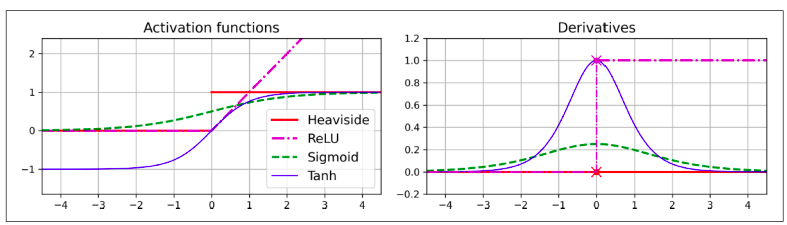



Sin embargo, para la capa de salida realmente depende de la tarea que estemos haciendo. Como en este caso estamos haciendo una clasificación multiclase pues hemos utilizado softmax: si cada instancia puede pertenecer a una clase, de tres o más clases posibles, entonces necesitamos tener una neurona de salida por clase, y debemos utilizar la función de activación softmax para toda la capa de salida. Esta función garantizará que todas las probabilidades estimadas estén entre 0 y 1 y que sumen 1, ya que las clases son excluyentes.  


Ambas están fijas, o bien porque nos lo dan en la arquitectura del modelo o bien por el problema al que nos estamos enfrentando.

**Número de iteraciones**: en la mayoría de los casos, no es necesario ajustar el número de iteraciones de entrenamiento: basta con utilizar la parada anticipada (early stopping). Sin embargo, esto como ya nos lo dan también fijado para que hagamos 20 épocas, no lo vamos a cambiar.

## Entrenamiento y estimación del error fuera de la muestra

### C1

Prueba con:
* SGD
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c1 = build_model_c1() #construimos el modelo c1
model_c1.compile( #compilamos el modelo
    optimizer=SGD(learning_rate=0.001, momentum=0.9), #tasa de aprendizaje y momemtum
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history1=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6319 - loss: 1.0712 - val_accuracy: 0.8077 - val_loss: 0.5419
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8159 - loss: 0.5062 - val_accuracy: 0.8341 - val_loss: 0.4581
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8452 - loss: 0.4321 - val_accuracy: 0.8506 - val_loss: 0.4200
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8602 - loss: 0.3913 - val_accuracy: 0.8491 - val_loss: 0.4176
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8638 - loss: 0.3746 - val_accuracy: 0.8644 - val_loss: 0.3756
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3590 - val_accuracy: 0.8633 - val_loss: 0.3787
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3476 - val_accuracy: 0.8700 - val_loss: 0.3604
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8783 - loss: 0.3352 - val_accuracy: 0.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.8607    0.8896    0.8749      4800
           1     0.9884    0.9790    0.9837      4800
           2     0.8448    0.8462    0.8455      4800
           3     0.9161    0.9117    0.9139      4800
           4     0.8053    0.8738    0.8381      4800
           5     0.9551    0.9831    0.9689      4800
           6     0.7765    0.6965    0.7343      4800
           7     0.9633    0.9360    0.9495      4800
           8     0.9808    0.9788    0.9798      4800
           9     0.9685    0.9669    0.9677      4800

    accuracy                         0.9061     48000
   macro avg     0.9060    0.9061    0.9056     48000
weighted avg     0.9060    0.9061    0.9056     48000



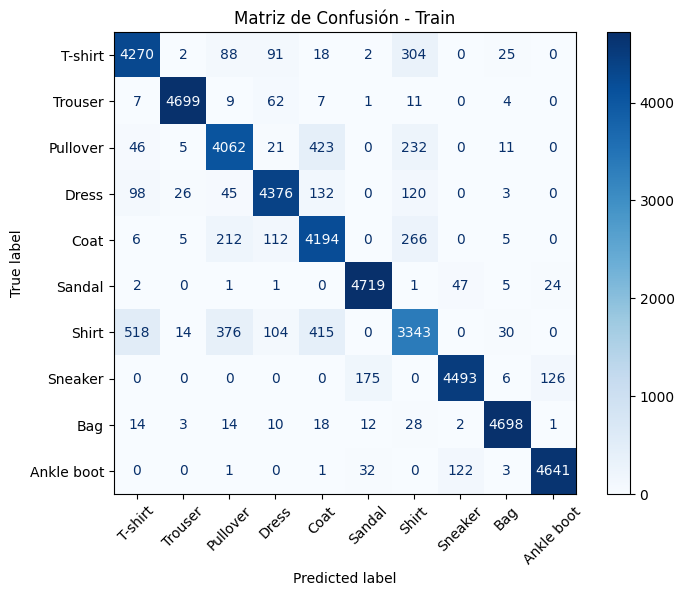

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8213    0.8542    0.8374      1200
           1     0.9848    0.9717    0.9782      1200
           2     0.8134    0.8317    0.8224      1200
           3     0.9093    0.8858    0.8974      1200
           4     0.7952    0.8575    0.8252      1200
           5     0.9391    0.9767    0.9575      1200
           6     0.7282    0.6608    0.6929      1200
           7     0.9485    0.9208    0.9345      1200
           8     0.9773    0.9692    0.9732      1200
           9     0.9612    0.9500    0.9556      1200

    accuracy                         0.8878     12000
   macro avg     0.8878    0.8878    0.8874     12000
weighted avg     0.8878    0.8878    0.8874     12000



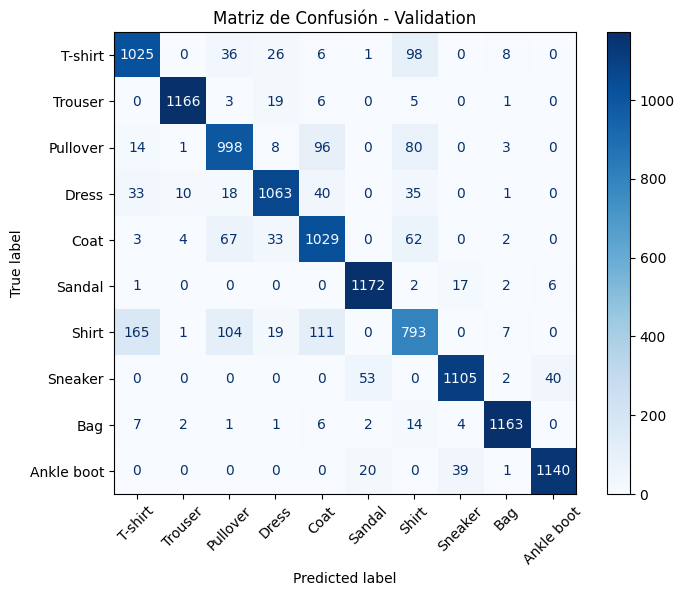

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8290    0.8580    0.8432      1000
           1     0.9898    0.9720    0.9808      1000
           2     0.8064    0.8330    0.8195      1000
           3     0.8926    0.8890    0.8908      1000
           4     0.7845    0.8520    0.8169      1000
           5     0.9440    0.9770    0.9602      1000
           6     0.7250    0.6300    0.6742      1000
           7     0.9490    0.9300    0.9394      1000
           8     0.9738    0.9670    0.9704      1000
           9     0.9637    0.9550    0.9593      1000

    accuracy                         0.8863     10000
   macro avg     0.8858    0.8863    0.8855     10000
weighted avg     0.8858    0.8863    0.8855     10000



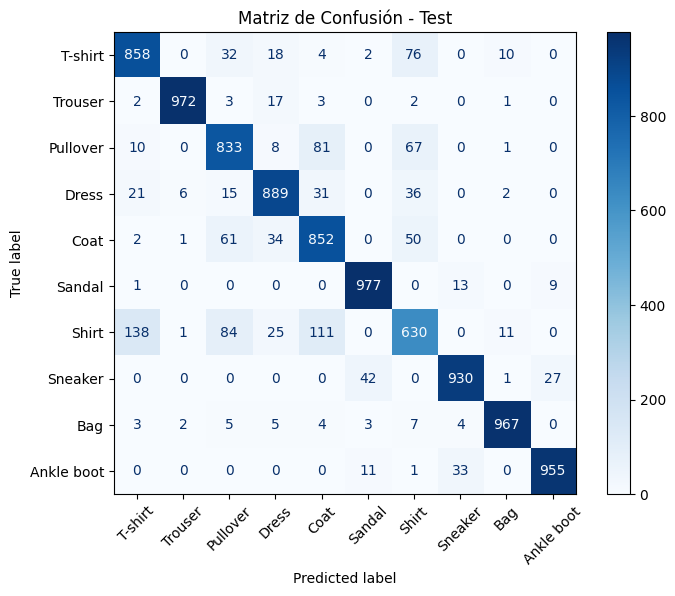

In [ ]:
#evaluamos el modelo en cada conjunto
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

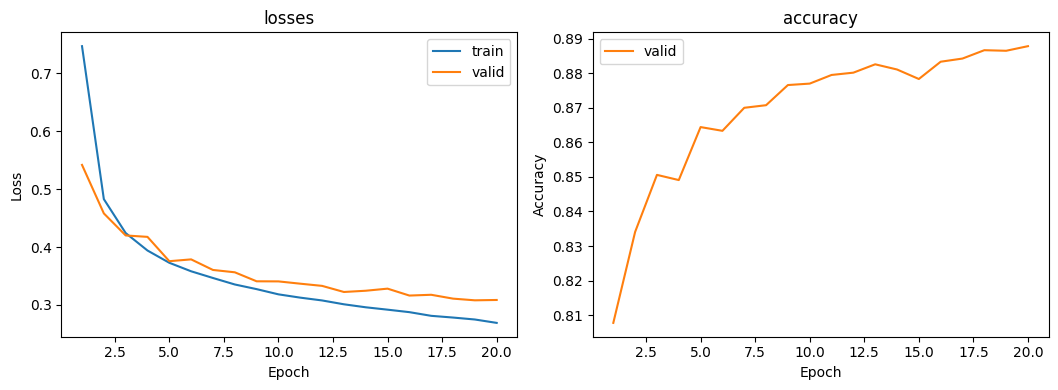

In [ ]:
#graficas de entrenamiento
plot_training_metrics(history1)

**Análisis de resultados:** empezamos con una loss en train de más de 1 y acabamos llegando a una loss de 0.27, lo cual es muy positivo porque aprendelo suficiente. Además, en train el acuraccy sube bastante, desde un 60% hasta un 90%. En validación no sube tanto porque empieza bastante bien con un 80%, pero llega hasta el 88%. Vemos una mejora progresiva y constante.

En las matrices de confusión de cada conjunto y en las métricas de cada clase podemos observar como al modelo le es más fácil clasificar algunas clases más que otras. Por ejemplo, la clase 1, es decir, los pantalones los predice a la perfeción porque posiblemente es lo más característico y lo que menos se parece a otra prenda. Sin embargo, hay otras clases que le cuesta más acertar como es el caso de la camisa, el abrigo o el jersey. De hecho, si nos fijamos en las matrices de confusión, la camisa la confunde mucho con la camiseta, el abrigo y el jersey. Por lo que es un fallo con sentido ya que se parecen mucho las clases entre sí.

Si nos centramos en las últimas gráficas, podemos observar como las pérdidas bajan considerablemente y las curvas (train y validación) no distan mucho, por lo que nuestro modelo no sobreaprende, lo cual es una buena característica. En cuanto al gráfico del acuraccy, sube hasta el 89%.

Resumiendo todas estas características, podríamos decir que el modelo C1 generaliza bastante bien y tiene buena capacidad de clasificar las clases que más se distinguen entre ellas mientras que las más parecidas las confude un poco.

Prueba con:
* RMSProp
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c1 = build_model_c1() #construimos la arquitectura

model_c1.compile( #compilamos el modelo
    optimizer=RMSprop(learning_rate=0.001, rho=0.9), #tasa de aprendizaje y tasa de dacimiento
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history2=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7597 - loss: 0.6629 - val_accuracy: 0.8590 - val_loss: 0.3838
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8708 - loss: 0.3528 - val_accuracy: 0.8771 - val_loss: 0.3383
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8894 - loss: 0.2994 - val_accuracy: 0.8661 - val_loss: 0.3597
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8985 - loss: 0.2751 - val_accuracy: 0.8866 - val_loss: 0.3164
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9065 - loss: 0.2603 - val_accuracy: 0.8800 - val_loss: 0.3213
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9139 - loss: 0.2372 - val_accuracy: 0.8894 - val_loss: 0.3083
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9183 - loss: 0.2238 - val_accuracy: 0.8913 - val_loss: 0.3162
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9203 - loss: 0.2137 - val_accuracy: 0.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9242    0.9377    0.9309      4800
           1     0.9971    0.9960    0.9966      4800
           2     0.8730    0.9627    0.9157      4800
           3     0.9846    0.9337    0.9585      4800
           4     0.9046    0.9369    0.9205      4800
           5     0.9992    0.9925    0.9958      4800
           6     0.9093    0.8167    0.8605      4800
           7     0.9888    0.9746    0.9816      4800
           8     0.9963    0.9969    0.9966      4800
           9     0.9733    0.9948    0.9839      4800

    accuracy                         0.9543     48000
   macro avg     0.9550    0.9542    0.9541     48000
weighted avg     0.9550    0.9543    0.9541     48000



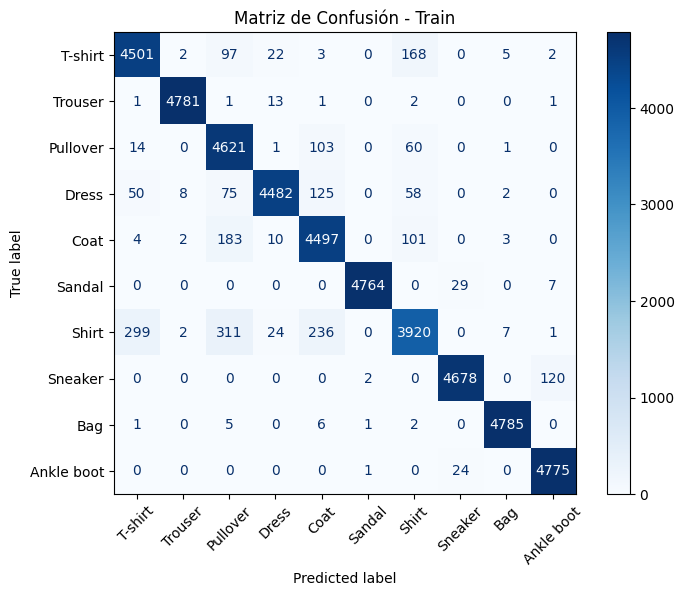

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8227    0.8392    0.8309      1200
           1     0.9734    0.9767    0.9750      1200
           2     0.7669    0.8775    0.8185      1200
           3     0.9369    0.8542    0.8936      1200
           4     0.8086    0.8483    0.8280      1200
           5     0.9633    0.9625    0.9629      1200
           6     0.7407    0.6475    0.6910      1200
           7     0.9519    0.9400    0.9459      1200
           8     0.9750    0.9742    0.9746      1200
           9     0.9506    0.9617    0.9561      1200

    accuracy                         0.8882     12000
   macro avg     0.8890    0.8882    0.8876     12000
weighted avg     0.8890    0.8882    0.8876     12000



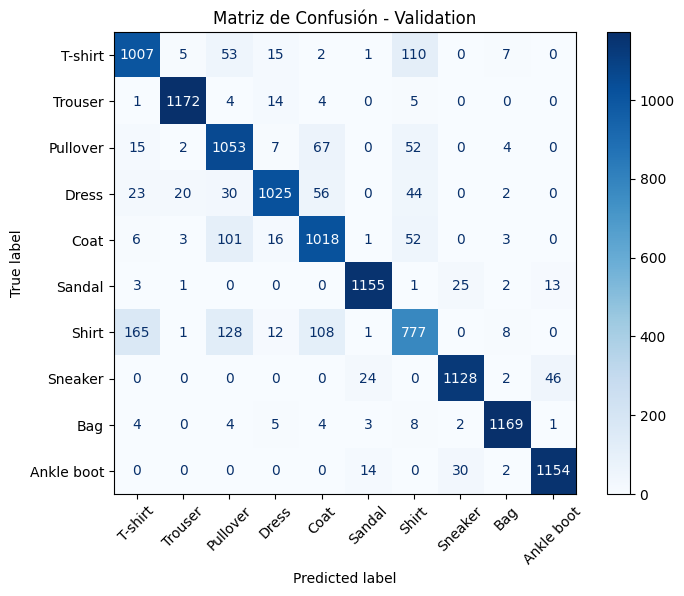

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8206    0.8280    0.8243      1000
           1     0.9838    0.9740    0.9789      1000
           2     0.7487    0.8820    0.8099      1000
           3     0.9246    0.8340    0.8770      1000
           4     0.8064    0.8370    0.8214      1000
           5     0.9774    0.9510    0.9640      1000
           6     0.7100    0.6170    0.6602      1000
           7     0.9405    0.9330    0.9367      1000
           8     0.9604    0.9690    0.9647      1000
           9     0.9385    0.9760    0.9569      1000

    accuracy                         0.8801     10000
   macro avg     0.8811    0.8801    0.8794     10000
weighted avg     0.8811    0.8801    0.8794     10000



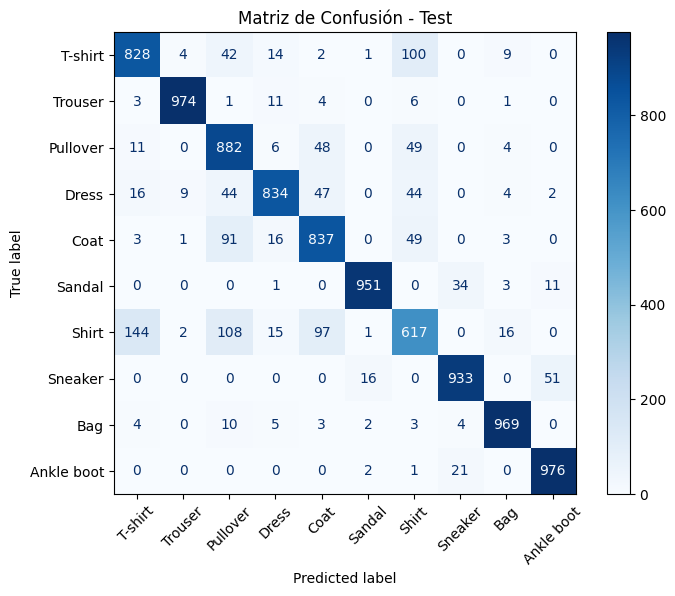

In [ ]:
#evaluamos los tres conjuntos
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

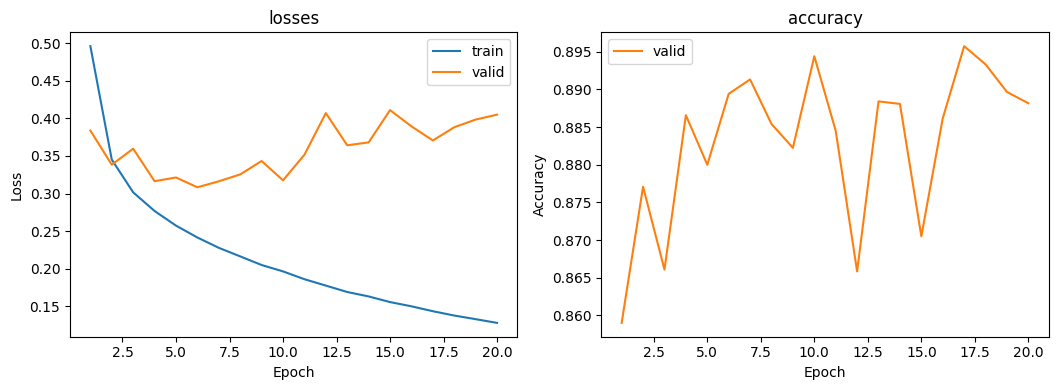

In [ ]:
#visualizamos la graficas de entrenamiento
plot_training_metrics(history2)

**Análisis de resultados:** En este modelo, donde hemos cambiado el optimizados, volvemos a ver el buen aprendizaje ya que la loss baja bastante pero no tanto en el conjunto de validación como el anterior. De hecho, en el conjunto de entrenamiento tiene menor loss y más acuraccy que el anterior, por lo que puede ser signo de un poco de sobreaprendizaje. Podemos observar como el acuraccy oscila un poco en validación.

Si nos centramos en las métricas de entrenamiento, son casi todo perfectas, pero en cuanto pasamos a validación y a test empeoran mucho. De hecho, si miramos las últimas gráficas, vemos como la loss de train baja perfectamente pero la loss en validación sube en vez de bajar. Además están bastante distantes las dos curvas. Esto es un claro ejemplo de sobreaprendizaje.

Fijandonos en la matriz de confusión en test, le pasa lo mismo que la ejecucción anterior. Muchas clases se confunde y no sabe clasificarlas bien porque tiene un 66% de acuraccy mientras que hay otras que son más características que sí.

En general, el cambio de optimizador no ha sido bueno ya que ha sobreaprendido.

Prueba con:
* Adam
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c1 = build_model_c1() #construimos la arquitectura

model_c1.compile( #compilamos el modelo
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history3=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7647 - loss: 0.6664 - val_accuracy: 0.8610 - val_loss: 0.3816
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8696 - loss: 0.3512 - val_accuracy: 0.8707 - val_loss: 0.3484
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8877 - loss: 0.3071 - val_accuracy: 0.8764 - val_loss: 0.3313
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8908 - loss: 0.2882 - val_accuracy: 0.8832 - val_loss: 0.3132
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9025 - loss: 0.2641 - val_accuracy: 0.8867 - val_loss: 0.3098
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9103 - loss: 0.2375 - val_accuracy: 0.8846 - val_loss: 0.3172
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9137 - loss: 0.2259 - val_accuracy: 0.8842 - val_loss: 0.3324
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9205 - loss: 0.2081 - val_accuracy: 0.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9523    0.9473    0.9498      4800
           1     1.0000    0.9952    0.9976      4800
           2     0.9544    0.9196    0.9367      4800
           3     0.9796    0.9717    0.9756      4800
           4     0.9085    0.9435    0.9257      4800
           5     0.9987    0.9929    0.9958      4800
           6     0.8902    0.9050    0.8975      4800
           7     0.9903    0.9765    0.9833      4800
           8     0.9990    0.9977    0.9983      4800
           9     0.9771    0.9971    0.9870      4800

    accuracy                         0.9646     48000
   macro avg     0.9650    0.9646    0.9647     48000
weighted avg     0.9650    0.9646    0.9647     48000



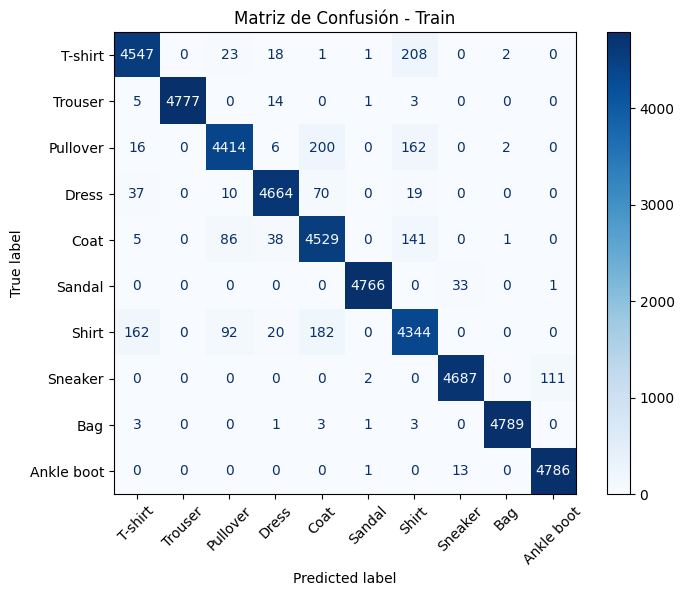

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8408    0.8317    0.8362      1200
           1     0.9865    0.9750    0.9807      1200
           2     0.8267    0.8267    0.8267      1200
           3     0.9165    0.8958    0.9060      1200
           4     0.8268    0.8475    0.8370      1200
           5     0.9699    0.9675    0.9687      1200
           6     0.7066    0.7267    0.7165      1200
           7     0.9459    0.9467    0.9463      1200
           8     0.9797    0.9658    0.9727      1200
           9     0.9562    0.9633    0.9597      1200

    accuracy                         0.8947     12000
   macro avg     0.8956    0.8947    0.8951     12000
weighted avg     0.8956    0.8947    0.8951     12000



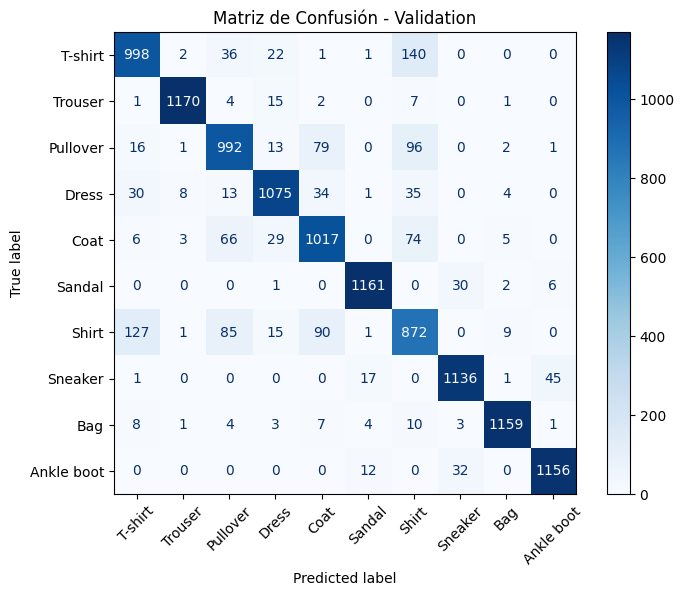

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8239    0.8140    0.8189      1000
           1     0.9959    0.9680    0.9817      1000
           2     0.8172    0.8090    0.8131      1000
           3     0.8996    0.8780    0.8887      1000
           4     0.8042    0.8500    0.8264      1000
           5     0.9709    0.9660    0.9684      1000
           6     0.6687    0.6740    0.6713      1000
           7     0.9493    0.9370    0.9431      1000
           8     0.9669    0.9650    0.9660      1000
           9     0.9446    0.9720    0.9581      1000

    accuracy                         0.8833     10000
   macro avg     0.8841    0.8833    0.8836     10000
weighted avg     0.8841    0.8833    0.8836     10000



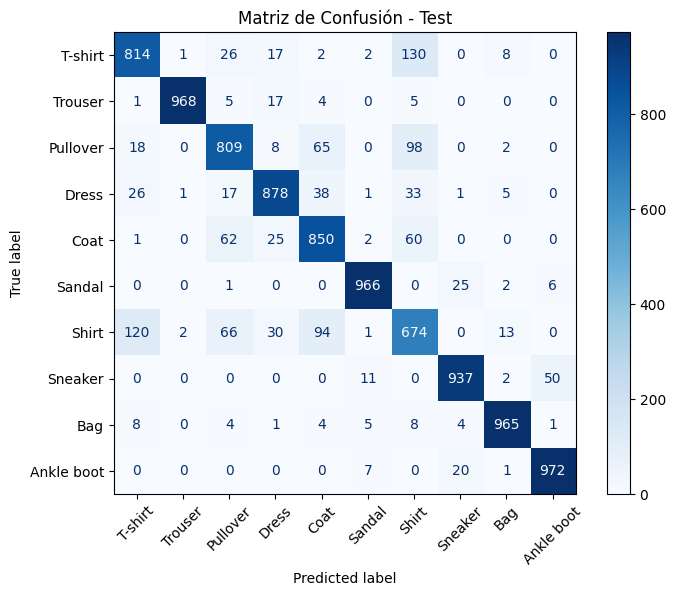

In [ ]:
#evaluamos los tres conjuntos
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

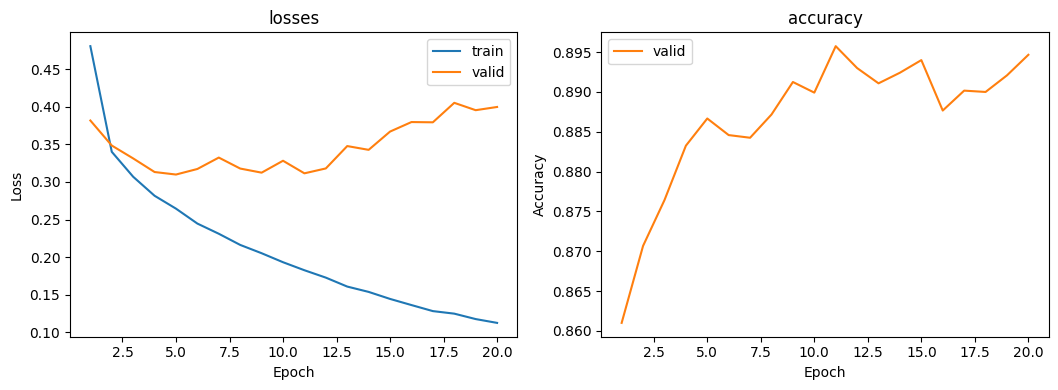

In [ ]:
#visualizamos durante el entrenamiento
plot_training_metrics(history3)

**Análisis de resultados:** para este modelo hemos utilizado el optimizador más común, Adam. Vemos como en entrenamiento el acuraccy sube hasya un 96.12%, en validación se queda en un 89.57% y en test en un 88.33%. Es verdad que el modelo aprende rápido y mejora hasta la época 11, pero después sobreentrena un poco. Aun así, el rendimiento está bastante bien. La loss de train baja considerablemente, pero la loss en validación empieza a subir pronto, por lo que estamos ante overfitting. Esto también lo corrobora la última gráfica, donde vemos que la curva de validación y en train con la pérdida con respecto a las épocas son bastante distantes.

En general, las métricas son muy parecidas a la primera ejecucción de RMSProp, pero con Adam vemos que hay sobreajuste.

Seguimos teniendo algunas clases que tiene dificultad de clasificar, como las camisas.

Prueba con:
* Adam
* Lr=0.001
* Cross Entropy Loss
* Bs=1000
* 20 épocas

In [ ]:
model_c1 = build_model_c1() #contruimos el modelo

model_c1.compile( #compilamos el modelo
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history4=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=1000, #bs 1000
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.5198 - loss: 1.3990 - val_accuracy: 0.6817 - val_loss: 1.7241
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7967 - loss: 0.5500 - val_accuracy: 0.7749 - val_loss: 1.5281
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8282 - loss: 0.4659 - val_accuracy: 0.7979 - val_loss: 1.3336
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8478 - loss: 0.4188 - val_accuracy: 0.7987 - val_loss: 1.1467
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.3847 - val_accuracy: 0.8386 - val_loss: 0.9451
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8680 - loss: 0.3657 - val_accuracy: 0.8509 - val_loss: 0.7441
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8761 - loss: 0.3393 - val_accuracy: 0.8243 - val_loss: 0.6122
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8836 - loss: 0.3167 - val_accuracy: 0.8483 - val_loss

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9040    0.8456    0.8738      4800
           1     0.9949    0.9812    0.9880      4800
           2     0.8819    0.8431    0.8621      4800
           3     0.8749    0.9598    0.9154      4800
           4     0.8475    0.8569    0.8522      4800
           5     0.9872    0.9802    0.9837      4800
           6     0.7633    0.7746    0.7689      4800
           7     0.9482    0.9794    0.9635      4800
           8     0.9850    0.9838    0.9844      4800
           9     0.9838    0.9590    0.9712      4800

    accuracy                         0.9164     48000
   macro avg     0.9171    0.9164    0.9163     48000
weighted avg     0.9171    0.9164    0.9163     48000



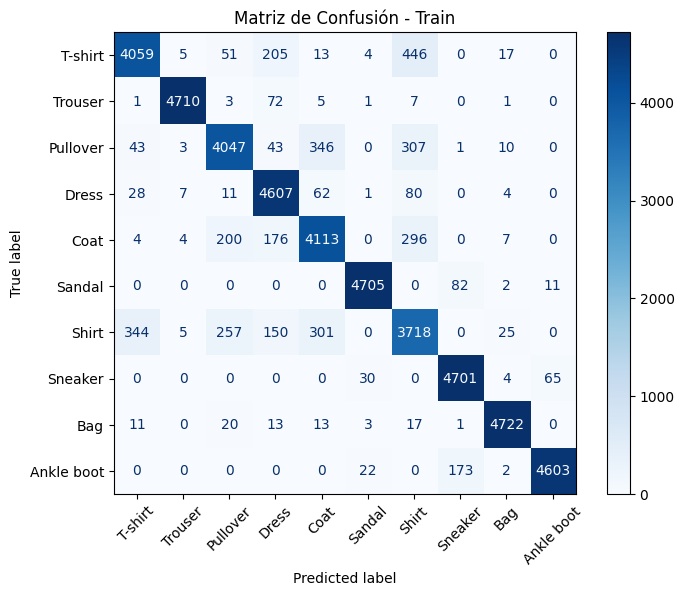

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8587    0.7950    0.8256      1200
           1     0.9898    0.9700    0.9798      1200
           2     0.8365    0.8183    0.8273      1200
           3     0.8487    0.9350    0.8898      1200
           4     0.8213    0.8233    0.8223      1200
           5     0.9587    0.9683    0.9635      1200
           6     0.7006    0.7117    0.7061      1200
           7     0.9283    0.9608    0.9443      1200
           8     0.9764    0.9667    0.9715      1200
           9     0.9801    0.9417    0.9605      1200

    accuracy                         0.8891     12000
   macro avg     0.8899    0.8891    0.8891     12000
weighted avg     0.8899    0.8891    0.8891     12000



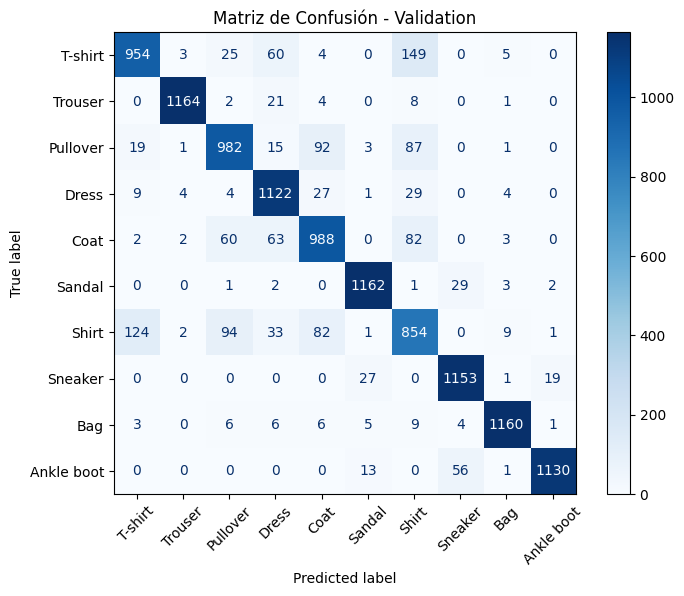

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8546    0.8050    0.8290      1000
           1     0.9888    0.9670    0.9778      1000
           2     0.8435    0.7920    0.8169      1000
           3     0.8503    0.9200    0.8838      1000
           4     0.7798    0.8180    0.7984      1000
           5     0.9709    0.9660    0.9684      1000
           6     0.6757    0.6730    0.6743      1000
           7     0.9210    0.9670    0.9434      1000
           8     0.9633    0.9700    0.9666      1000
           9     0.9792    0.9420    0.9602      1000

    accuracy                         0.8820     10000
   macro avg     0.8827    0.8820    0.8819     10000
weighted avg     0.8827    0.8820    0.8819     10000



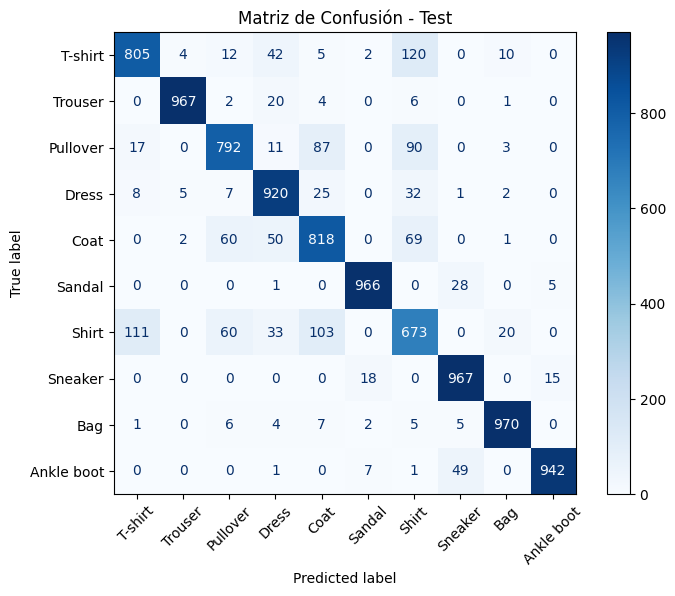

In [ ]:
#evaluamos los tres conjuntos
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

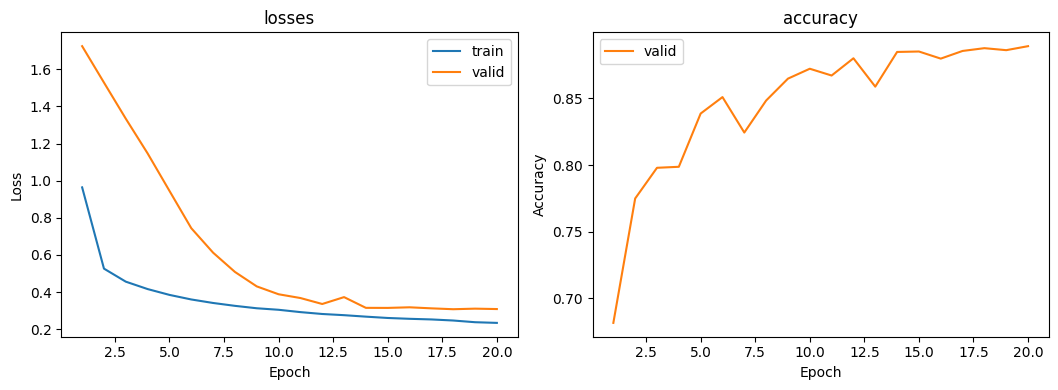

In [ ]:
#visualizamos el entrenamiento
plot_training_metrics(history4)

**Análisis de resultados:** en este modelo hemos cambiado con respecto al anterior el tamaño del bs, donde lo hemos aumentado a 1000. Vemos como la loss no baja tan drásticamente, si no que que al principio, si nos fijamos en validación parece hasta una función lineal.

Este aumento de bs ha hecho que se reduzca considerablemente el sobreaprendizaje porque las curvas se separan poco en la gráfica de la pérdida. Aun así, el rendimiento es bastante similar que con bs 64. De hecho, en acuraccy en test es prácticamente igual.

En resumen, el aumento del bs hace que la pérdida baje más progresivamente y con menos fluctuaciones. Es decir, el aprendizaje es más lento al principio pero después llega hasta los mismos resultados.

Prueba con:
* Adam
* Lr=0.0001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c1 = build_model_c1() #construimos la arquitectura

model_c1.compile( #compilamos el modelo
    optimizer=Adam(learning_rate=0.0001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history5=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5744 - loss: 1.2922 - val_accuracy: 0.7987 - val_loss: 0.5674
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8106 - loss: 0.5313 - val_accuracy: 0.8367 - val_loss: 0.4627
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8383 - loss: 0.4511 - val_accuracy: 0.8486 - val_loss: 0.4286
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8521 - loss: 0.4101 - val_accuracy: 0.8592 - val_loss: 0.3994
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8600 - loss: 0.3849 - val_accuracy: 0.8643 - val_loss: 0.3808
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8702 - loss: 0.3640 - val_accuracy: 0.8662 - val_loss: 0.3733
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8736 - loss: 0.3468 - val_accuracy: 0.8721 - val_loss: 0.3602
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8797 - loss: 0.3388 - val_accuracy: 0.

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.8749    0.8742    0.8745      4800
           1     0.9868    0.9812    0.9840      4800
           2     0.8433    0.8521    0.8477      4800
           3     0.8933    0.9371    0.9147      4800
           4     0.8681    0.8023    0.8339      4800
           5     0.9818    0.9756    0.9787      4800
           6     0.7337    0.7529    0.7432      4800
           7     0.9581    0.9581    0.9581      4800
           8     0.9793    0.9760    0.9777      4800
           9     0.9654    0.9715    0.9684      4800

    accuracy                         0.9081     48000
   macro avg     0.9085    0.9081    0.9081     48000
weighted avg     0.9085    0.9081    0.9081     48000



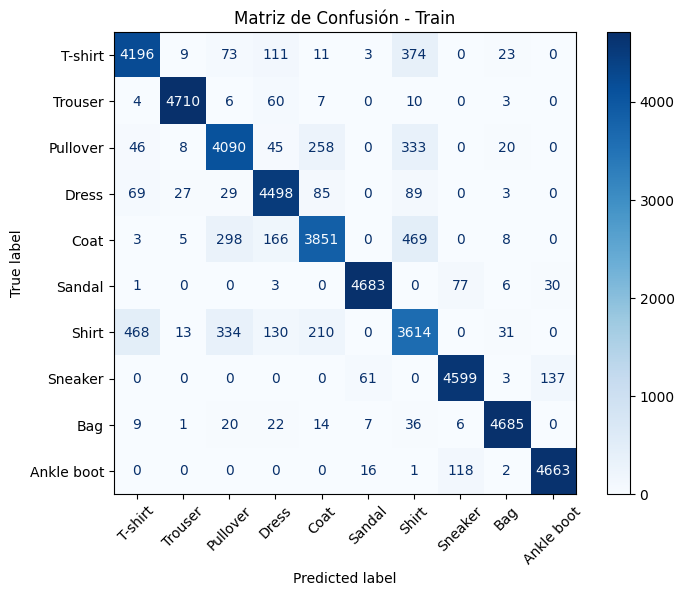

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8392    0.8350    0.8371      1200
           1     0.9857    0.9742    0.9799      1200
           2     0.8199    0.8383    0.8290      1200
           3     0.8775    0.9250    0.9006      1200
           4     0.8587    0.7800    0.8175      1200
           5     0.9658    0.9650    0.9654      1200
           6     0.6956    0.7217    0.7084      1200
           7     0.9457    0.9442    0.9450      1200
           8     0.9709    0.9725    0.9717      1200
           9     0.9606    0.9558    0.9582      1200

    accuracy                         0.8912     12000
   macro avg     0.8920    0.8912    0.8913     12000
weighted avg     0.8920    0.8912    0.8913     12000



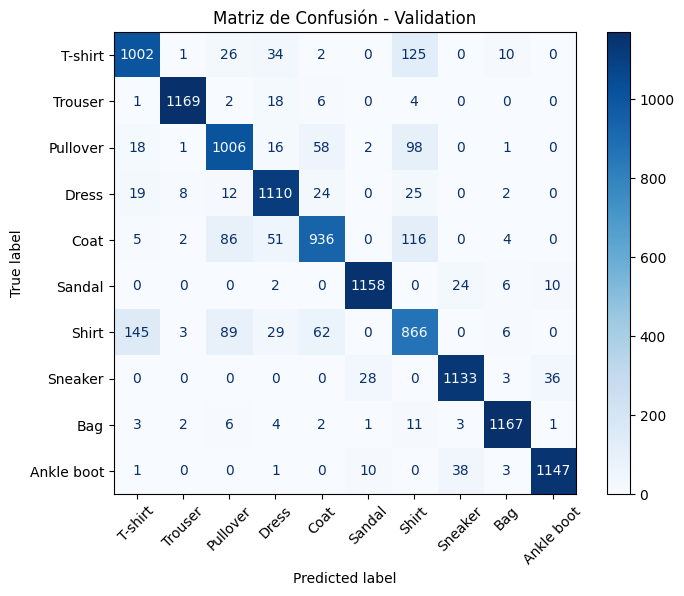

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8277    0.8310    0.8293      1000
           1     0.9839    0.9750    0.9794      1000
           2     0.7852    0.8260    0.8051      1000
           3     0.8769    0.9120    0.8941      1000
           4     0.8271    0.7460    0.7844      1000
           5     0.9679    0.9640    0.9659      1000
           6     0.6550    0.6550    0.6550      1000
           7     0.9382    0.9410    0.9396      1000
           8     0.9633    0.9710    0.9671      1000
           9     0.9552    0.9590    0.9571      1000

    accuracy                         0.8780     10000
   macro avg     0.8780    0.8780    0.8777     10000
weighted avg     0.8780    0.8780    0.8777     10000



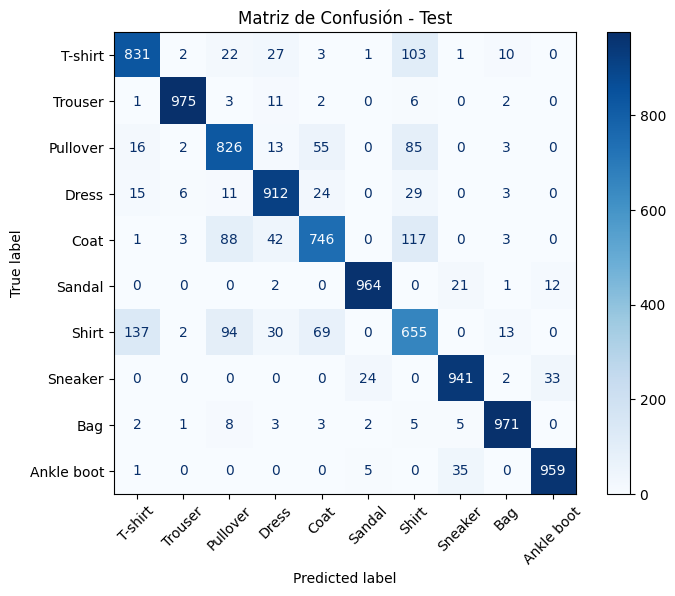

In [ ]:
#evaluamos el modelo en los tres conjuntos
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

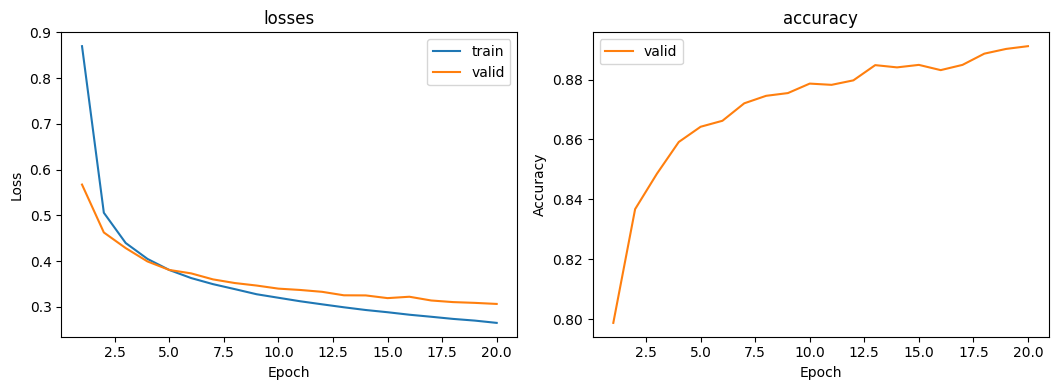

In [ ]:
#visualizamos el entrenamiento
plot_training_metrics(history5)

**Análisis de resultados:** hemos puesto un lr más bajo, por lo demás sigue todo igual. Esto hace que aprenda más lento y progresivo, pero que le cueste más tiempo llegar a un buen resultado.

Vemos como las curvas de pérdida son bastante estables y bajan progresivamente. Además, no hay sobreaprendizaje porque están muy juntas. Las diferencias entre las métricas de los diferentes conjuntos son mínimas, por lo que el modelo generaliza bien. El rendimiento sigue siendo bastante bueno, parecido a las demás ejecucciones.

Prueba con:
* Adam
* Lr: vamos a usar un scheduler que vaya reduciendo la tasa de aprendizaje cuando una métrica haya dejado de mejorar. Nosotros nos vamos a fijar en la loss de validación. Lee la métrica y si no se observa ninguna mejora en un número "patience" de épocas, reduce la tasa de aprendizaje.  Esto puede ser beneficioso ya que se adapta al entrenamiento y no hay que fijar de antes un lr manualmente.
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', #metrica que observa el scheduler
    factor=0.5, #reduce a la mitad el lr cuando se aplica
    patience=3, # espera 3 epocas sin mejora
    min_lr=1e-6, # limite inferior, no puede bajar mas de ese lr
    verbose=1 #mensajes cuando se activa solo
)

In [ ]:
model_c1 = build_model_c1() #construimos el modelo

model_c1.compile( #compilamos el modelo
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history6=model_c1.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
    callbacks=[reduce_lr] #scheduler
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7548 - loss: 0.6842 - val_accuracy: 0.8571 - val_loss: 0.3966 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8709 - loss: 0.3488 - val_accuracy: 0.8758 - val_loss: 0.3317 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8865 - loss: 0.3050 - val_accuracy: 0.8802 - val_loss: 0.3212 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9007 - loss: 0.2696 - val_accuracy: 0.8919 - val_loss: 0.3023 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9054 - loss: 0.2528 - val_accuracy: 0.8973 - val_loss: 0.2868 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9109 - loss: 0.2366 - val_accuracy: 0.8957 - val_loss: 0.2896 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9177 - loss: 0.2163 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9413    0.9581    0.9496      4800
           1     0.9998    0.9988    0.9993      4800
           2     0.9338    0.9465    0.9401      4800
           3     0.9700    0.9777    0.9739      4800
           4     0.9353    0.9371    0.9362      4800
           5     1.0000    0.9994    0.9997      4800
           6     0.9102    0.8738    0.8916      4800
           7     0.9927    0.9929    0.9928      4800
           8     0.9992    0.9990    0.9991      4800
           9     0.9927    0.9931    0.9929      4800

    accuracy                         0.9676     48000
   macro avg     0.9675    0.9676    0.9675     48000
weighted avg     0.9675    0.9676    0.9675     48000



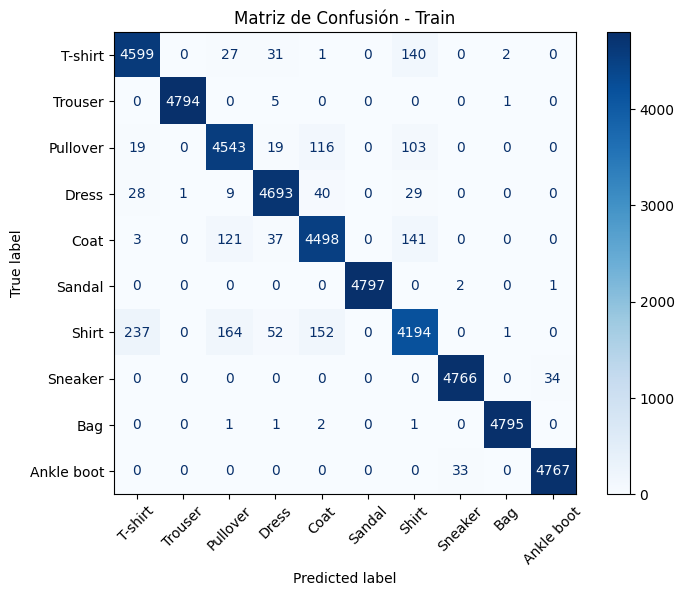

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8532    0.8525    0.8529      1200
           1     0.9850    0.9825    0.9837      1200
           2     0.8321    0.8675    0.8494      1200
           3     0.9144    0.9075    0.9109      1200
           4     0.8592    0.8542    0.8567      1200
           5     0.9708    0.9700    0.9704      1200
           6     0.7491    0.7267    0.7377      1200
           7     0.9466    0.9458    0.9462      1200
           8     0.9702    0.9758    0.9730      1200
           9     0.9558    0.9558    0.9558      1200

    accuracy                         0.9038     12000
   macro avg     0.9036    0.9038    0.9037     12000
weighted avg     0.9036    0.9038    0.9037     12000



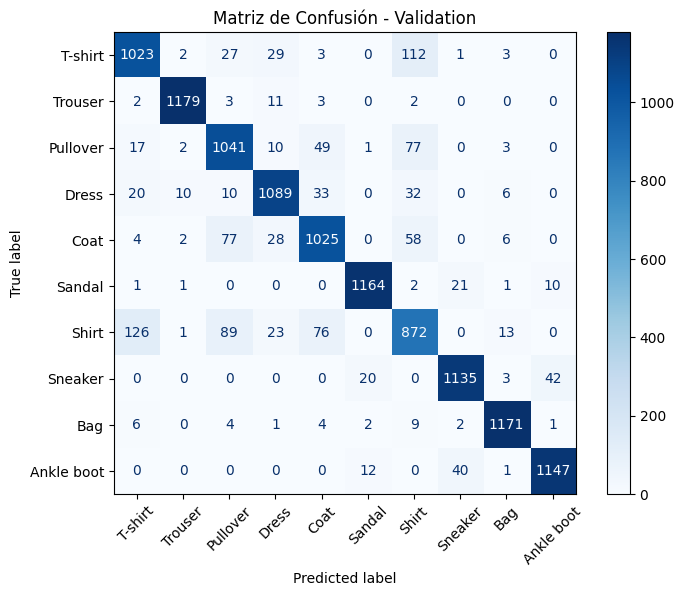

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8250    0.8530    0.8387      1000
           1     0.9939    0.9730    0.9833      1000
           2     0.8196    0.8540    0.8364      1000
           3     0.9058    0.8940    0.8998      1000
           4     0.8291    0.8200    0.8245      1000
           5     0.9748    0.9690    0.9719      1000
           6     0.6956    0.6650    0.6800      1000
           7     0.9413    0.9630    0.9521      1000
           8     0.9681    0.9720    0.9701      1000
           9     0.9667    0.9590    0.9629      1000

    accuracy                         0.8922     10000
   macro avg     0.8920    0.8922    0.8920     10000
weighted avg     0.8920    0.8922    0.8920     10000



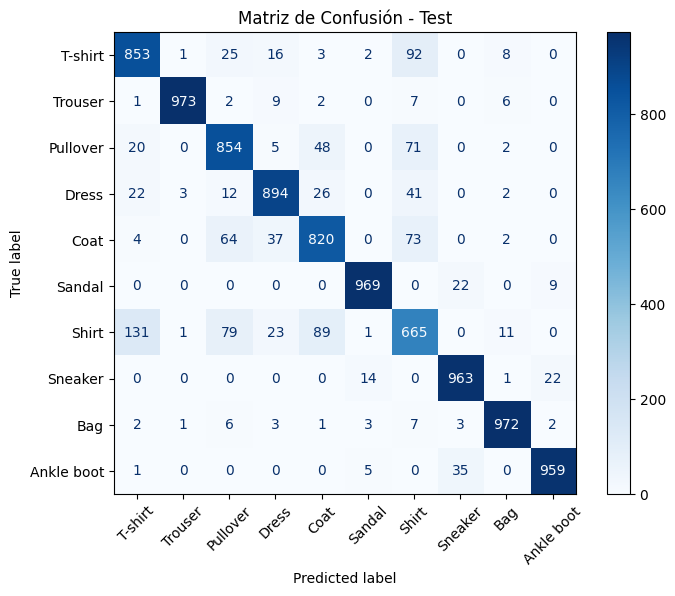

In [ ]:
#evaluamos el modelo en los tres modelos
evaluate_model(model_c1, X_train, y_train, dataset_name="Train")
evaluate_model(model_c1, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c1, test_images, test_labels, dataset_name="Test")

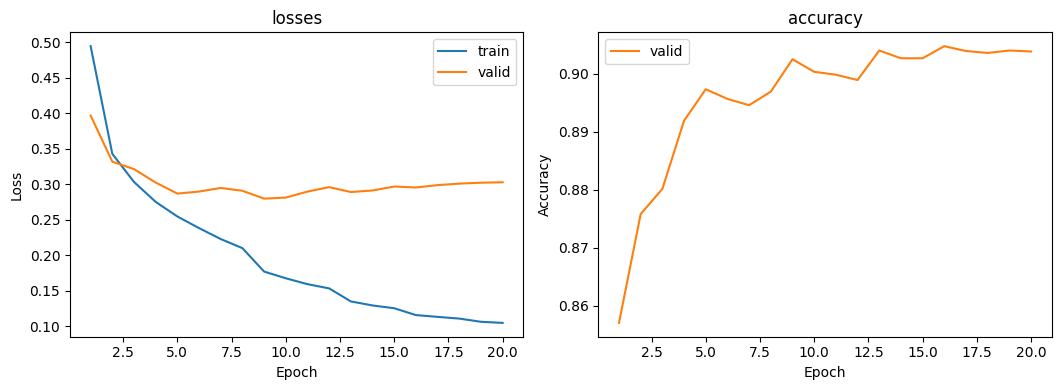

In [ ]:
#visualizamos como ha ido yendo el entrenamiento
plot_training_metrics(history6)

**Análisis de resultados:** hemos introducido un scheduler dinámico para ir cambiando el lr. Cada 3 épocas, si no mejora, baja el lr. Así podemos afinar más el entreamiento.

Viendo las métricas y las gráficas, cae en un sobreaprendizaje, aunque es verdad que después en test las métricas son bastante buenas y mejora la anteriores.  

En resumen, ha mejorado el acuraccy de las demás ejecuciones que se ha quedado en un 89.22% en test, pero ha habido sobreaprendizaje. Es un buen equilibrio, aunque si preferimos no tener overfitting, es mejor con otros hiperparámetros.

| Experimento           | Train Acc | Val Acc | Test Acc | Sobreajuste |
|-----------------------|-----------|---------|----------|--------------|
| SGD (0.001)           | 90.18%    | 88.78%  | 88.63%   | Bajo         |
| RMSProp (0.001)       | 95.62%    | 89.57%  | 88.01%   | Medio        |
| Adam (0.001)          | 96.12%    | 89.57%  | 88.33%   | Medio        |
| Adam (0.0001)         | 90.68%    | 89.12%  | 87.80%   | Bajo         |
| Adam (bs = 1000)      | 91.64%    | 88.91%  | 88.20%   | Bajo         |
| **Adam + Scheduler**  | **96.76%**| **90.38%** | **89.22%** | **Bajo**   |


### C2

Vamos a hacer las mismas pruebas que con C1 y así podremos comparar.

Prueba con:
* SGD
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c2=build_model_c2()
model_c2.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9), #tasa de aprendizaje y momemtum
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history7=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7325 - loss: 0.7577 - val_accuracy: 0.8790 - val_loss: 0.3365
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8730 - loss: 0.3524 - val_accuracy: 0.9014 - val_loss: 0.2748
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8977 - loss: 0.2827 - val_accuracy: 0.9060 - val_loss: 0.2666
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9094 - loss: 0.2483 - val_accuracy: 0.9136 - val_loss: 0.2388
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9200 - loss: 0.2183 - val_accuracy: 0.9168 - val_loss: 0.2321
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9304 - loss: 0.1937 - val_accuracy: 0.9118 - val_loss: 0.2435
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9359 - loss: 0.1753 - val_accuracy: 0.9216 - val_loss: 0.2263
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9411 - loss: 0.1618 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9902    0.9898    0.9900      4800
           1     1.0000    0.9998    0.9999      4800
           2     0.9547    0.9969    0.9753      4800
           3     0.9942    0.9992    0.9967      4800
           4     0.9924    0.9731    0.9826      4800
           5     0.9981    1.0000    0.9991      4800
           6     0.9918    0.9629    0.9772      4800
           7     0.9958    0.9992    0.9975      4800
           8     1.0000    1.0000    1.0000      4800
           9     0.9996    0.9944    0.9970      4800

    accuracy                         0.9915     48000
   macro avg     0.9917    0.9915    0.9915     48000
weighted avg     0.9917    0.9915    0.9915     48000



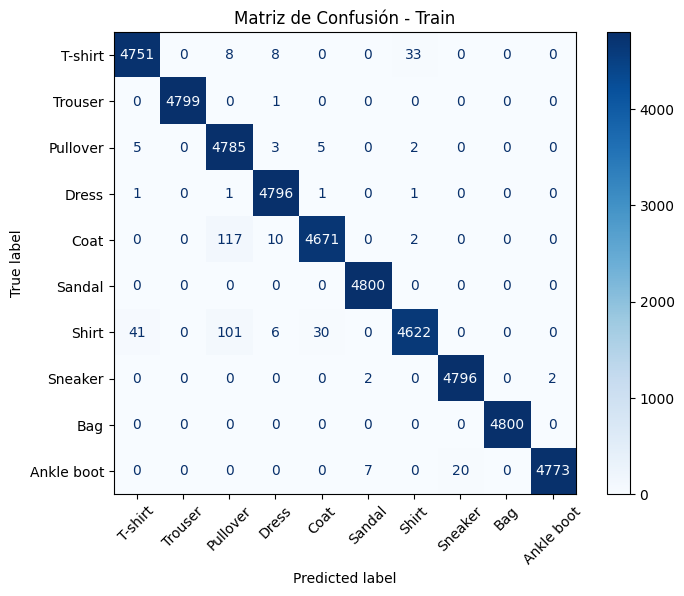

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8910    0.8858    0.8884      1200
           1     0.9908    0.9875    0.9891      1200
           2     0.8248    0.9417    0.8794      1200
           3     0.9249    0.9442    0.9344      1200
           4     0.9085    0.8608    0.8840      1200
           5     0.9682    0.9908    0.9794      1200
           6     0.8489    0.7633    0.8039      1200
           7     0.9598    0.9742    0.9669      1200
           8     0.9817    0.9842    0.9829      1200
           9     0.9887    0.9483    0.9681      1200

    accuracy                         0.9281     12000
   macro avg     0.9287    0.9281    0.9277     12000
weighted avg     0.9287    0.9281    0.9277     12000



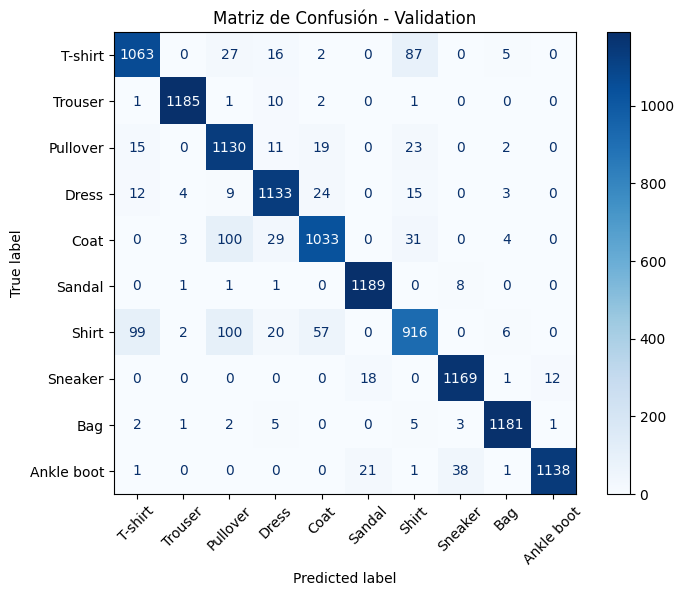

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8841    0.8770    0.8805      1000
           1     0.9949    0.9840    0.9894      1000
           2     0.8279    0.9330    0.8773      1000
           3     0.9157    0.9340    0.9248      1000
           4     0.8682    0.8560    0.8620      1000
           5     0.9736    0.9960    0.9847      1000
           6     0.8240    0.7210    0.7691      1000
           7     0.9636    0.9790    0.9712      1000
           8     0.9802    0.9890    0.9846      1000
           9     0.9896    0.9530    0.9710      1000

    accuracy                         0.9222     10000
   macro avg     0.9222    0.9222    0.9215     10000
weighted avg     0.9222    0.9222    0.9215     10000



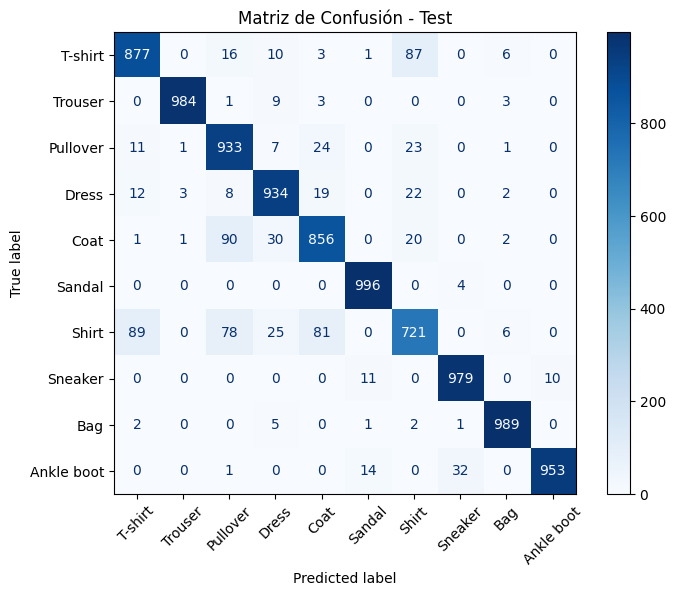

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

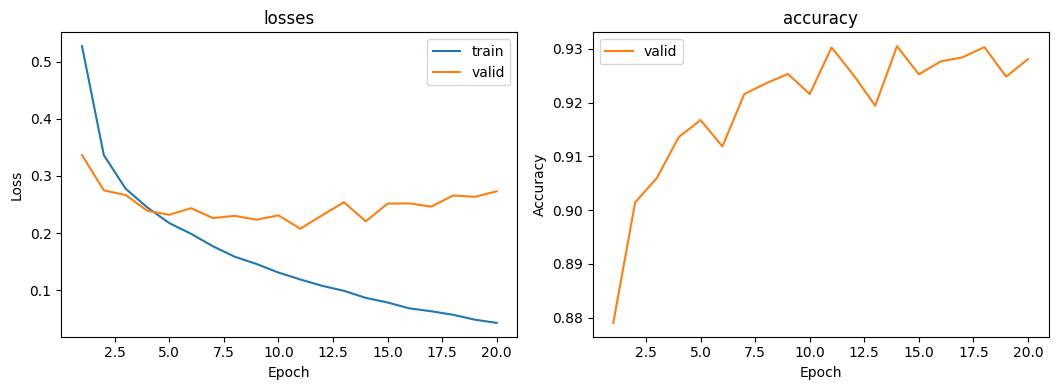

In [ ]:
plot_training_metrics(history7)

**Análisis de resultados:** empezamos con una loss en entrenamiento de 0.75 y conseguimos reducirla hasta 0.04, lo cual indica que el modelo aprende bastante bien. La accuracy en entrenamiento sube de forma clara y progresiva, comenzando en torno al 73% y alcanzando un 98.4% al final del proceso. En validación, hace algo parecido, partimos con una accuracy de casi un 88% y se mejorara hasta un 93%. Aunque la loss de validación no baja tanto como la de entrenamiento, sí se estabiliza alrededor de 0.27. En general, observamos una evolución progresiva, constante y equilibrada entre entrenamiento y validación.

Si analizamos las matrices de confusión y las métricas por clase, vemos como pasa lo mismo que con el otro modelo, que hay clases que la distingue mejor que otras porque visualmente son más diferentes.

Si nos fijamos en las curvas del entrenamiento, observamos una bajada clara y constante de la pérdida, tanto en entrenamiento como en validación, con una separación media entre ambas. Esto indica que el modelo aprende con un poco de sobreajustarse. En cuanto a la curva de accuracy, sube hasta alcanzar el 93% en validación.

Resumiendo, podemos decir que el modelo C2 con optimizador SGD aprende de forma eficaz y clasifica de muy bien las clases más diferenciables. Solo presenta dificultades con las categorías más similares, algo bastante esperable.

Prueba con:
* RMSProp
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c2 = build_model_c2()

model_c2.compile(
    optimizer=RMSprop(learning_rate=0.001, rho=0.9), #tasa de aprendizaje y tasa de dacimiento
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history8=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6903 - loss: 1.4726 - val_accuracy: 0.8746 - val_loss: 0.3668
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8764 - loss: 0.3490 - val_accuracy: 0.8853 - val_loss: 0.3321
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9033 - loss: 0.2718 - val_accuracy: 0.9047 - val_loss: 0.2821
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9190 - loss: 0.2321 - val_accuracy: 0.9121 - val_loss: 0.2436
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9281 - loss: 0.2012 - val_accuracy: 0.8969 - val_loss: 0.2947
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9382 - loss: 0.1739 - val_accuracy: 0.9206 - val_loss: 0.2386
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9453 - loss: 0.1532 - val_accuracy: 0.9245 - val_loss: 0.2244
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9540 - loss: 0.1341 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9927    0.9635    0.9779      4800
           1     0.9992    0.9992    0.9992      4800
           2     0.9892    0.9765    0.9828      4800
           3     0.9930    0.9977    0.9953      4800
           4     0.9941    0.9835    0.9888      4800
           5     0.9990    1.0000    0.9995      4800
           6     0.9433    0.9875    0.9649      4800
           7     0.9987    0.9979    0.9983      4800
           8     0.9985    0.9998    0.9992      4800
           9     0.9990    0.9988    0.9989      4800

    accuracy                         0.9904     48000
   macro avg     0.9907    0.9904    0.9905     48000
weighted avg     0.9907    0.9904    0.9905     48000



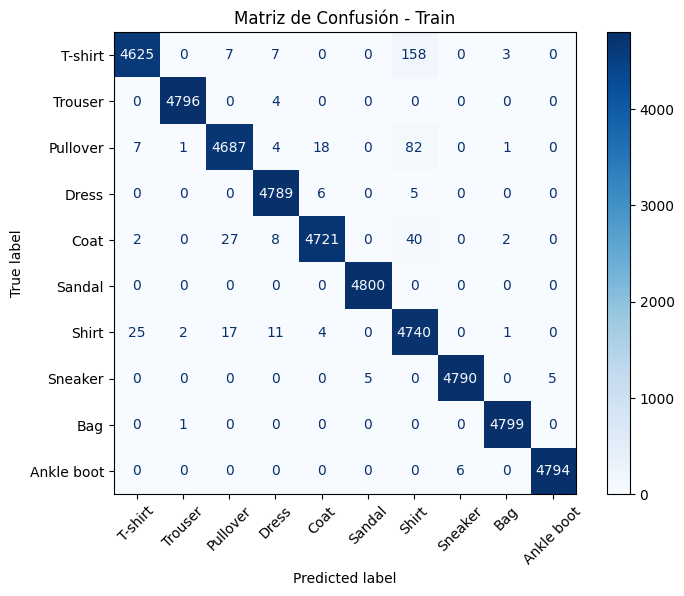

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8935    0.8317    0.8615      1200
           1     0.9916    0.9892    0.9904      1200
           2     0.9046    0.8775    0.8909      1200
           3     0.9254    0.9300    0.9277      1200
           4     0.9091    0.8750    0.8917      1200
           5     0.9786    0.9892    0.9838      1200
           6     0.7483    0.8425    0.7926      1200
           7     0.9681    0.9608    0.9645      1200
           8     0.9777    0.9875    0.9826      1200
           9     0.9715    0.9667    0.9691      1200

    accuracy                         0.9250     12000
   macro avg     0.9268    0.9250    0.9255     12000
weighted avg     0.9268    0.9250    0.9255     12000



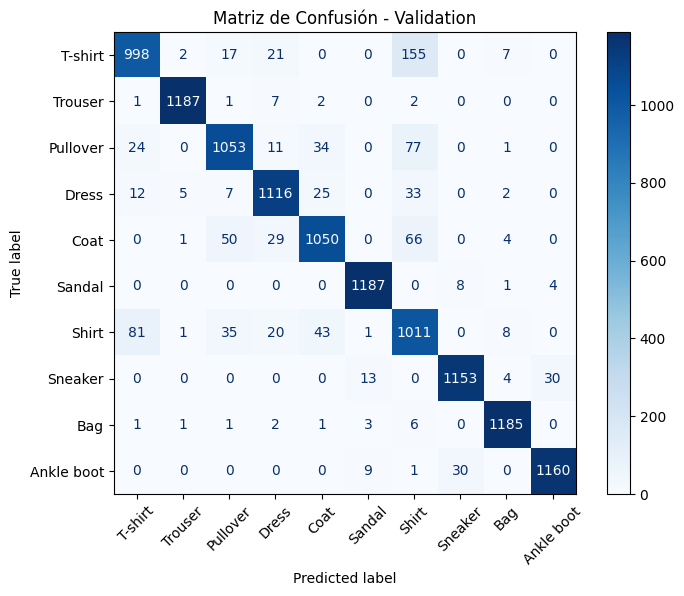

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8943    0.8460    0.8695      1000
           1     0.9939    0.9850    0.9895      1000
           2     0.9051    0.8680    0.8862      1000
           3     0.9185    0.9240    0.9212      1000
           4     0.9072    0.8700    0.8882      1000
           5     0.9812    0.9910    0.9861      1000
           6     0.7274    0.8190    0.7705      1000
           7     0.9691    0.9730    0.9711      1000
           8     0.9782    0.9860    0.9821      1000
           9     0.9778    0.9690    0.9734      1000

    accuracy                         0.9231     10000
   macro avg     0.9253    0.9231    0.9238     10000
weighted avg     0.9253    0.9231    0.9238     10000



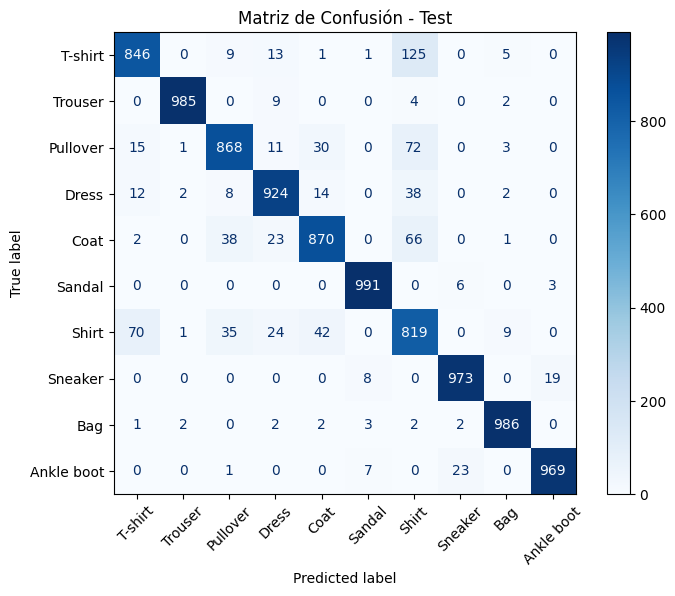

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

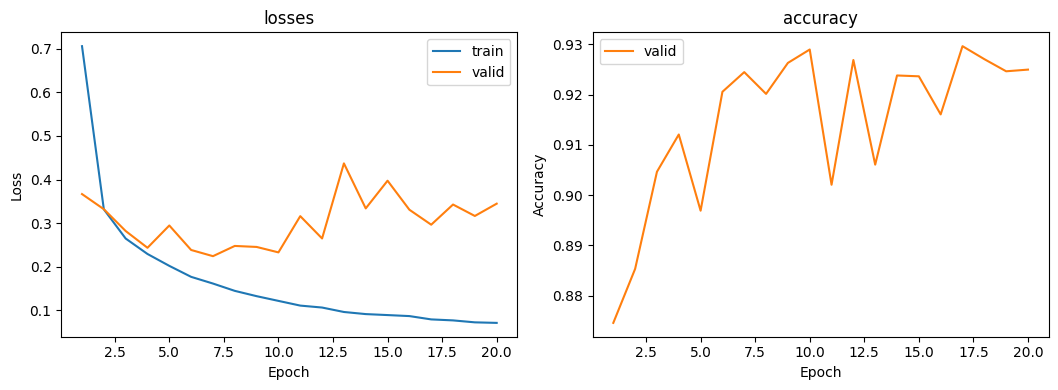

In [ ]:
plot_training_metrics(history8)

**Análisis de resultados**: empezamos con una loss en entrenamiento bastante alta, superior a 1.4. A lo largo de las épocas, la pérdida se reduce significativamente hasta llegar a una loss final de 0.06, lo cual indica que el modelo ha aprendido correctamente.

La accuracy en entrenamiento mejora progresivamente desde un 69% inicial hasta alcanzar un 97.8%, un crecimiento muy positivo. En validación, el comportamiento también es bueno, comenzando en torno al 87% y alcanzando finalmente un 92.5%. Aunque la loss de validación no baja de forma tan limpia como la de entrenamiento, se mantiene en valores razonablemente bajos durante la mayoría del entrenamiento. A partir de la época 10 hay cierta oscilación, lo que indica que el modelo empieza a sobreajustar ligeramente.

Sigue ocurriendo el mismo patrón de las clases problemáticas, aunque con más acuraccy que en c1.

Si nos fijamos en las curvas de entrenamiento, vemos una caída clara de la pérdida en entrenamiento, mientras que en validación la curva tiene más altibajos. Las curvas no se separan en exceso, aunque a partir de la segunda mitad del entrenamiento sí se aprecia que la loss de validación se mantiene estable o incluso sube ligeramente, lo cual es un indicio de sobreajuste. A pesar de esto, la curva de accuracy de validación sube de forma constante y alcanza valores en torno al 93%.

Resumiendo, el modelo C2 con optimizador RMSProp aprende muy bien y logra muy buenos resultados, incluso algo mejores que con SGD en algunas clases. Sin embargo, muestra más inestabilidad en validación, por lo que convendría usar técnicas de regularización o un scheduler que adapte la tasa de aprendizaje. Aun así, el rendimiento general es muy alto y la generalización es buena en la mayoría de las clases.

Prueba con:
* Adam
* Lr=0.001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c2 = build_model_c2()

model_c2.compile(
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history9=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7056 - loss: 1.0245 - val_accuracy: 0.8690 - val_loss: 0.3573
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8690 - loss: 0.3654 - val_accuracy: 0.8730 - val_loss: 0.3434
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8953 - loss: 0.2901 - val_accuracy: 0.9120 - val_loss: 0.2564
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9157 - loss: 0.2343 - val_accuracy: 0.9152 - val_loss: 0.2364
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9245 - loss: 0.2101 - val_accuracy: 0.9107 - val_loss: 0.2464
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9339 - loss: 0.1843 - val_accuracy: 0.9274 - val_loss: 0.2128
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9431 - loss: 0.1586 - val_accuracy: 0.9277 - val_loss: 0.2094
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9481 - loss: 0.1403 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9973    0.9869    0.9920      4800
           1     0.9998    1.0000    0.9999      4800
           2     0.9814    0.9912    0.9863      4800
           3     0.9952    0.9969    0.9960      4800
           4     0.9908    0.9862    0.9885      4800
           5     1.0000    0.9981    0.9991      4800
           6     0.9840    0.9875    0.9858      4800
           7     0.9919    0.9998    0.9958      4800
           8     0.9996    0.9992    0.9994      4800
           9     0.9996    0.9935    0.9966      4800

    accuracy                         0.9939     48000
   macro avg     0.9940    0.9939    0.9939     48000
weighted avg     0.9940    0.9939    0.9939     48000



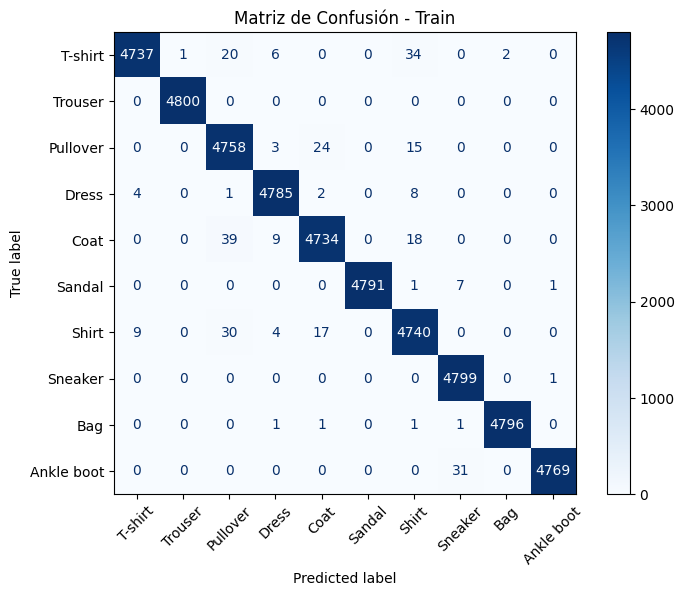

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8863    0.8508    0.8682      1200
           1     0.9950    0.9917    0.9933      1200
           2     0.8651    0.9033    0.8838      1200
           3     0.9366    0.9233    0.9299      1200
           4     0.8893    0.8767    0.8829      1200
           5     0.9898    0.9708    0.9802      1200
           6     0.7847    0.8050    0.7947      1200
           7     0.9422    0.9775    0.9595      1200
           8     0.9866    0.9817    0.9841      1200
           9     0.9713    0.9600    0.9656      1200

    accuracy                         0.9241     12000
   macro avg     0.9247    0.9241    0.9242     12000
weighted avg     0.9247    0.9241    0.9242     12000



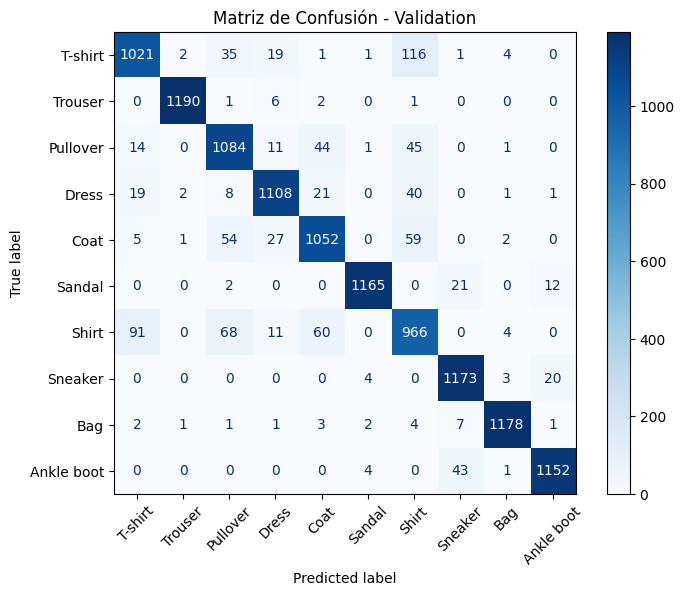

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8793    0.8520    0.8654      1000
           1     0.9939    0.9840    0.9889      1000
           2     0.8772    0.9070    0.8918      1000
           3     0.9311    0.9190    0.9250      1000
           4     0.8804    0.8910    0.8857      1000
           5     0.9939    0.9760    0.9849      1000
           6     0.7800    0.7800    0.7800      1000
           7     0.9471    0.9840    0.9652      1000
           8     0.9820    0.9830    0.9825      1000
           9     0.9787    0.9650    0.9718      1000

    accuracy                         0.9241     10000
   macro avg     0.9244    0.9241    0.9241     10000
weighted avg     0.9244    0.9241    0.9241     10000



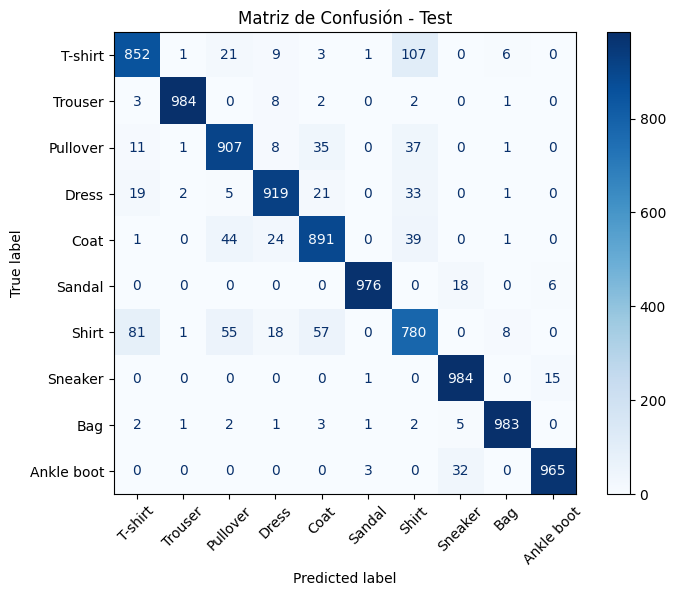

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

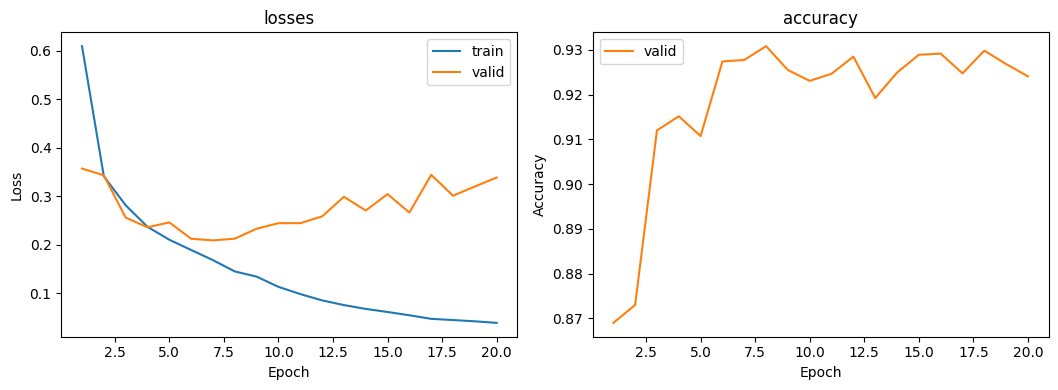

In [ ]:
plot_training_metrics(history9)

**Análisis de resultados:** ahora hemos probado con el modelo más habitual, Adam. Comenzamos el entrenamiento con una loss bastante alta en entrenamiento (alrededor de 1.02) que se va reduciendo de manera progresiva hasta llegar a valores cercanos a 0.03. Esto nos indica que el modelo aprende adecuadamente. La accuracy en entrenamiento también mejora de forma continua, comenzando en torno al 70% y alcanzando un 98.6%, lo que evidencia que el modelo consigue un alto grado de ajuste a los datos. En validación, el comportamiento también es bueno al principio: partimos con una accuracy del 87% y alcanzamos un 92.4%, pero con ciertas oscilaciones en las últimas épocas.

Si analizamos las curvas de pérdida, vemos que la loss de entrenamiento disminuye de manera muy estable y clara. En cambio, la curva de validación presenta más irregularidades, con subidas y bajadas que empiezan a notarse sobre todo a partir de la época 8 o 9. A pesar de eso, la curva de accuracy en validación sigue una tendencia general ascendente, aunque con picos y caídas más bruscas que en otras pruebas. Esto podría indicar que el modelo empieza a sobreajustarse ligeramente en las últimas épocas, ya que sigue mejorando en entrenamiento pero no en validación.

A nivel general, este modelo con Adam consigue resultados muy buenos, aunque no tan estables como con SGD. Las gráficas dejan ver un aprendizaje eficaz y rápido.

Prueba con:
* Adam
* Lr=0.001
* Cross Entropy Loss
* Bs=1000
* 20 épocas

In [ ]:
model_c2 = build_model_c2()

model_c2.compile(
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history10=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=1000, #bs 1000
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - accuracy: 0.4185 - loss: 3.0279 - val_accuracy: 0.3863 - val_loss: 2.0613
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7952 - loss: 0.5566 - val_accuracy: 0.1158 - val_loss: 2.2958
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.8430 - loss: 0.4344 - val_accuracy: 0.1000 - val_loss: 2.4804
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.8656 - loss: 0.3741 - val_accuracy: 0.1067 - val_loss: 2.4565
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 194ms/step - accuracy: 0.8860 - loss: 0.3191 - val_accuracy: 0.1615 - val_loss: 2.2228
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.8928 - loss: 0.2990 - val_accuracy: 0.2949 - val_loss: 1.9042
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.8998 - loss: 0.2749 - val_accuracy: 0.4060 - val_loss: 1.5299
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9045 - loss: 0.2599 - val_accurac

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9407    0.9227    0.9316      4800
           1     0.9987    0.9910    0.9949      4800
           2     0.9537    0.9269    0.9401      4800
           3     0.9376    0.9892    0.9627      4800
           4     0.8880    0.9748    0.9294      4800
           5     0.9990    0.9983    0.9986      4800
           6     0.9242    0.8358    0.8778      4800
           7     0.9943    0.9888    0.9915      4800
           8     0.9983    0.9969    0.9976      4800
           9     0.9888    0.9944    0.9916      4800

    accuracy                         0.9619     48000
   macro avg     0.9623    0.9619    0.9616     48000
weighted avg     0.9623    0.9619    0.9616     48000



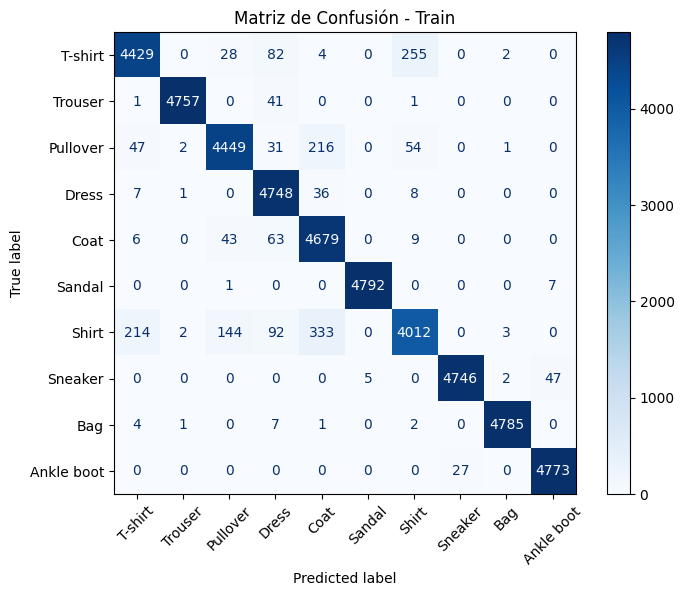

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8663    0.8583    0.8623      1200
           1     0.9941    0.9808    0.9874      1200
           2     0.9032    0.8708    0.8867      1200
           3     0.8881    0.9592    0.9223      1200
           4     0.8235    0.9175    0.8680      1200
           5     0.9736    0.9850    0.9793      1200
           6     0.8273    0.7225    0.7714      1200
           7     0.9720    0.9550    0.9634      1200
           8     0.9866    0.9817    0.9841      1200
           9     0.9692    0.9708    0.9700      1200

    accuracy                         0.9202     12000
   macro avg     0.9204    0.9202    0.9195     12000
weighted avg     0.9204    0.9202    0.9195     12000



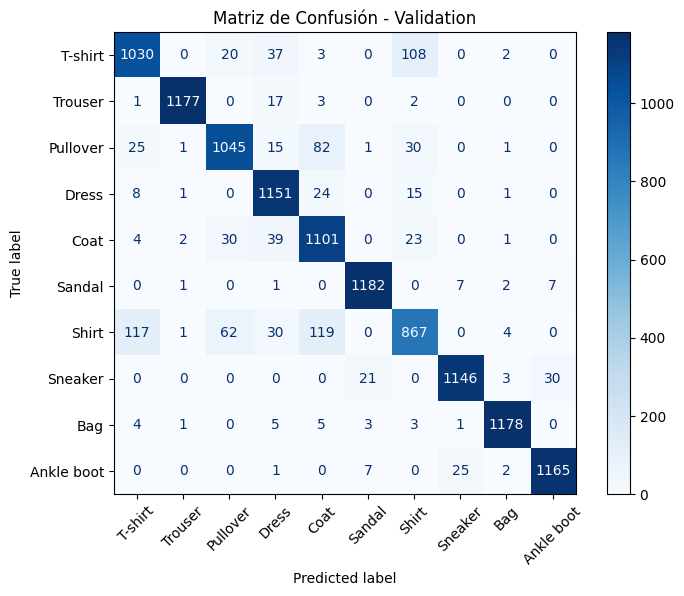

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8759    0.8540    0.8648      1000
           1     0.9939    0.9720    0.9828      1000
           2     0.9018    0.8630    0.8820      1000
           3     0.8816    0.9530    0.9159      1000
           4     0.8068    0.9310    0.8644      1000
           5     0.9890    0.9870    0.9880      1000
           6     0.8035    0.6950    0.7453      1000
           7     0.9720    0.9730    0.9725      1000
           8     0.9939    0.9800    0.9869      1000
           9     0.9701    0.9750    0.9726      1000

    accuracy                         0.9183     10000
   macro avg     0.9188    0.9183    0.9175     10000
weighted avg     0.9188    0.9183    0.9175     10000



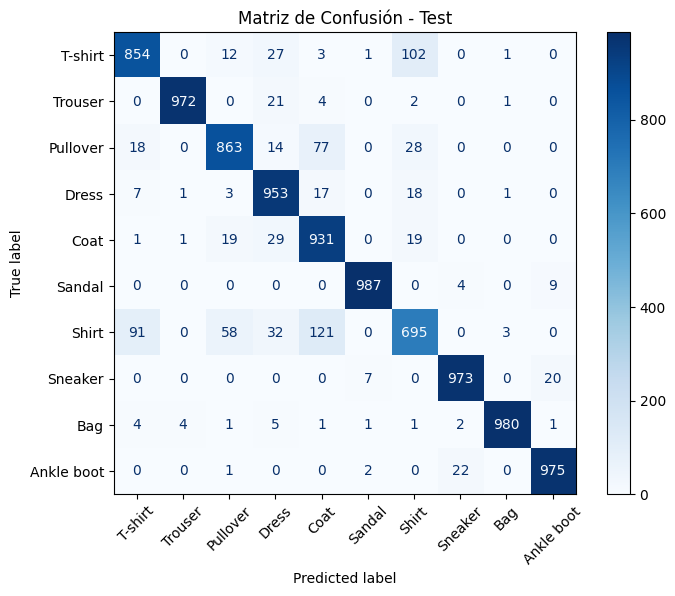

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

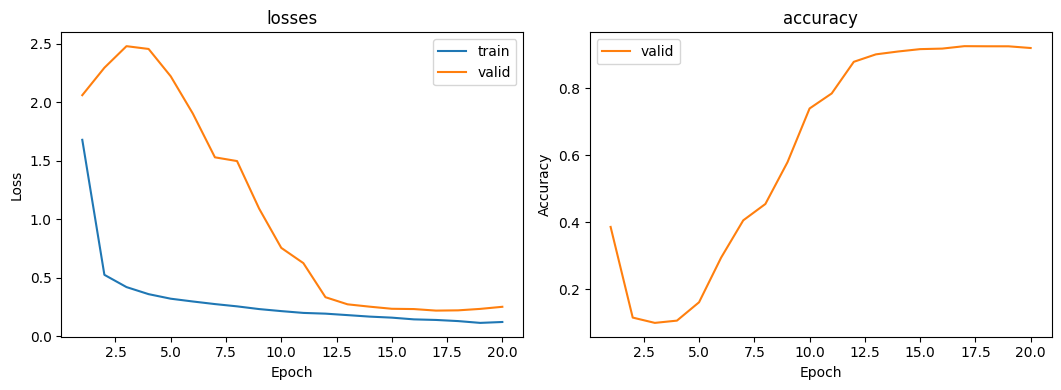

In [ ]:
plot_training_metrics(history10)

**Análisis de resultados:** hemos cambiado el tamaño del bs a 1000. El entrenamiento comienza con una loss en entrenamiento de más de 3, lo cual es bastante elevado y típico cuando se usa un batch size muy grande. Durante las primeras épocas, la red mejora lentamente, y se observa que tarda más en arrancar en validación. De hecho, en las primeras 10 épocas la accuracy en validación apenas sube y permanece por debajo del 80%, pero a partir de la época 11 se aprecia una mejora rápida y consistente. Finalmente, el entrenamiento alcanza una accuracy de entrenamiento del 95.9% y en validación sube hasta un 92%, lo cual indica que el modelo ha conseguido aprender correctamente, aunque le ha costado más debido al tamaño del batch. Lo ha hecho más lentamente.

Si nos fijamos en las gráficas de pérdida, la curva de pérdida de entrenamiento baja de manera continua, pero la de validación arranca con una subida muy pronunciada, llegando a valores por encima de 2.5 en las primeras épocas, típico comportamiento con un bs grande. Sin embargo, a partir de la época 10 ambas curvas convergen y terminan estabilizándose en valores bajos.

En cuanto a la curva de accuracy de validación, es también muy representativa del efecto del batch size: empieza muy baja, incluso con bajones iniciales, pero una vez que la red comienza a ajustarse correctamente, la accuracy sube de forma muy pronunciada. A partir de la época 12, la curva se estabiliza por encima del 90%, lo que indica que, aunque el aprendizaje es más lento al principio, el modelo logra buenos resultados finales.

Resumiendo, esta prueba confirma que entrenar con un batch size de 1000 hace que el modelo aprenda más despacio en las primeras fases, pero puede llegar a un rendimiento similar si se entrena durante suficientes épocas. El modelo generaliza bien y las gráficas reflejan esa evolución más pausada pero igualmente eficaz.

Prueba con:
* Adam
* Lr=0.0001
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
model_c2 = build_model_c2()

model_c2.compile(
    optimizer=Adam(learning_rate=0.0001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history11=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7446 - loss: 0.7344 - val_accuracy: 0.8849 - val_loss: 0.3156
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8743 - loss: 0.3566 - val_accuracy: 0.8986 - val_loss: 0.2712
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8947 - loss: 0.2888 - val_accuracy: 0.9035 - val_loss: 0.2618
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9130 - loss: 0.2397 - val_accuracy: 0.9154 - val_loss: 0.2393
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9219 - loss: 0.2161 - val_accuracy: 0.9227 - val_loss: 0.2256
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9303 - loss: 0.1886 - val_accuracy: 0.9283 - val_loss: 0.2085
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9424 - loss: 0.1611 - val_accuracy: 0.9097 - val_loss: 0.2676
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9478 - loss: 0.1446 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9789    0.9979    0.9883      4800
           1     0.9996    1.0000    0.9998      4800
           2     0.9829    0.9958    0.9893      4800
           3     0.9936    0.9988    0.9962      4800
           4     0.9929    0.9902    0.9916      4800
           5     0.9919    0.9988    0.9953      4800
           6     0.9946    0.9594    0.9767      4800
           7     0.9934    0.9996    0.9965      4800
           8     1.0000    1.0000    1.0000      4800
           9     0.9996    0.9865    0.9930      4800

    accuracy                         0.9927     48000
   macro avg     0.9927    0.9927    0.9927     48000
weighted avg     0.9927    0.9927    0.9927     48000



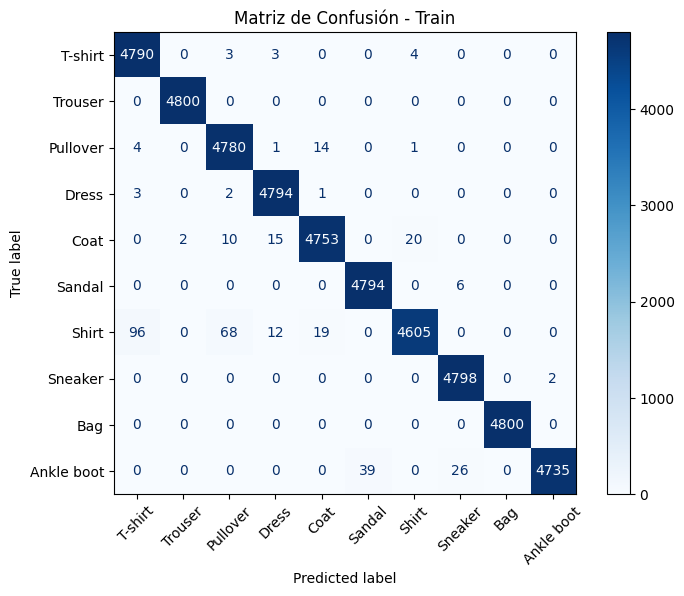

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8484    0.9092    0.8777      1200
           1     0.9892    0.9908    0.9900      1200
           2     0.8682    0.9167    0.8918      1200
           3     0.9191    0.9367    0.9278      1200
           4     0.9051    0.8900    0.8975      1200
           5     0.9688    0.9825    0.9756      1200
           6     0.8506    0.7400    0.7914      1200
           7     0.9492    0.9817    0.9652      1200
           8     0.9874    0.9825    0.9850      1200
           9     0.9895    0.9450    0.9668      1200

    accuracy                         0.9275     12000
   macro avg     0.9275    0.9275    0.9269     12000
weighted avg     0.9275    0.9275    0.9269     12000



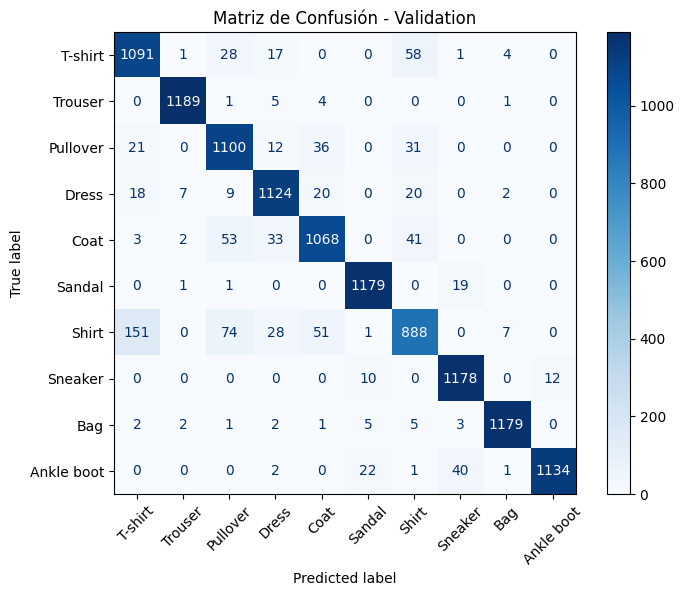

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8439    0.9190    0.8798      1000
           1     0.9910    0.9880    0.9895      1000
           2     0.8905    0.9190    0.9045      1000
           3     0.9231    0.9360    0.9295      1000
           4     0.9008    0.9080    0.9044      1000
           5     0.9714    0.9860    0.9787      1000
           6     0.8575    0.7340    0.7909      1000
           7     0.9537    0.9890    0.9710      1000
           8     0.9869    0.9830    0.9850      1000
           9     0.9906    0.9470    0.9683      1000

    accuracy                         0.9309     10000
   macro avg     0.9309    0.9309    0.9302     10000
weighted avg     0.9309    0.9309    0.9302     10000



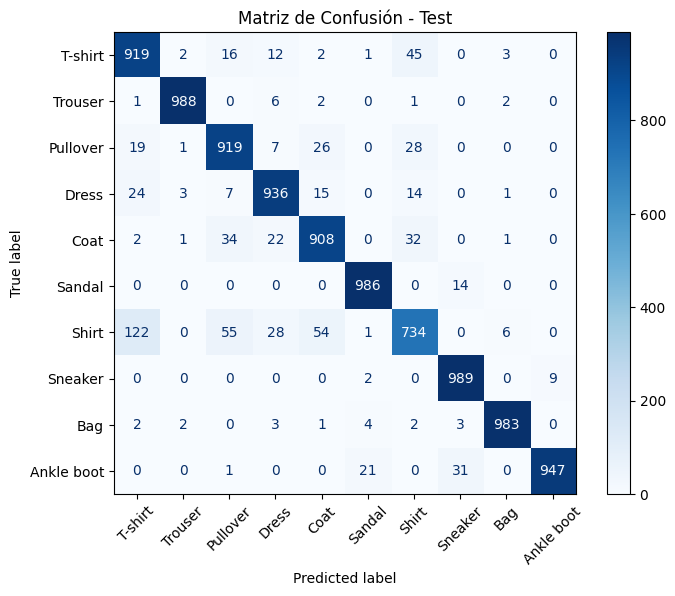

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

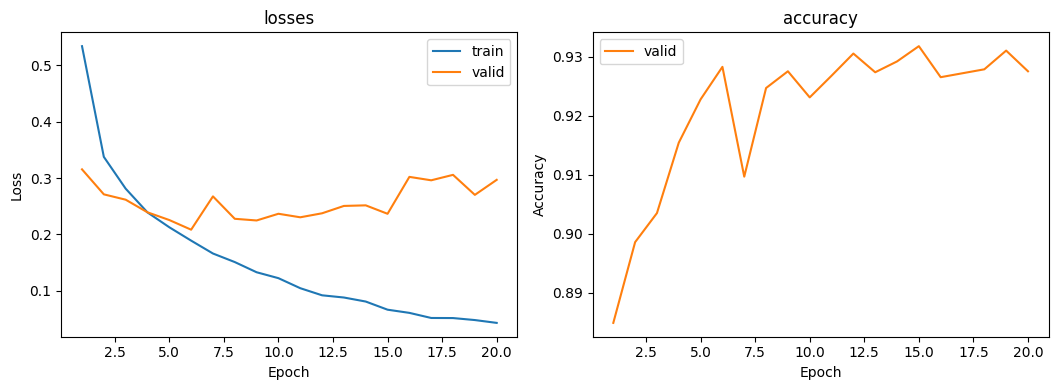

In [ ]:
plot_training_metrics(history11)

**Análisis de resultados:** el entrenamiento comienza con una loss de 0.73, que es relativamente baja teniendo en cuenta que se ha utilizado una tasa de aprendizaje pequeña. A medida que avanzan las épocas, se observa una mejora constante en la pérdida, que termina por debajo de 0.04, y una accuracy que sube progresivamente desde el 74% hasta un excelente 98.6%. En validación, sube pero muy poco y con oscilaciones, hasta que se distnacian bastante las curvas de pérdida.

Si observamos las curvas, se aprecia una diferencia importante respecto a otras pruebas: tanto la curva de pérdida como la de accuracy son muy suaves y progresivas, lo que es típico de cuando se usa una tasa de aprendizaje más pequeña. La loss de entrenamiento baja de forma continua y limpia, mientras que la de validación no baja tanto y oscila un poco. Existe algo de sobreajuste.

La curva de acuraccy en validación sube bien, con alguna pequeña oscilación, pero en general bien. En test se queda en un 93% de acuraccy, lo cual es de lo más alto.

Prueba con:
* Adam
* Lr: vamos a usar un scheduler que vaya reduciendo la tasa de aprendizaje cuando una métrica haya dejado de mejorar. Nosotros nos vamos a fijar en la loss de validación. Lee la métrica y si no se observa ninguna mejora en un número "patience" de épocas, reduce la tasa de aprendizaje.  Esto puede ser beneficioso ya que se adapta al entrenamiento y no hay que fijar de antes un lr manualmente.
* Cross Entropy Loss
* Bs=64
* 20 épocas

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', #metrica que observa el scheduler
    factor=0.5, #reduce a la mitad el lr cuando se aplica
    patience=3, # espera 3 epocas sin mejora
    min_lr=1e-6, # limite inferior, no puede bajar mas de ese lr
    verbose=1 #mensajes cuando se activa solo
)

In [ ]:
model_c2 = build_model_c2()

model_c2.compile(
    optimizer=Adam(learning_rate=0.001), #tasa de aprendizaje
    loss='sparse_categorical_crossentropy', #cross entropy loss
    metrics=['accuracy'] #por ahora accuracy, despues calculamos otras
)

In [ ]:
history12=model_c2.fit(
    X_train, y_train, #train
    epochs=20, #20 epocas
    batch_size=64, #bs 64
    validation_data=(X_val, y_val), #validacion
    callbacks=[reduce_lr] #scheduler
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.7185 - loss: 0.9636 - val_accuracy: 0.8663 - val_loss: 0.3699 - learning_rate: 0.0010
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8729 - loss: 0.3577 - val_accuracy: 0.8910 - val_loss: 0.3061 - learning_rate: 0.0010
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8954 - loss: 0.2854 - val_accuracy: 0.9116 - val_loss: 0.2467 - learning_rate: 0.0010
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9145 - loss: 0.2378 - val_accuracy: 0.9138 - val_loss: 0.2461 - learning_rate: 0.0010
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9225 - loss: 0.2123 - val_accuracy: 0.9207 - val_loss: 0.2251 - learning_rate: 0.0010
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9301 - loss: 0.1903 - val_accuracy: 0.9119 - val_loss: 0.2462 - learning_rate: 0.0010
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9397 - l

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Train Metrics
              precision    recall  f1-score   support

           0     0.9996    0.9981    0.9989      4800
           1     1.0000    1.0000    1.0000      4800
           2     0.9973    0.9983    0.9978      4800
           3     0.9998    1.0000    0.9999      4800
           4     0.9981    0.9992    0.9986      4800
           5     1.0000    1.0000    1.0000      4800
           6     0.9977    0.9971    0.9974      4800
           7     0.9996    1.0000    0.9998      4800
           8     1.0000    0.9996    0.9998      4800
           9     0.9998    0.9996    0.9997      4800

    accuracy                         0.9992     48000
   macro avg     0.9992    0.9992    0.9992     48000
weighted avg     0.9992    0.9992    0.9992     48000



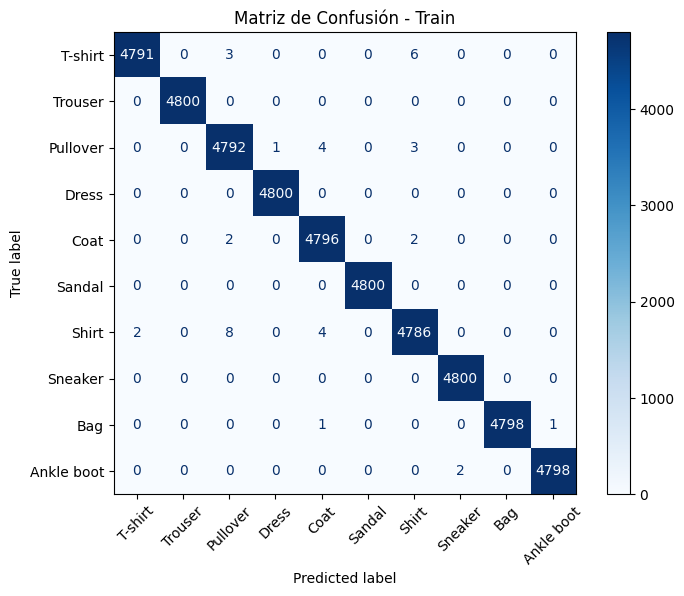

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Validation Metrics
              precision    recall  f1-score   support

           0     0.8822    0.8858    0.8840      1200
           1     0.9958    0.9958    0.9958      1200
           2     0.8983    0.9125    0.9053      1200
           3     0.9281    0.9467    0.9373      1200
           4     0.9083    0.9083    0.9083      1200
           5     0.9851    0.9892    0.9871      1200
           6     0.8387    0.8058    0.8219      1200
           7     0.9661    0.9733    0.9697      1200
           8     0.9908    0.9875    0.9891      1200
           9     0.9773    0.9683    0.9728      1200

    accuracy                         0.9373     12000
   macro avg     0.9371    0.9373    0.9371     12000
weighted avg     0.9371    0.9373    0.9371     12000



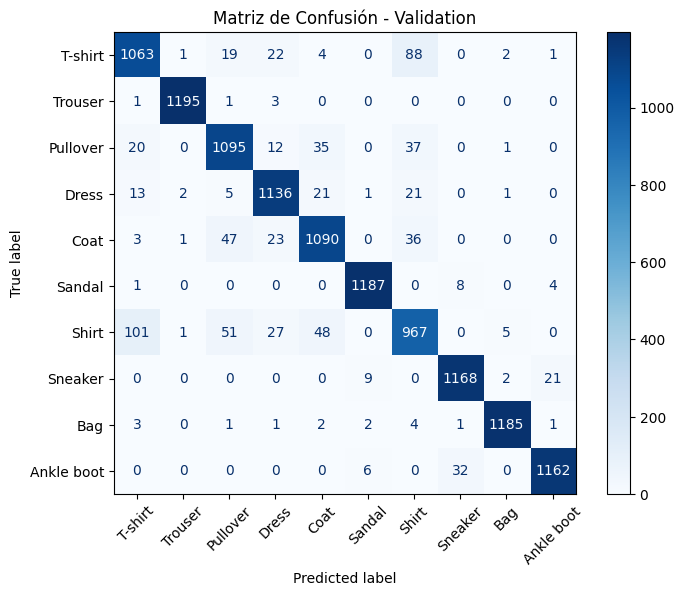

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Test Metrics
              precision    recall  f1-score   support

           0     0.8733    0.8820    0.8776      1000
           1     0.9949    0.9850    0.9899      1000
           2     0.8853    0.9110    0.8980      1000
           3     0.9292    0.9320    0.9306      1000
           4     0.8807    0.9080    0.8941      1000
           5     0.9881    0.9930    0.9905      1000
           6     0.8226    0.7700    0.7955      1000
           7     0.9695    0.9850    0.9772      1000
           8     0.9920    0.9880    0.9900      1000
           9     0.9827    0.9670    0.9748      1000

    accuracy                         0.9321     10000
   macro avg     0.9318    0.9321    0.9318     10000
weighted avg     0.9318    0.9321    0.9318     10000



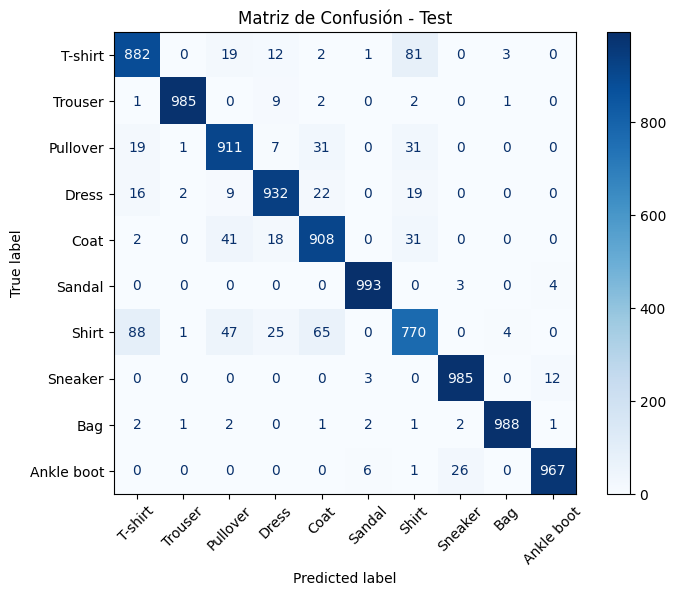

In [ ]:
evaluate_model(model_c2, X_train, y_train, dataset_name="Train")
evaluate_model(model_c2, X_val, y_val, dataset_name="Validation")
evaluate_model(model_c2, test_images, test_labels, dataset_name="Test")

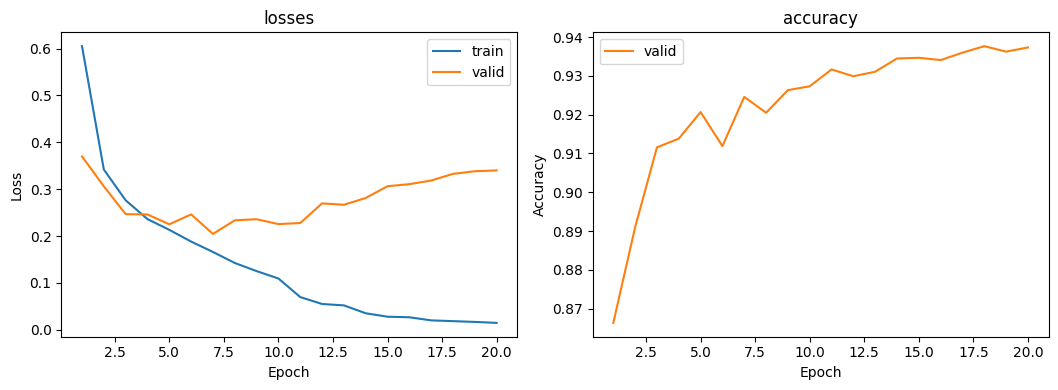

In [ ]:
plot_training_metrics(history12)

**Analisis de resultados:** con esta última prueba hemos utilizado un scheduler. Comienza con una loss de entrenamiento de 0.96 y una accuracy de alrededor del 71%. A medida que el entrenamiento avanza, la red mejora rápidamente y alcanza una loss final de tan solo 0.014 con una accuracy de entrenamiento del 99.5%. En validación, el rendimiento también es muy bueno: la accuracy parte del 86.6% y termina en 93.7%, con una curva de mejora clara durante las primeras 10 épocas. El uso del scheduler ha permitido reducir progresivamente el learning rate cuando la validación se estancaba, consiguiendo así mantener el modelo aprendiendo y evitar un sobreajuste extremo, aunque aun así hay un poco.

En comparación con el acuraccy en test, se ha quedado en primer puesto con un 93.2%, lo cual es una métrica muy buena.

Tabla resumen del modelo c2:



| Prueba                    | Optimizador | Learning Rate | Batch Size | Test Accuracy |
|---------------------------|-------------|----------------|-------------|----------------|
| C2 - SGD                  | SGD         | 0.001          | 64          | 92.2%          |
| C2 - RMSProp              | RMSProp     | 0.001          | 64          | 92.3%          |
| C2 - Adam                 | Adam        | 0.001          | 64          | 92.4%          |
| C2 - Adam (bs=1000)       | Adam        | 0.001          | 1000        | 91.8%          |
| C2 - Adam (lr=0.0001)     | Adam        | 0.0001         | 64          | 93.1%          |
| **C2 - Adam + Scheduler** | Adam        | dinámico       | 64          | **93.2%**      |

## Discusión de resultados y extracción de conclusiones

Hemos ido analizando ejecucción a ejecucción, por lo que en este apartado vamos solo a extraer conclusiones y comparaciones entre los dos modelos c1 y c2.

Podemos ver como con el modelo c2 que el acuraccy sube más, de hecho hasta el 93%, pero al ser más complejo tiende más al sobreajuste aunque se haya añadido dropout.

En general, los optimizadores Adam y AdamW son los que más rendimiento han dado, solo que han pecado un poco de sobreaprendizaje.

El modelo C1 aprendía más lento y no llegaba a explotar la mejor solución.

En cuanto a la subida del bs, en ambos modelos ralentizó el entrenamiento aunque al final llegaba al mismo rendimiento que con bs menor. En el modelo c2 se vió ese cambión más radicalmente porque al principió le costó aprender mucho.

En general, ha ido mejor utilizar un scheduler que tener un lr fijo. Por ejemplo, en el c2 fue con él con el que se obtenió la mayor acuraccy.

Aedmás, hay un aspecto importante que no ha sido mencionado anteriormente. El tiempo de ejecucción en el modelo c2 es mucho mayor. Esto se debe a que es más complejo y tarda más en entrenar. Si no tenemos mucha capacidad de cómputo, esto es un incoveniente.

Como conclusión, el modelo c2 es más potente por lo que consigue mejores resultados pero hay que tener más cuidado con el overfitting que genera al tener más parámetros. Por otro lado, el modelo c1 es más sencillo y estable. Dependerá de nuestro contexto, problema y dataset, elegir un modelo u otro.

| Modelo | Configuración Destacada        | Test Accuracy | Observaciones                         |
| ------ | ------------------------------ | ------------- | ------------------------------------- |
| C1     | Adam + Scheduler (lr dinámico) | 89.2%         | Muy estable, generaliza bien          |
| C1     | Adam (lr=0.0001)               | 88.0%         | Aprendizaje lento pero robusto        |
| C1     | RMSProp (lr=0.001)             | 88.0%         | Rápido pero inestable                 |
| C1     | SGD (lr=0.001)                 | 88.6%         | Buen baseline, progresivo             |
| C2     | Adam + Scheduler               | **93.2%**     | Mejor resultado, adaptativo y estable |
| C2     | Adam (lr=0.0001)               | 93.1%         | Muy estable y preciso                 |
| C2     | Adam (lr=0.001)                | 92.4%         | Buen rendimiento general              |
| C2     | RMSProp (lr=0.001)             | 92.3%         | Rendimiento alto, algo oscilante      |
| C2     | SGD (lr=0.001)                 | 92.2%         | Evolución constante, sin sobresaltos  |
| C2     | Adam (bs=1000)                 | 91.8%         | Tarda más en aprender, pero recupera  |


# **Ejercicio 2: IA generativa con Autoencoders (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema utilizando autoencoders, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema  de **Inteligencia Artificial Generativa** haciendo uso de técnicas de Deep Learning para tratar de generar imágenes que contienen dígitos manuscritos.

## Contexto del problema

La **IA generativa** es un tipo de Inteligencia Artificial que se centra en crear contenido nuevo y original. Esto puede incluir texto, imágenes, música, vídeo, etc. A diferencia de otros tipos de IA que se enfocan en analizar o clasificar datos, la IA generativa utiliza modelos complejos para aprender patrones y características de los datos existentes y luego generar algo nuevo basado en ese aprendizaje.

Un ejemplo popular de IA generativa son los modelos de lenguaje, como **ChatGPT**. Estos modelos pueden escribir historias, responder preguntas o incluso mantener una conversación, todo basado en la información con la que fueron entrenados.

La IA generativa también se utiliza en el arte, donde puede crear obras visuales sorprendentes, o en la música, donde puede componer melodías. Sin embargo, es importante tener en cuenta que, aunque puede producir resultados impresionantes, la calidad y la relevancia del contenido generado pueden variar.

<center>
<img src="https://bernardmarr.com/wp-content/uploads/2024/02/13-Ways-Writers-Should-Embrace-Generative-AI.webp" />
</center>

En esta práctica **vamos a hacer uso de autoencoders** para aprender las características de dígitos manuscritos, de modo que podamos utilizar el modelo entrenado **para generar nuevos dígitos previamente inexistentes**.

En particular, el modelo que deseamos construir constará de dos partes:

- Un **encoder**, capaz de obtener una imagen de entrada conteniendo un dígito manuscrito y dar como salida su *embedding*.
- Un **decoder**, cada de generar una imagen a partir de un *embedding*.


## El conjunto de datos

Utilizaremos el conjunto de datos de Digits MNIST incluido en TensorFlow, el cual se puede cargar utilizando el código de la siguiente celda:

In [1]:
import tensorflow as tf #importamos la libreria necesaria

train, test= tf.keras.datasets.mnist.load_data() #cargamos el dataset dividido en train y test
XTrain, YTrain= train
XTest, YTest= test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Construcción de **tres modelos**:
    1. **Encoder**, para codificar datos de entrada en *embeddings*.
    2. **Decoder**, para decodificar *embeddings*.
    3. **Autoencoder**, formado como la concatenación secuencial del **Encoder** y el **Decoder**
5. Selección y estimación de valores para hiperparámetros.
6. Validación del modelo. Discusión de resultados y extracción de conclusiones.


Con respecto a los modelos a utilizar, usaremos la siguiente estructura para el **Encoder**:


<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 1 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 28x28 | 14x14 </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 32 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> MaxPooling </td>
  <td> 2x2 </td>
  <td> 14x14 | 7x7 </td>
  <td> - </td>
</tr>
</table>


El **Decoder** deberá *deshacer* la codificación realizada por el **Encoder**, por lo que estableceremos una arquitectura de capas simétrica al primer módulo:

<table>
<th>
  <td><b>Layer Type</b></td>
  <td><b>kernel type (conv.)</b></td>
  <td><b>Input | Output dim.</b></td>
  <td><b>Input | Output channels (conv.)</b></td>
</th>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 7x7 | 14x14 </td>
  <td> 16 | 16 </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 14x14 | 14x14 </td>
  <td> 16 | 32 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>

<tr>
  <td></td>
  <td> UpSampling2D </td>
  <td> 2x2 </td>
  <td> 14x14 | 28x28 </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 32 | 64 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
<tr>
  <td></td>
  <td> Conv </td>
  <td> 3x3 </td>
  <td> 28x28 | 28x28 </td>
  <td> 64 | 1 </td>
</tr>
<tr>
  <td></td>
  <td> ReLU </td>
  <td> - </td>
  <td> - </td>
  <td> - </td>
</tr>
</table>


**Entrene el autoencoder un total de 50 épocas con tamaño de batch 1000. Use una función de pérdida habitual para resolución de problemas de regresión**.

<font color="red"><b>NO OLVIDAR ACTIVAR LA GPU EN LA CONFIGURACIÓN DEL CUADERNO (Menú Editar -> Configuración del cuaderno)</b></font>


Cuando el modelo **autoencoder** ya esté entrenado, además de su validación con el conjunto de test, realice las siguientes pruebas:

- **Usando sólo el encoder**:
   1. Seleccione todas las imágenes de un mismo dígito (por ejemplo, el dígito 0).
   2. Envíe esas imágenes como entrada al encoder, y obtenga los resultados de los embeddings.
   3. Calcule un **embedding promedio** calculando la media de cada componente de todos los embeddings.

- **Usando sólo el decoder**:
   4. Proporcione este nuevo **embedding promedio** como entrada al **Decoder**. ¿Qué se obtiene? ¿Es lógico el resultado?


- Realice los pasos anteriores del **Encoder** con todos los dígitos pero, en este caso, guarde el valor promedio y de desviación estándar (a este último lo denominaremos **embedding de desviación**.
- Genere, para cada dígito, varios **nuevos embeddings** simulando un muestreo desde una distribución normal de media el embedding promedio y desviación típica el embedding de desviación.
- Utilice los **embeddings nuevos** como entrada al módulo **Decoder**. ¿Qué se obtiene?
- Analice y discuta los resultados obtenidos.



In [2]:
#importamos las librerías necesarias
from sklearn.metrics import mean_squared_error, mean_absolute_error
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, ReLU, Dropout
from tensorflow.keras.optimizers import Adam, Adamax, Nadam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

## Análisis descriptivo y exploratorio de los datos


Se trata de un conjunto de datos de 60.000 imágenes en escala de grises de 28x28 de los 10 dígitos, junto con un conjunto de prueba de 10.000 imágenes

Empezamos cargando el dataset. Segun la información de Keras:
keras.datasets.mnist.load_data(path="mnist.npz")

Carga el dataset MNIST dataset. Son el mismo tamaño que el dataset anterior.

Las clases (etiquetas) son los propios dígitos del 0 al 10.

Esa función nos devuelve:

Tupla de matrices NumPy: (x_train, y_train), (x_test, y_test).

x_train: uint8 Matriz NumPy de datos de imagen en escala de grises con formas (60000, 28, 28), que contiene los datos de entrenamiento. Los valores de los píxeles van de 0 a 255.

y_train: uint8 matriz NumPy de etiquetas de dígitos (enteros en el rango 0-9) con forma (60000,) para los datos de entrenamiento.

x_test: matriz NumPy uint8 de datos de imagen en escala de grises con forma (10000, 28, 28), que contiene los datos de prueba. Los valores de los píxeles van de 0 a 255.

y_test: matriz NumPy uint8 de etiquetas de dígitos (enteros en el rango 0-9) con forma (10000,) para los datos de prueba.

In [3]:
#Cargamos el dataset, tanto train y test, como imagenes y etiquetas de cada conjunto
(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.mnist.load_data()

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Realmente las etiquetas no van a ser utilizdas porque lo que queremos es reconstruir imágenes, no clasificarlas.

In [5]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

print(f"Etiquetas: {np.unique(train_labels)}") #las etiquetas sin repetir (valores unicos)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Etiquetas: [0 1 2 3 4 5 6 7 8 9]


Tenemos la forma esperada que nos da la información sobre el dataset de keras.

In [6]:
# contamos las clases de train y test
train_counter = Counter(train_labels)
test_counter = Counter(test_labels)

print(train_counter)
print(test_counter)

Counter({np.uint8(1): 6742, np.uint8(7): 6265, np.uint8(3): 6131, np.uint8(2): 5958, np.uint8(9): 5949, np.uint8(0): 5923, np.uint8(6): 5918, np.uint8(8): 5851, np.uint8(4): 5842, np.uint8(5): 5421})
Counter({np.uint8(1): 1135, np.uint8(2): 1032, np.uint8(7): 1028, np.uint8(3): 1010, np.uint8(9): 1009, np.uint8(4): 982, np.uint8(0): 980, np.uint8(8): 974, np.uint8(6): 958, np.uint8(5): 892})


Vamos a verlo más visual con un histograma (solo en train):

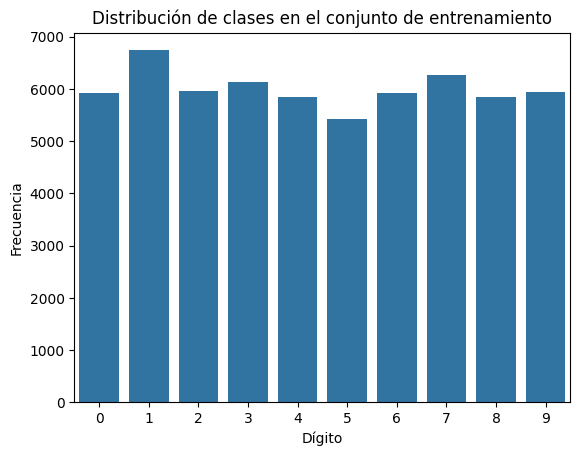

In [7]:
#histograma con los ejemplos de cada clase
sns.countplot(x=train_labels)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Dígito")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar como no hay el mismo número de ejemplos en cada clase, pero en general no distan mucho uno de otros, por lo que el desbalanceo es poco. El que más hay es del 1.

Vamos a ver como son las imágenes de nuestro dataset como ejemplo. Solo lo hacemos del train ya que no es una buena práctica y sería incorrecto hacerlo del test, de hecho, estaríamos haciendo data snooping.

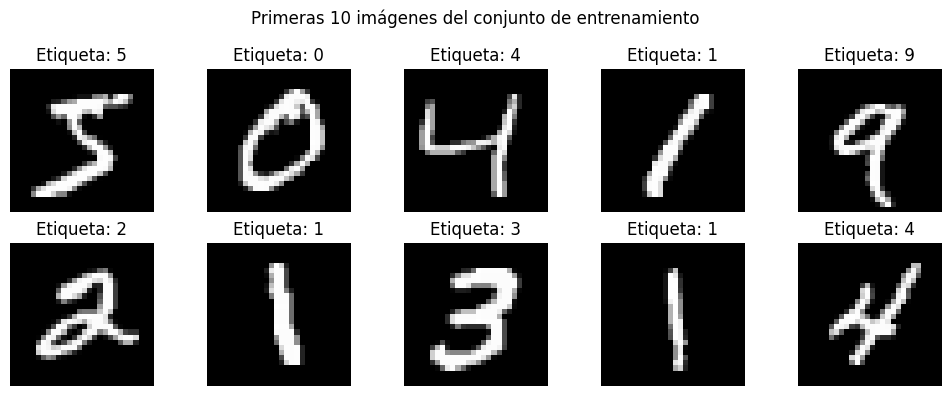

In [8]:
#visualizamos las 10 primeras imágenes de train
plt.figure(figsize=(10, 4)) #creamos figura de 10x4 pulgadas
for i in range(10): #las 10 prieras imagenes
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("Primeras 10 imágenes del conjunto de entrenamiento")
plt.tight_layout()
plt.show()

Vamos a crear un diccionario con un resumen de las imagenes, es decir, con lo mas importante.

In [9]:
image_shape = train_images.shape[1:] #dimensiones

# Diccionario con un resumen
data_summary = {
    'Conjunto': ['Entrenamiento', 'Test'], #tipo de conjunto
    'Número de imágenes': [train_images.shape[0], test_images.shape[0]],
    'Dimensiones de imagen': [image_shape, image_shape],
    'Número de clases': [len(set(train_labels)), len(set(test_labels))]
}

In [10]:
# Resumen:
summary_df = pd.DataFrame(data_summary)
print(summary_df)

        Conjunto  Número de imágenes Dimensiones de imagen  Número de clases
0  Entrenamiento               60000              (28, 28)                10
1           Test               10000              (28, 28)                10


Recapitulando, tenemos train con 60000 imagenes y test con 10000 donde todas las imagenes tienen un size de 28x28 y tenemos un total de 10 clases que son los dígitos del 0 al 9.

Como son imágenes, vamos a ver el rango de valores que puede tomar cada pixel. Es decir, son imágenes en blanco y negro que van desde 0 a 255.

In [11]:
#maximo y minimo de los pixeles, como es blanco y negro entre 0 y 255
print(f"Mínimo valor de píxeles: {train_images.min()}")
print(f"Máximo valor de píxeles: {train_images.max()}")

Mínimo valor de píxeles: 0
Máximo valor de píxeles: 255


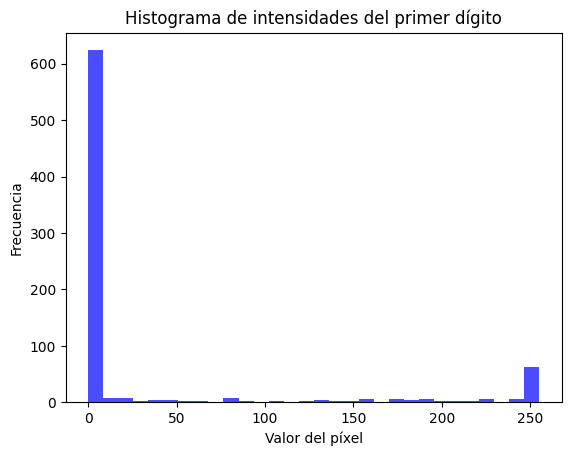

In [12]:
# histograma con el valor de los pixeles
plt.hist(train_images[0].ravel(), bins=30, color='blue', alpha=0.7)
plt.title("Histograma de intensidades del primer dígito")
plt.xlabel("Valor del píxel")
plt.ylabel("Frecuencia")
plt.show()

Podemos observar como la gran mayoría es el valor 0 ya que es el fondo, color negro. El segundo más frecuente es el blanco. Esto tiene sentido ya que los números son representados la gran mayoría en color blanco.

## Preprocesado de datos
Vamos a preparar un poco los datos antes de entrenar ya que suele ser mejor tener buenos datos para que den buenos resultados. Aun así, nos daremos cuenta que hace falta poco preprocesado ya que los datos están bastante filtrados y dan buenos resultados de por sí. Vamos a plantear los siguientes apartados:

*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos




### Selección y extracción de características

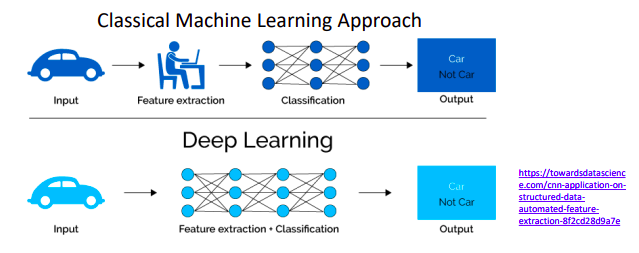

En las prácticas anteriores (primer enfoque de la imagen), hemos sido nosotros los que hemos tenido que hacer una extracción manual de las características y atributos. Después, una vez las teníamos seleccionadas aplicabamos un modelo para clasificar. En Deep Learning, no somos nosotros los que extraemos las características, si no que como input va directamente la imagen y es la propia red neuronal la que extrae directamente las características para hacer la clasificación. Por tanto, como estamos trabajando con imágenes y con redes convolucionales que ya van a aprender las características de las propias imágenes, no hace falta hacer manualmente una selección y extracción de características.

### Reducción de dimensionalidad

Estamos trabajando con imágenes de 28x28 pixeles que son bastante pequeñas en general, por lo que no vamos a reducir la dimensionalidad de la imagen. Buscando en internet cual es el tamaño estándar con el que se trabaja, lo que más me he encontrado es de 224x224 o 128x128.

Como el autoencoder buscan características, incluso hasta las más pequeñas como texturas o bordes, si reducimos más se podría perder información.

### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos. Puede ser mucho más alto o mucho más bajo que los demás puntos de datos. Esto puede hacer que se desvie el ajuste del modelo.

Pueden  ser errores de medición o de ejecución.

Para las prácticas anteriores, calculabamos el rango intercuartílico, pero con imágenes ahora es más complicado porque como mucho podemos ver si hay imágenes corruptas, totalmente en blanco, totalmente en negro, con ruido visual... Yo voy a mirar lo más básico que es ver si hay imágenes enteras en negro o enteras en blanco.

Aun así, al ser un famoso dataset está ya previamente preprocesado, por lo que no es normal que haya una imagen corrupta.

In [13]:
#Vemos en el train el numero de imagenes todo blanco y todo negro por si hay alguna corrupta
img_tot_negra=np.sum(train_images==0, axis=(1,2))==(28*28) #si absolutamente todos los pixeles son 0 (negro)
img_tot_blanca=np.sum(train_images==255, axis=(1,2))==(28*28)#si absolutamente todos los pixeles son 255 (blanco)

In [14]:
print("Numero img totalmente negras:", np.sum(img_tot_negra))
print("Numero img totalmente blancas:", np.sum(img_tot_blanca))

Numero img totalmente negras: 0
Numero img totalmente blancas: 0


### Missing values


Vamos a ver si hay imágenes nulas en el dataset:

In [15]:
print("NaNs en train_images:", np.isnan(train_images).any())
print("NaNs en train_labels:", np.isnan(train_labels).any())

NaNs en train_images: False
NaNs en train_labels: False


Podemos comprobar también que todos los pixeles esten en el rango correspondiente:

In [16]:
print("Minimo y maximo:", np.min(train_images), np.max(train_images))

Minimo y maximo: 0 255


Podemos ver que todo está en orden y que efectvimente el dataset está limpio para usar sobre este aspecto.

### Escalado de variables

Vamos a transformar los datos numéricos de los píxeles. Es decir, ahora mismo hemos visto que los píxeles van desde 0 (negro) hasta 255 (blanco). Sin embrgo, es importante escalar los valores de píxeles entre 0 y 1.

Esta transformación ayuda a las redes neuronales a procesar las imágenes con mayor eficacia. Al normalizar obligas a que las imágenes se centren en torno al cero, lo que hace que el entrenamiento sea más rápido. También evita el sobreajuste porque todas las características van a contribuir por igual. Además, puede que si no se escalan los gradientes durante el entrenamiento se vuelvan inestables y tarde más en aprender.

Referencia: https://medium.com/@piyushkashyap045/image-normalization-in-pytorch-from-tensor-conversion-to-scaling-3951b6337bc8



Vamos a aplicar MinMaxScaler: transforma los datos paar que estén en un rango, suele ser entre 0 y 1.

La fórmula que utiliza es:
$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$


In [17]:
train_images=train_images/255.0 #dividimos entre 255 porque es el maximo, el minimo es 0
test_images=test_images/255.0

In [18]:
print("Minimo y maximo:", np.min(train_images), np.max(train_images))

Minimo y maximo: 0.0 1.0


### Codificación y transformación de datos

En el propio dataset ya vienen las etiquetas del 0 al 9 dependiendo del tipo.

Al igual que en el ejemplo proporcionado en prado, en TensorFlow, el procesamiento de imágenes necesita especificar de forma explítica la profundidad o canales que tiene cada imagen. Aunque estén en blanco y negro, es necesario y obligado explicitar que hay un único canal.

Haremos esto incluyendo una última dimensión a los datos de entrada.

Las imágenes originales tienen la dimensión (60000, 28, 28) y lo que vamos a hacer es ponerlo de la siguiente forma: (batch_size, height, width, channels)

In [19]:
train_images = np.expand_dims(train_images, axis=-1) #axis=-1 añade una dimension al final que es el canal del color
test_images = np.expand_dims(test_images, axis=-1) #como las imagenes estan en escala de grises el numero de canales es 1

In [20]:
train_images.shape

(60000, 28, 28, 1)

Convertimos a tensores de TensorFlow aunque no siempre es necesario.

In [21]:
train_images_tensor = tf.convert_to_tensor(train_images, dtype=tf.float32)
train_labels_tensor = tf.convert_to_tensor(train_labels, dtype=tf.int32)

Se mantiene el canal añadido antes.

### Desbalanceo de datos


Hemos visto antes que no teníamos el mismo número de instancias de cada clase pero tampoco había desbalanceo extremo, y de hecho, lo hemos comprobado visualmente.  

In [22]:
unique, counts = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, counts)))

{np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}


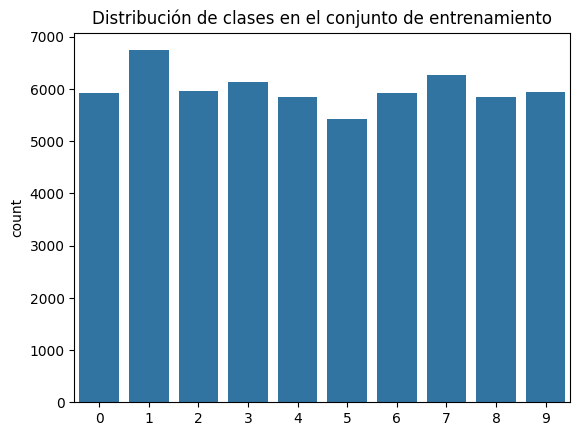

In [23]:
#volvemos a verlo el histograma correspondiente (solo en train)
sns.countplot(x=train_labels)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.show()

Efectivamente podemos comprobar como hay más ejemplos de la clase 1 y 7 por ejemplo. De la que menos, de la clase del dígito 5.

## Protocolo de de validación experimental y métricas


Vamos a dividirlo tres conjuntos: entrenamiento, validación y test.

Ya hemos dividido entre entrenamiento y test porque es lo que viene predeterminado en el propio dataset: en train 60000 imágenes y en test 10000 imágenes. Por tanto, ahora vamos a hacer dentro de entrenamiento una división del 90% para entrenamiento y 10% para validación. Hacemos que la partición sea

En este ejercicio no vamos a intentar clasificar los números, lo que vamos a intentar es a reconstruir las imágenes. Es decir, estamos antes un autoencoder no supervisado por lo que no necesitamos las etiquetas.

In [24]:
# Dividimos en train y validacion (test ya lo tenemos)
train_images_sub, val_images = train_test_split(train_images, test_size=0.1, random_state=9)

print(f"Train shape: {train_images_sub.shape}")
print(f"Validation shape: {val_images.shape}")
print(f"Test shape: {test_images.shape}")

Train shape: (54000, 28, 28, 1)
Validation shape: (6000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [25]:
print("train_images_sub:", train_images_sub.shape, train_images_sub.min(), train_images_sub.max())
print("val_images:", val_images.shape, val_images.min(), val_images.max())
print("test_images:", test_images.shape, test_images.min(), test_images.max())

train_images_sub: (54000, 28, 28, 1) 0.0 1.0
val_images: (6000, 28, 28, 1) 0.0 1.0
test_images: (10000, 28, 28, 1) 0.0 1.0


### Métricas de evaluación

Voy a explicar las métricas que voy a utilizar: MSE (mean squared error) y MAE (mean absolute error).

El MSE mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Es sensible a errores grandes debido a la penalización cuadrática.

Sea $ \mathbf{x} = (x_1, x_2, \ldots, x_n) $ el vector de valores reales (por ejemplo, una imagen original), y $ \hat{\mathbf{x}} = (\hat{x}_1, \hat{x}_2, \ldots, \hat{x}_n) $ el vector de valores predichos o reconstruidos por el modelo, entonces el MSE se define como:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

Donde:
- $ n $: número total de elementos (píxeles).
- $ x_i $: valor real en la posición $ i $.
- $ \hat{x}_i $: valor reconstruido en la misma posición.

El MAE calcula el promedio de los valores absolutos de las diferencias entre los valores reales y los predichos. Es menos sensible a valores extremos que el MSE, y por tanto más robusto frente a outliers.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \hat{x}_i|
$$

Mismas variables que en MSE.


In [26]:
#funcion para evaluar el modelo de un autoencoder (MSE y MAE)
def evaluate_autoencoder_metrics(model, X, dataset_name="Test", num_examples=5):
    print(f"\nEvaluación del Autoencoder - {dataset_name}")
    reconstructed = model.predict(X) #predicciones del modelo

    mse_list, mae_list = [], [] #vamos a calcular mse y mae

    for i in range(num_examples): #itera en el conjunto elegido
        original = X[i]
        recon = reconstructed[i]

        #convertimos a numpy
        original_np = original.numpy() if hasattr(original, 'numpy') else original
        recon_np = recon.numpy() if hasattr(recon, 'numpy') else recon

        #calculamos mse y mae
        mse_val = mean_squared_error(original_np.flatten(), recon_np.flatten())
        mae_val = mean_absolute_error(original_np.flatten(), recon_np.flatten())

        #añadimos metricas
        mse_list.append(mse_val)
        mae_list.append(mae_val)

    #imprimimos resultados
    print(f"MSE medio:  {np.mean(mse_list):.6f}")
    print(f"MAE medio:  {np.mean(mae_list):.6f}")

In [27]:
#funcion para visualizar una grafica de loss durante el entrenamiento
def plot_autoencoder_training_metrics(history): #le pasamos el historico
  hist = history.history
  epochs = range(1, len(hist['loss']) + 1)#todas las epocas

  plt.figure(figsize=(6, 4))
  plt.plot(epochs, hist['loss'], label='Entrenamiento', color='tab:blue')
  plt.plot(epochs, hist['val_loss'], label='Validación', color='tab:orange')
  plt.title('Evolución de la pérdida (MSE)')
  plt.xlabel('Épocas')
  plt.ylabel('Pérdida')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [28]:
#funcion para comparar las imagenes originales de las reconstruidas
def plot_original_vs_reconstructed(model, X, num_examples=10):
    decoded = model.predict(X[:num_examples]) #reconstruimos las primeras

    plt.figure(figsize=(20, 4))
    for i in range(num_examples):
        #originales
        ax = plt.subplot(2, num_examples, i + 1)
        original = X[i].numpy() if hasattr(X[i], 'numpy') else X[i]
        plt.imshow(np.squeeze(original), cmap="gray")
        plt.axis("off")
        if i == 0: ax.set_title("Original")

        #reconstruidas
        ax = plt.subplot(2, num_examples, i + 1 + num_examples)
        recon = decoded[i].numpy() if hasattr(decoded[i], 'numpy') else decoded[i]
        plt.imshow(np.squeeze(recon), cmap="gray")
        plt.axis("off")
        if i == 0: ax.set_title("Reconstruida")

    plt.suptitle("Original (arriba) vs Reconstruida (abajo)", fontsize=14)
    plt.tight_layout()
    plt.show()


## Construcción de tres modelos:
* Encoder, para codificar datos de entrada en embeddings.
* Decoder, para decodificar embeddings.
* Autoencoder, formado como la concatenación secuencial del Encoder y el Decoder



Encoder: para codificar datos de entrada en embeddings.

In [29]:
#Encoder
def build_encoder():
  input_img = layers.Input(shape=(28, 28, 1)) #Añadimos la entrada que sabemos que es 28x28x1

  #primera capa convolucional (64 filtros y kernel 3x3) con funcion de activacion relu
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img) #salida 28x28x64  (no reduce porque hemos puesto el padding el mismo)

  #segunda capa convolucional (32 filtros y kernel 3x3) con funcion de activacion relu
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)  #salida 28x28x32

  # maxpooling para reducir en dos las dimensiones
  x = layers.MaxPooling2D((2, 2), padding='same')(x) #salida 14x14x32

  #tercera capa convolucional (16 filtros y kernel 3x3) con funcion de activacion relu
  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) #salida 14x14x16

  #otro maxpooling que reduce en dos las dimensiones
  encoded = layers.MaxPooling2D((2, 2), padding='same')(x) #salida 7x7x16

  #modelo encoder de (28, 28, 1) a (7, 7, 16)
  encoder = models.Model(input_img, encoded, name='Encoder')

  return encoder

Decoder. Como va despues justo del encoder tenemos que poner como entrada la salida que ha dado el encoder. Sirve para decodificar embeddings.

In [30]:
#Decoder
def build_decoder():

  #como el encoder da una salida de (7, 7, 16) ponemos ese shape como entrada del embedding
  encoded_input = layers.Input(shape=(7, 7, 16))

  #upsampling duplica el tamaño
  x = layers.UpSampling2D((2, 2))(encoded_input) #salida (14,14,16)

  #primera capa convolucional (32 filtros y kernel 3x3) con funcion de activacion relu
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x) #salida (14,14,32)

  #upsampling duplica el tamaño
  x = layers.UpSampling2D((2, 2))(x)#salida (28,28,32) ya estamos con el formato original de la imagen

  #segunda capa convolucional (64 filtros y kernel 3x3) con funcion de activacion relu
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x) #salida (28,28,64)

  #tercera y ultima capa convolucional (1 filtro porque estamos en escala de grises y kernel 3x3) con funcion de activacion sigmoide
  x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)#salida (28,28,64)

  #modelo decoder de (7, 7, 16) a (28, 28, 1)
  decoder = models.Model(encoded_input, x, name='Decoder')

  return decoder

Autoencoder: concatena secuencialmente el encoder y decoder.

In [31]:
#autoencoder
def build_autoencoder(encoder, decoder):

    input_img = layers.Input(shape=(28, 28, 1)) #de entrada (28,28,1)
    encoded = encoder(input_img) #encoder (7,7,16)
    decoded = decoder(encoded) #decoder (28,28,1)
    autoencoder = models.Model(input_img, decoded, name='Autoencoder') #autoencoder
    return autoencoder

In [32]:
encoder = build_encoder() #compilamos encoder
decoder = build_decoder() #compilamos decoder
autoencoder = build_autoencoder(encoder, decoder) #compilamos autoencoder

autoencoder.summary() #arquitectura del modelo

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Functional)            │ (None, 7, 7, 16)       │        23,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 28, 28, 1)      │        23,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,441 (185.32 KB)

 Trainable params: 47,441 (185.32 KB)

 Non-trainable params: 0 (0.00 B)

## Selección y estimación de valores para hiperparámetros.

Podemos entender como hiperparámetro como una variable que es externa al modelo (es decir que no se obtiene automáticamente a partir de los datos) y que en su lugar debemos definir manualmente al momento de programar el algoritmo de entrenamiento.

En una red convolucional, los parámetros son por ejemplo los coeficientes de los filtros, encargados de extraer diferentes características de las imágenes, mientras que los hiperparámetros pueden ser el número de filtros, el tamaño de cada filtro o el número de capas convolucionales.

Referencia: https://codificandobits.com/blog/parametros-hiperparametros-machine-learning/

Más concretamente, como el modelo (todo lo referente a la arquitectura) ya nos lo dan fijo para implementarlo, por lo que no vamos a cambiar nada.

Con respecto a la **tasa de aprendizaje**, es sin duda el hiperparámetro más importante ya que si la fijas demasiado alta, el entrenamiento puede divergir y si la fijas demasiado baja, el entrenamiento acabará convergiendo al óptimo, pero tardará
mucho tiempo. Si lo fijas ligeramente alto, al principio progresará muy rápido, pero acabará bailando alrededor del óptimo y nunca llegará a
estabilizarse. Si dispone de una potencia de cálculo limitada, puede que tenga que interrumpir el entrenamiento antes de que haya convergido correctamente, lo que dará lugar a una solución subóptima.

Para poder explicar más el significado matemático de la tasa de aprendizaje vamos a introducir como se entrena un preceptrón. Se basa en una regla de aprendizaje propuesto por Rosenblatt inspirada en la regla de Hebb (1949), la cual establece que si dos neuronas se activan conjuntamente de forma repetida, la conexión entre ellas se fortalece. el perceptrón ajusta sus pesos reforzando aquellas conexiones que contribuyen a una predicción correcta. Para ello, se utiliza la siguiente regla de actualización de pesos:

$$
w_{i,j}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$$


* $w_{i,j}$ es el peso que conecta la entrada $x_i$ con la neurona de salida $j$.
* $x_i$ es el valor de la entrada $i$-ésima.
* $\hat{y}_j$ es la salida predicha por la neurona $j$ para la instancia actual.
* $y_j$ es la salida verdadera (etiqueta) de la neurona $j$.
* $\eta$ es la tasa de aprendizaje, un hiperparámetro que controla la magnitud del ajuste.

La importancia de la tasa de aprendizaje es la siguiente:
* Si $\eta$ es muy grande, el aprendizaje puede volverse inestable y saltarse la solución óptima.
* Si $\eta$ es muy pequeño, el modelo aprenderá lentamente y puede atascarse en mínimos subóptimos.


Existen muchas estrategias diferentes para reducir la tasa de aprendizaje durante el entrenamiento y que no sea siempre fijo. También puede ser beneficioso empezar con un
ritmo de aprendizaje bajo, aumentarlo y luego volver a reducirlo. Estas estrategias se denominan programas de aprendizaje. Algunos ejemplos son: Power Scheduling, Programación exponencial, Programación constante a trozos, Performance Scheduling, Programación de 1 ciclo...

Nosotros probaremos con una tasa de aprendizaje constante y después con un programa de aprendizaje llamado **Power Scheduling**. Establece la tasa de aprendizaje en función del número de iteración $t$:
$$
  \eta(t) = \eta_0 / (1 + t/s)^c
$$
La tasa de aprendizaje inicial $\eta_0$, la potencia $c$ (normalmente fijada en 1) y el paso $s$ son hiperparámetros. La tasa de aprendizaje disminuye en cada paso. Después de $s$ pasos, la tasa de aprendizaje baja a $\eta_0 / 2$. Después de $s$ pasos más baja a $\eta_0 / 3$, luego baja a $\eta_0 / 4$, luego a $\eta_0 / 5$, y así sucesivamente.
  
Como se puede ver, este schedule primero cae rápidamente, entonces más y más lentamente. Por supuesto, la programación por energía requiere afinar $\eta_0$, $s$ (y posiblemente $c$).

También probaremos con el mismo programa utilizado en el ejercicio anterior: ReduceLROnPlateau.

Este scheduler reduce la tasa de aprendizaje automáticamente cuando detecta que la métrica de validación ha dejado de mejorar durante un número determinado de épocas consecutivas. Podremos ajustar el número de épocas que espera sin mejorar (patience) y el multiplicador para reducir la lr (factor). Además, se le puede poner un límite inferior para que no baje de ese número (min_lr). Esto ayuda a evitar oscilaciones y una mejor convergencia. La regla de actualización es:

$$
\eta_{\text{nuevo}} = \eta_{\text{actual}} \cdot \text{factor}
$$

También es importante elegir un **optimizador** mejor que el simple descenso de
gradiente por mini lotes. He elegido tres para poder compararlos: SGD, RMSProp y Adam.

SGD (Stochastic Gradient Descent)es el descenso de gradiente estocástico actualiza los pesos utilizando el gradiente de la función de pérdida sobre un único lote de datos:

$$
\theta_{t+1} = \theta_t - \eta \nabla_\theta \mathcal{L}(\theta_t)
$$

* $\theta_t$: vector de pesos en el paso $t$.
* $\eta$: tasa de aprendizaje.
* $\nabla_\theta \mathcal{L}(\theta_t)$: gradiente de la función de pérdida con respecto a los pesos.

Es simple y rápido pero puede oscilar mucho.

Por otro lado tenemos RMSProp que introduce una tasa de aprendizaje adaptativa que se ajusta en cada dimensión según la magnitud reciente de los gradientes:

$$
\begin{aligned}
s_t &= \rho s_{t-1} + (1 - \rho) \nabla_\theta \mathcal{L}(\theta_t)^2 \\
\theta_{t+1} &= \theta_t - \frac{\eta}{\sqrt{s_t + \varepsilon}} \nabla_\theta \mathcal{L}(\theta_t)
\end{aligned}
$$

* $\rho$: tasa de decaimiento (típicamente 0.9).
* $\varepsilon$: término de suavizado para evitar división por cero.
* $s_t$: acumulación exponencial de gradientes al cuadrado.

Para terminar, Adam (Adaptive Moment Estimation) combina las ventajas del momentum y RMSProp. Calcula el primer y segundo momento (media y varianza) de los gradientes:

$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta \mathcal{L}(\theta_t) \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) \nabla_\theta \mathcal{L}(\theta_t)^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon}
\end{aligned}
$$

* $\beta_1 \approx 0.9$, $\beta_2 \approx 0.999$.
* $\hat{m}_t$, $\hat{v}_t$: versiones corregidas del sesgo.

Es mucho más robusto y más utilizado pero puede sobreajustar en algunos casos.


**Optimizadores: Adam, Adamax, Nadam y AdamW.**

**Adam** (Adaptive Moment Estimation) combina las ventajas del momentum y RMSProp. Calcula el primer y segundo momento (media y varianza) de los gradientes:

$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta \mathcal{L}(\theta_t) \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) \nabla_\theta \mathcal{L}(\theta_t)^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \varepsilon}
\end{aligned}
$$

* $\beta_1 \approx 0.9$, $\beta_2 \approx 0.999$.
* $\hat{m}_t$, $\hat{v}_t$: versiones corregidas del sesgo.

Es mucho más robusto y más utilizado pero puede sobreajustar en algunos casos.

Dos variantes de Adam son: AdaMax, Nadam y AdamW. Vamos a esplicarlas.

**AdaMax** sustituye la norma $\ell_2$ por la norma $\ell_\infty$ (una forma elegante de decir el máximo). En concreto, se sustituye el paso 2 en la ecuación de Adán con
$$
s \leftarrow \max(\beta_2 s, \, abs(\nabla_\theta J(\theta))),
$$
abandona el paso 4, y en el paso 5 reduce las actualizaciones del gradiente en un factor de $s$, que es el máximo del valor absoluto de los gradientes retardados.

En la práctica, esto puede hacer que AdaMax sea más estable que Adam, pero realmente depende del conjunto de datos, y en general
Adam rinde mejor. Por tanto, vamos a probarlo para ver si con nuestro dataset funciona mejor.

**Nadam (Nesterov-accelerated Adaptive Moment Estimation)** es una variante de Adam, de hecho, es la optimización Adam más el truco
Nesterov, por lo que a menudo convergerá ligeramente más rápido que Adam. La regla de actualización es de la forma:

$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \left( \beta_1 \hat{m}_t + \frac{(1 - \beta_t) g_t}{1 - \beta_1^t} \right)
$$

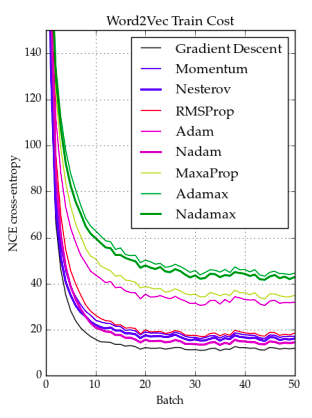

Referencia:
https://paperswithcode.com/method/nadam

https://cs229.stanford.edu/proj2015/054_report.pdf

**AdamW** es otra variante de Adam que integra una técnica de regularización llamada decaimiento del peso. El decaimiento del peso reduce el tamaño de los pesos del modelo en cada iteración de entrenamiento multiplicándolos por un factor de decaimiento como 0,99. Más concretamete, AdamW es un método de optimización estocástico que modifica la implementación típica de la descomposición del peso en Adam, separando la descomposición del peso de la actualización del gradiente. Para entender esto, la regularización $L_2$ en Adam se implementa normalmente con la siguiente modificación, donde $w_t$ es la tasa de descomposición del peso en el tiempo $t$:

$$
g_t = \nabla f(\theta_t) + w_t \theta_t
$$

mientras que AdamW ajusta el término de descomposición del peso para que aparezca en la actualización del gradiente:

$$
\theta_{t+1, i} = \theta_{t, i} - \eta \left( \frac{1}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t + w_t \cdot \theta_{t, i} \right), \quad \forall t
$$

Referencia: https://paperswithcode.com/method/adamw


**Función de pérdida:** para este problema, como lo que estamos haciendo es coger una imagen de entrada y reconstruirla lo más parecido posible, lo que necesitamos en una función de pérdida que mida las diferencias entre la imagen original y la reconstruida. Así haremos que penalice las diferencias dentre ambas imágenes. Por tanto, vamos a utilizar MSE (error cuadrático medio) que mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. Fórmula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2
$$

donde:
* $n$ es el número total de píxeles de la imagen.
* $x_i$ representa el valor del píxel original en la posición $i$.
* $\hat{x}_i$ representa el valor del píxel reconstruido por el modelo en la misma posición.

Cuánto más cercano a 0 mejor porque quiere decir que la diferencia entre la imagen original y la reconstruida es nula y por tanto, la reconstrucción será perfecta.

Penaliza fuerte los errores grandes porque está al cuadrado.


**Tamaño del lote (batch size)** puede tener un impacto significativo en el rendimiento del
modelo y en el tiempo de entrenamiento. La principal ventaja de utilizar lotes de gran tamaño es que los aceleradores de
hardware como las GPU pueden procesarlos de forma eficiente, por lo que el
algoritmo de entrenamiento verá más instancias por segundo. Sin embargo, hay un inconveniente porque los lotes grandes suelen provocar inestabilidades en el entrenamiento, sobre
todo al principio, y el modelo resultante puede no generalizar tan bien como un
modelo entrenado con lotes pequeños. Además, no siempre se tiene una gran memoria para que puedas poner un batch size muy grande.

En este caso también nos lo dan prefijado, pero sería intersante probar con más de dos ejemplos para ver cual funciona mejor.

**Función de activación**: en general, la función de activación ReLU será un buen valor por defecto para todas las capas ocultas. La función lineal unitaria rectificada:
$$ReLU(z) = max(0, z)$$
La función ReLU es continua pero no es diferenciable en z = 0, y su derivada es 0 para z < 0. En la práctica, sin embargo, funciona muy bien y tiene la ventaja de ser rápida de calcular, por lo que se ha convertido en la predeterminada.

Algunas otras funciones de activación (referencia de las diapositivas de teoría):
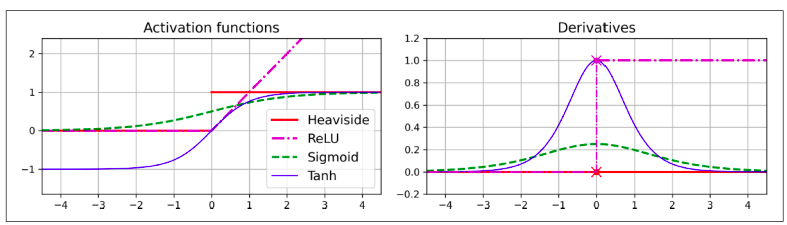




Ambas están fijas, o bien porque nos lo dan en la arquitectura del modelo o bien por el problema al que nos estamos enfrentando.

**Número de iteraciones**: en la mayoría de los casos, no es necesario ajustar el número de iteraciones de entrenamiento: basta con utilizar la parada anticipada (early stopping). Sin embargo, esto como ya nos lo dan también fijado, por lo que no lo vamos a cambiar.

## Validación del modelo. Discusión de resultados y extracción de conclusiones.

Vamos a ir haciendo pruebas cambiando diferentes hiperparámetros y así podremos ver cuales funcionan mejor.

Prueba con:
* Optimizador: Adam
* Lr=0.001
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder1 = build_encoder() #compilamos encoder
decoder1 = build_decoder() #compilamos decoder
autoencoder1 = build_autoencoder(encoder1, decoder1) #compilamos autoencoder

In [ ]:
# compilamos el modelo con Adam y tasa de aprendizaje 0.001
autoencoder1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenamiento
historia1 = autoencoder1.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,                #num de épocas
    batch_size=1000,          #bs
    validation_data=(val_images, val_images),  # val
    shuffle=True              # barajamos datos en cada época
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 185ms/step - loss: 0.0514 - val_loss: 0.0119
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 90ms/step - loss: 0.0101 - val_loss: 0.0067
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss:

In [ ]:
# metricas en test
evaluate_autoencoder_metrics(autoencoder1, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MSE medio:  0.001210
MAE medio:  0.010227


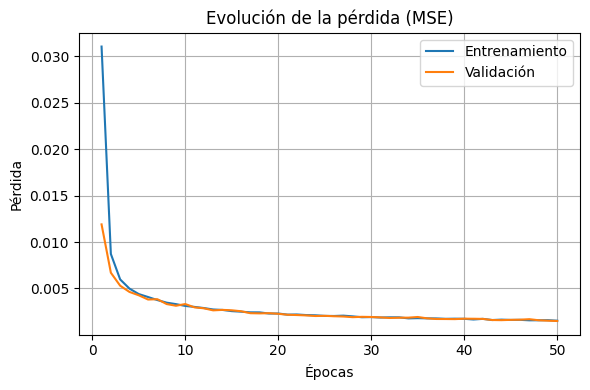

In [ ]:
# evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


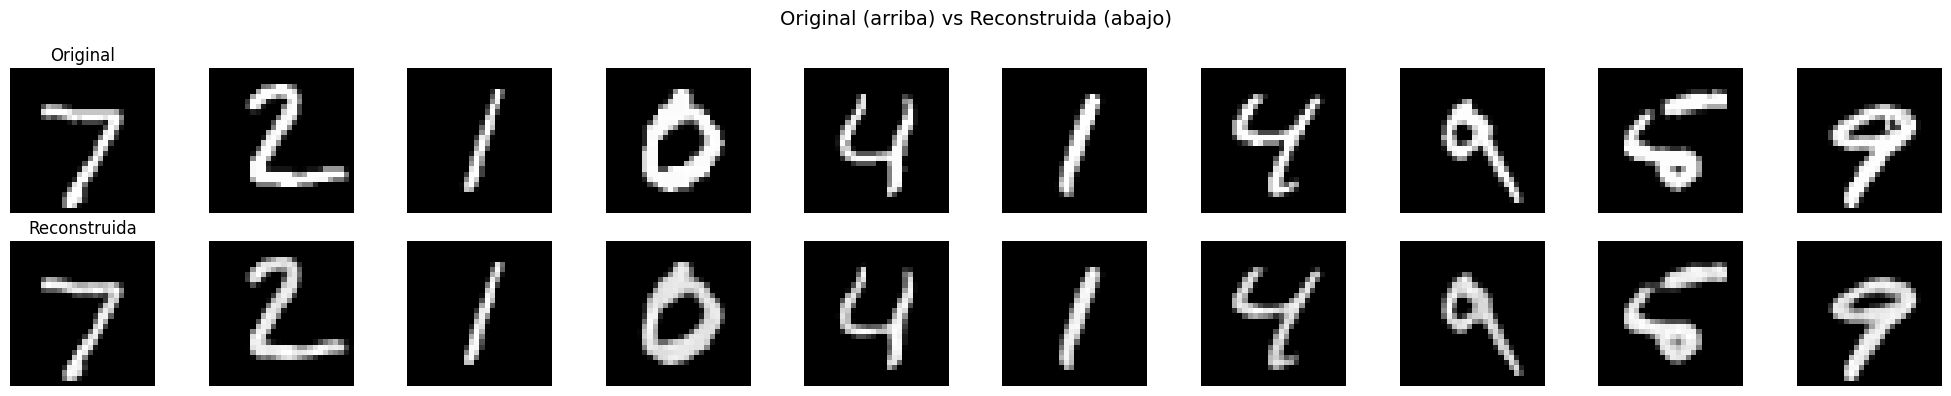

In [ ]:
# imagenes originales vs imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder1, test_images, num_examples=10)

Análisis del resultado: observando los resultados obtenidos, empieza con una pérdida considerablemente baja y va bajando aun más hasta llegar a 0.0019 en validación. Baja bastante rápido porque empieza con una loss de 0.0514 en train y baja en solo 10 épocas hasta 0.0030. Después de ese punto, va bajando más poco a poco hasta estabilizarse entorno al 0.0015 en validación.

No se observa sobreajuste porque las dos curvas, tanto la de entrenamiento como la de validación son casi iguales.

En general, la pérdida es bastante constante por lo que podemos decir que converge bien.

En cuanto a las métricas en test:

* MSE medio:  0.001210

* MAE medio:  0.010227

Los errores son bastante bajos, por lo que es una buena resolución. De hecho, lo que nos indica el MAE es que entre el intervalo $[0,1]$ hay un error de un 1%.

Si nos fijamos en la reconstrucción y en la imagen real, es muy difícil ver errores de reconstrucción. Es verdad que se ven las imágenes un poco más borrosas e incluso en la pernúltima imagen podemos ver que intenta reconstruir mejor la imagen.

Prueba con:
* Optimizador: Adamax
* Lr=0.002
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder2 = build_encoder() #compilamos encoder
decoder2 = build_decoder() #compilamos decoder
autoencoder2= build_autoencoder(encoder2, decoder2) #compilamos autoencoder

In [ ]:
# compilamos el modelo con Adamax y tasa de aprendizaje 0.002
autoencoder2.compile(optimizer = Adamax(learning_rate=0.002), loss='mse')

# Entrenamiento
historia2 = autoencoder2.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,
    batch_size=1000,          #bs
    validation_data=(val_images, val_images),  #val
    shuffle=True              #barajamos datos en cada época
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - loss: 0.0518 - val_loss: 0.0137
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0122 - val_loss: 0.0088
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.

In [ ]:
# metricas en test
evaluate_autoencoder_metrics(autoencoder2, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE medio:  0.001410
MAE medio:  0.010953


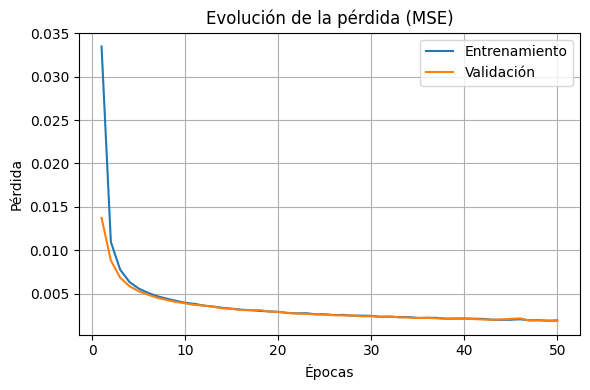

In [ ]:
#evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


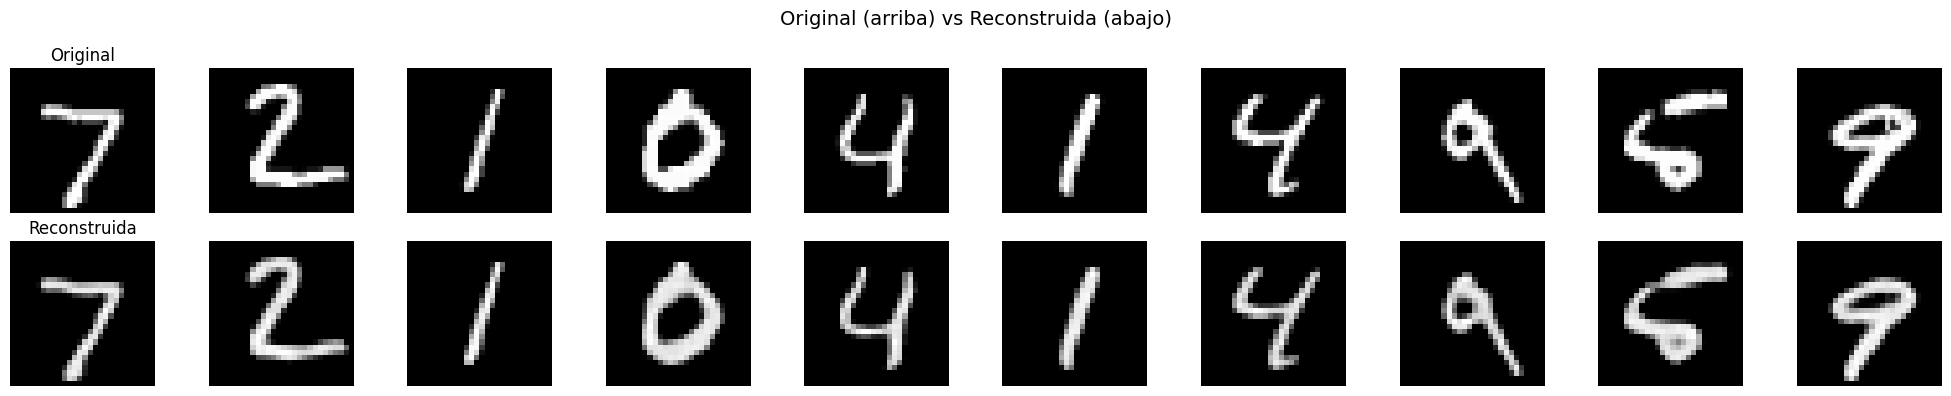

In [ ]:
# imagenes originales vs. imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder2, test_images, num_examples=10)

Para esta prueba hemos cambiado de optimizado, hemos usado una variante de Adam para ver si con nuestro dataset funciona mejor. Hemos utilizado el optimizador Adamax y con un lr de 0.002. Vemos como empieza con un poco más de loss que con el optimizador anterior y no llega a bajar tanto como el anterior porque se queda en un 0.0019 de pérdida en validación.

Al igual que antes hay un pérdida casi constante hasta el final y las dos curvas son bastante parecidas, por lo que no hay sobreaprendizaje.

Los resultados en test son:

MSE medio:  0.001410

MAE medio:  0.010953

Son un poco más altos que en la prueba anterior, por lo que es mejor la prueba anterior pero aun así las métricas siguen siendo bastante bajas, y por consiguiente, buenas.

Es curioso ver como en en las dos últimas fotos la reconstrucción parece sin ruido. Es decir, en la imagen real penúltima hay como una línea discontinua que parece un fallo, mientras que en la reconstruida la hace continua. Al revés pasa con el último 9, hay unos pixeles que parecen ruido en la real pero en la reconstruida, ese ruido no aparece. Por eso podemos pensar que sí sirven los autoencoders para quitar el ruido, de hecho, es una de sus funciones.

Prueba con:
* Optimizador: Nadam
* Lr=0.001
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder3 = build_encoder() #compilamos encoder
decoder3= build_decoder() #compilamos decoder
autoencoder3 = build_autoencoder(encoder3, decoder3) #compilamos autoencoder

In [ ]:
#comilamos el modelo con Nadam y tasa de aprendizaje 0.002
autoencoder3.compile(optimizer = Nadam(learning_rate=0.002), loss='mse')

# Entrenamiento
historia3 = autoencoder3.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,
    batch_size=1000,          #bs 1000
    validation_data=(val_images, val_images),  #val
    shuffle=True              #barajamos datos en cada época
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.0484 - val_loss: 0.0108
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - loss: 0.0086 - val_loss: 0.0057
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0

In [ ]:
#metricas en test
evaluate_autoencoder_metrics(autoencoder3, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE medio:  0.001595
MAE medio:  0.011655


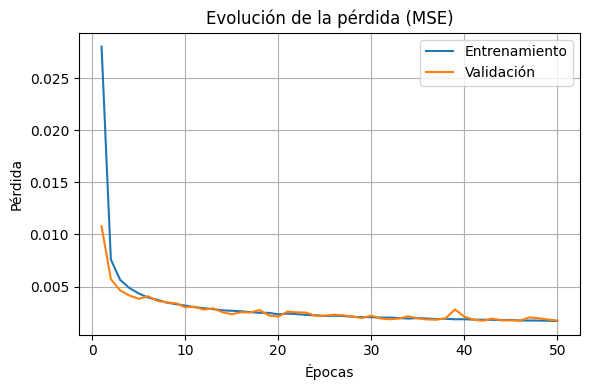

In [ ]:
#evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


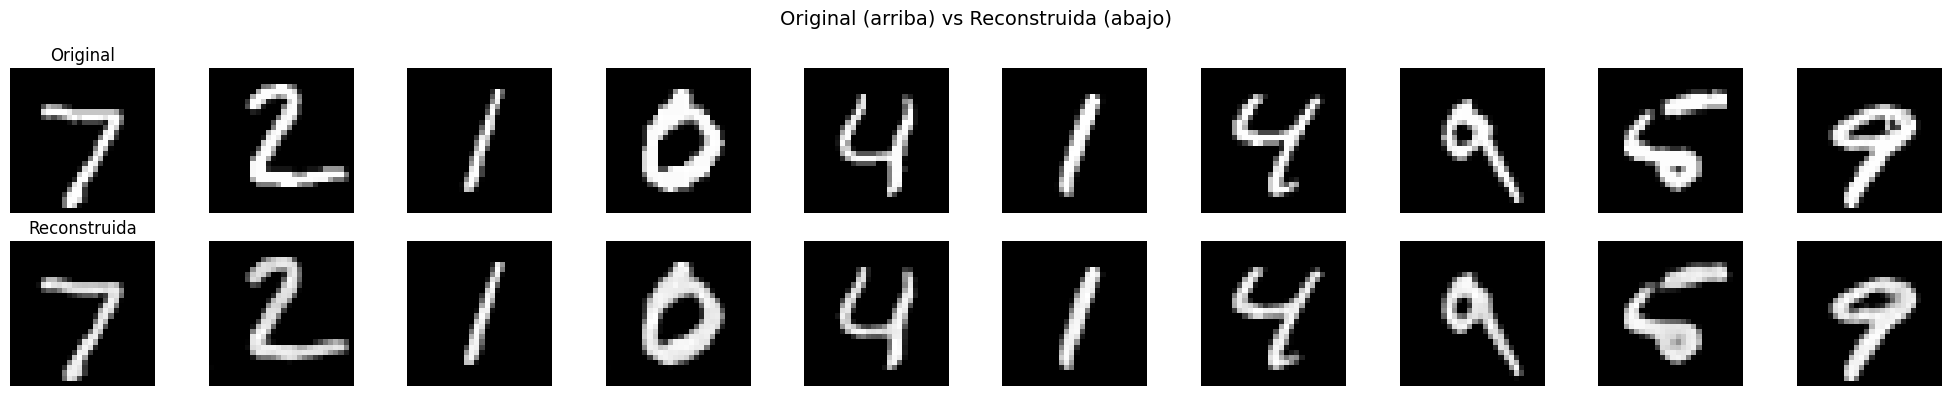

In [ ]:
#imagenes originales vs imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder3, test_images, num_examples=10)

Probamos con otra variante de Adam como optimizador: Nadam. Vemos como la pérdida desciende rápidamente en las primeras épocas aunque empieza a fluctuar al final (podemos ver que tiene algunos pequeños picos en la cruva naranja de validación). Las métricas en test han salido peores que en los otros dos optimizadores:

MSE medio:  0.001595

MAE medio:  0.011655

Por lo que no es tan adecuado este optimizador para este problema ya que nos ha generado más oscilación que bajar más la loss.

En cuanto a las imágenes reconstruidas, podemos ver como están más difuminadas que en las otras pruebas. Esto se debe a que el error es mayor, como ya hemos comentado.

Como por ahora el mejor optimizador que ha ido ha sido Adam, vamos a probar con ese optimizador pero con un programa del ritmo de aprendizaje.

Prueba con:
* Optimizador: Adam
* Power scheduler para el lr
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder4 = build_encoder() #compilamos encoder
decoder4= build_decoder() #compilamos decoder
autoencoder4 = build_autoencoder(encoder4, decoder4) #compilamos autoencoder

In [ ]:
#funcion para el programa de power scheduler
def power_scheduler(epoch, lr):
    decay = 0.05
    new_lr = lr * (1 / (1 + decay * epoch)) #formula
    return new_lr

#creamos el scheduler
scheduler = LearningRateScheduler(power_scheduler, verbose=1)

In [ ]:
# compilamos el modelo con Adam y tasa de aprendizaje 0.001
autoencoder4.compile(optimizer = Adam(learning_rate=0.001), loss='mse')

# Entrenamiento
historia4 = autoencoder4.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,
    batch_size=1000,          #bs
    validation_data=(val_images, val_images),  #val
    shuffle=True,              #barajamos datos en cada época
    callbacks=[scheduler]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - loss: 0.0480 - val_loss: 0.0123 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009523809976166202.
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0106 - val_loss: 0.0072 - learning_rate: 9.5238e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008658009094440124.
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0068 - val_loss: 0.0058 - learning_rate: 8.6580e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007528703376326873.
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0056 - val_loss: 0.0051 - learning_rate: 7.5287e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0006273919522451858.
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0049 - val_loss: 0.0046 - learning_rate: 6.2739e-04

Epoch 6: LearningRateScheduler setti

In [ ]:
#metricas en test
evaluate_autoencoder_metrics(autoencoder4, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
MSE medio:  0.002617
MAE medio:  0.015646


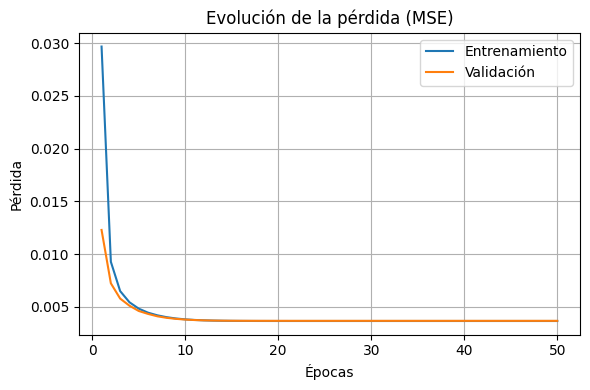

In [ ]:
#evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


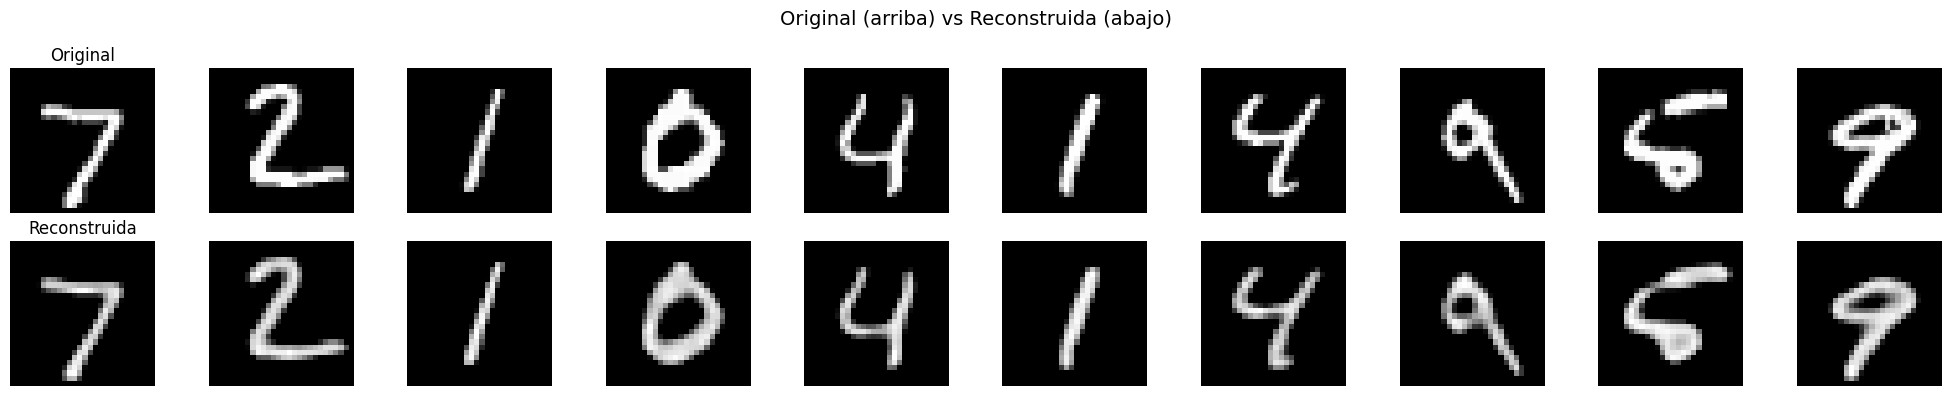

In [ ]:
#imagenes reales vs. imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder4, test_images, num_examples=10)

Podemos observar como baja rápidamente pero después prácticamente se estanca en una loss en validación de 0.0037, bastante más alta que todas las otras pruebas. Esto de debe a que el programa power scheduler baja el lr drásticamente por lo que deja de aprender demasiado pronto con un lr tan bajo. Los resultados:

MSE medio:  0.002617

MAE medio:  0.015646

Son superiores a los anteriores, por lo que confirmamos un peor comportamiento debido a este tipo de programa. Vamos a probar con otro programa: ReduceLROnPlateau.

Prueba con:
* Optimizador: Adam
* Reduce LR On Plateau para el lr
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder5 = build_encoder() #compilamos encoder
decoder5= build_decoder() #compilamos decoder
autoencoder5 = build_autoencoder(encoder5, decoder5) #compilamos autoencoder

In [ ]:
scheduler = ReduceLROnPlateau(
    monitor='val_loss',       #métrica
    factor=0.5,               #reducimos lr a la mitad
    patience=3,               #esperamos 3 epocas sin mejora para reducir el lr
    verbose=1,                #cuando se aplica se muestra una mensaje para saber que se ha aplicado
    min_lr=1e-5               #tasa mínima que puede alcanzar el lr
)

In [ ]:
#compilamos el modelo con Adam y tasa de aprendizaje 0.001
autoencoder5.compile(optimizer = Adam(learning_rate=0.001), loss='mse')

# Entrenamiento
historia5 = autoencoder5.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,
    batch_size=1000,          #bs
    validation_data=(val_images, val_images),  #val
    shuffle=True,              #barajamos datos en cada época
    callbacks=[scheduler]
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0521 - val_loss: 0.0132 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - loss: 0.0112 - val_loss: 0.0074 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0070 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0058 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0051 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0046 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0042 - val_loss: 0.0040 - learning_rate: 0.0010
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0039 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0038 - val_loss: 0.0034 - learning_rate: 0.0010
Epoch 10/50
54/54 ━

In [ ]:
#metricas en test
evaluate_autoencoder_metrics(autoencoder5, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MSE medio:  0.001384
MAE medio:  0.011243


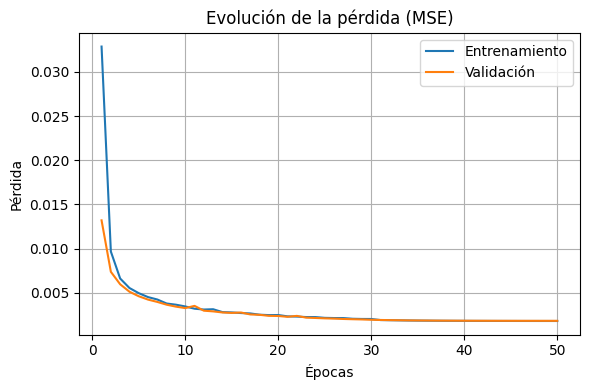

In [ ]:
#evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


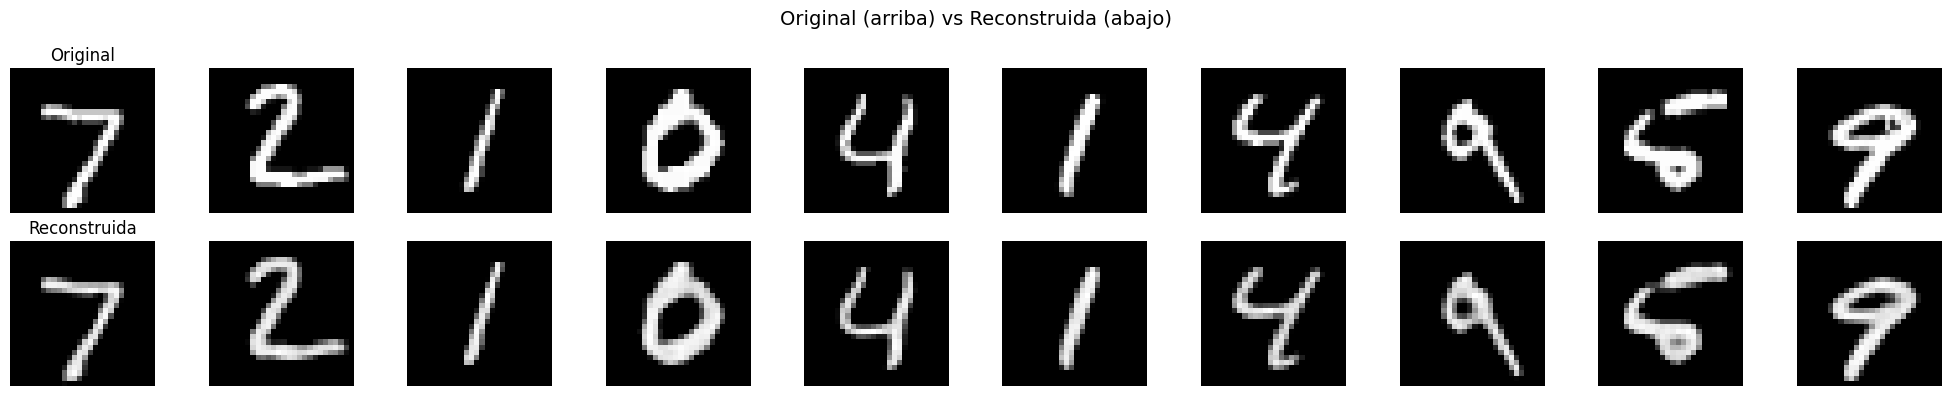

In [ ]:
#imagenes reales vs. imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder5, test_images, num_examples=10)

La loss baja considerablemente en las primeras épocas hasta la 30 sin aplicar el programa. A partir de ahí, como tiene una paciencia de 3, cada 3 épocas que no mejora reduce el lr y ralentiza el aprendizaje y empieza a ajustar.

Los resultados son mejores que el anterior, por lo que va mejor este programa. Sin embargo no mejora la primera ejecucción. Resultados en test:

MSE medio:  0.001384

MAE medio:  0.011243

En conclusión, es una buena paroximación, bastante mejor que la anterior, pero no supera a la prueba con Adam sin programa.

Prueba con:
* Optimizador: AdamW
* Lr=0.001
* Weight decay: 0.0001
* Loss function: MSE
* Bs=1000
* 50 épocas

In [ ]:
encoder6 = build_encoder() #compilamos encoder
decoder6= build_decoder() #compilamos decoder
autoencoder6 = build_autoencoder(encoder6, decoder6) #compilamos autoencoder

In [ ]:
# compilamos el modelo con AdamW y tasa de aprendizaje 0.001
autoencoder6.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4), loss='mse')

# Entrenamiento
historia6 = autoencoder6.fit(
    train_images_sub,         #datos de entrada
    train_images_sub,         #objetivo, que es la misma imagen
    epochs=50,
    batch_size=1000,          #bs
    validation_data=(val_images, val_images),  #val
    shuffle=True              #barajamos datos en cada época
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - loss: 0.0555 - val_loss: 0.0117
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0102 - val_loss: 0.0072
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0048 - val_loss: 0.0044
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0

In [ ]:
#metricas en test
evaluate_autoencoder_metrics(autoencoder6, test_images, dataset_name="Test", num_examples=10)


Evaluación del Autoencoder - Test
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
MSE medio:  0.001261
MAE medio:  0.010211


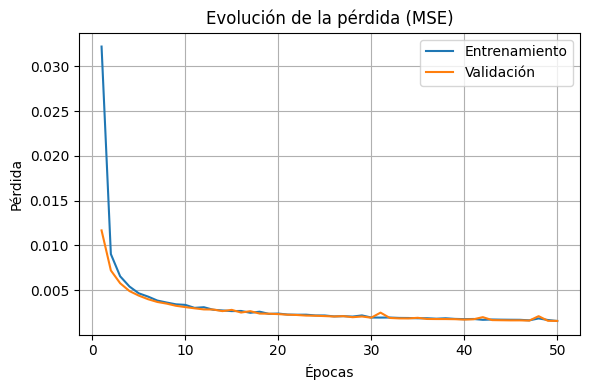

In [ ]:
#evolucion de la pérdida durante el entrenamiento
plot_autoencoder_training_metrics(historia6)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


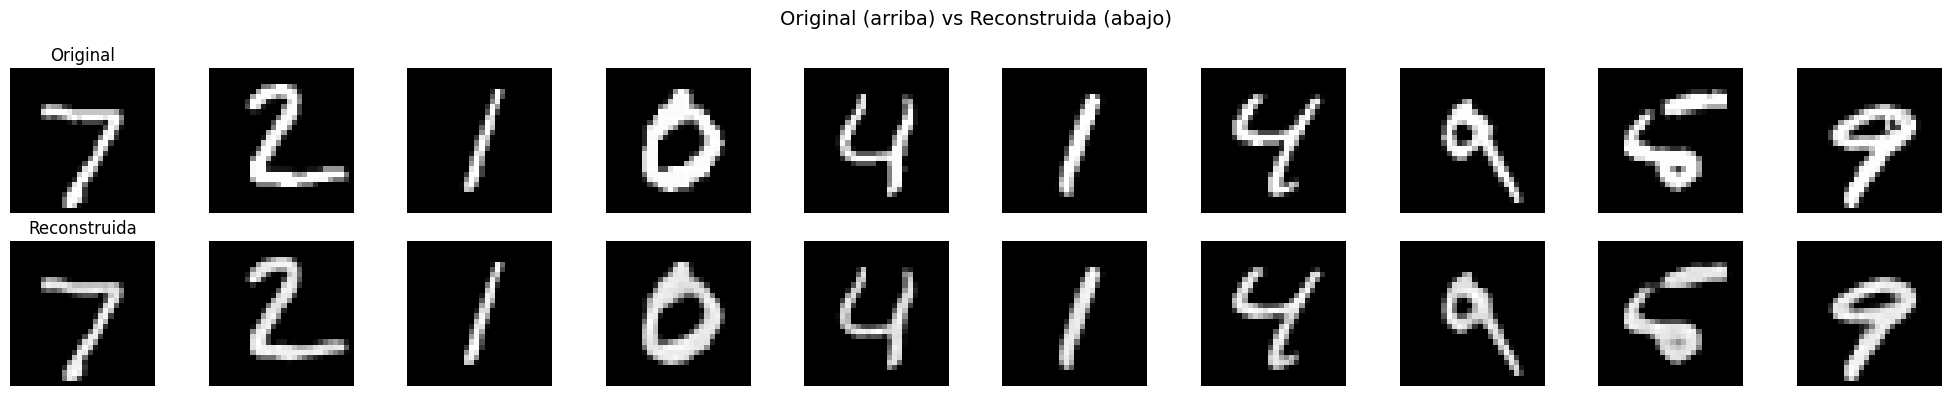

In [ ]:
# imagenes originales vs. imágenes reconstruidas
plot_original_vs_reconstructed(autoencoder6, test_images, num_examples=10)

Para esta última ejecucción hemos cambiado el optimizado a AdamW, una versión de Adam. Los resultados son bastantes buenos sin sobreajuste y con una curva de pérdida buena. Parece que oscila un poco pero puede ser que sea para buscar por otros entornos y no quedarse con un espacio de búsqueda subóptimo.

Los resultados son muy parecidos a la primera ejecucción con Adam. El MSE empeora un poco pero el MAE mejora un poco, por lo que son resultados parecidos.

Las reconstrucciones son excelentes porque son prácticamente iguales a las reales.

Tabla resumen de todas las pruebas:

| Nº | Optimizador | LR inicial | Scheduler                  | Weight Decay | MSE Test  | MAE Test  |
|----|-------------|------------|-----------------------------|---------------|-----------|-----------|
| 1  | Adam        | 0.001      | Ninguno                     | No            | 0.001210  | 0.010227  |
| 2  | Adamax      | 0.002      | Ninguno                     | No            | 0.001410  | 0.010953  |
| 3  | Nadam       | 0.001      | Ninguno                     | No            | 0.001595  | 0.011655  |
| 4  | Adam        | 0.001      | Power Decay                 | No            | 0.002617  | 0.015646  |
| 5  | Adam        | 0.001      | Reduce LR On Plateau        | No            | 0.001384  | 0.011243  |
| 6  | AdamW       | 0.001      | Ninguno                     | 0.0001        | 0.001261  | 0.010211  |


En conclusión, las mejores ejecucciones han sido la primera y la última con los optimizadores Adam y AdamW que se adecuan muy bien al problema abordado.

## Cuestiones extras
Cuando el modelo **autoencoder** ya esté entrenado, además de su validación con el conjunto de test, realice las siguientes pruebas:

- **Usando sólo el encoder**:
   1. Seleccione todas las imágenes de un mismo dígito (por ejemplo, el dígito 0).
   2. Envíe esas imágenes como entrada al encoder, y obtenga los resultados de los embeddings.
   3. Calcule un **embedding promedio** calculando la media de cada componente de todos los embeddings.

- **Usando sólo el decoder**:
   4. Proporcione este nuevo **embedding promedio** como entrada al **Decoder**. ¿Qué se obtiene? ¿Es lógico el resultado?


- Realice los pasos anteriores del **Encoder** con todos los dígitos pero, en este caso, guarde el valor promedio y de desviación estándar (a este último lo denominaremos **embedding de desviación**.
- Genere, para cada dígito, varios **nuevos embeddings** simulando un muestreo desde una distribución normal de media el embedding promedio y desviación típica el embedding de desviación.
- Utilice los **embeddings nuevos** como entrada al módulo **Decoder**. ¿Qué se obtiene?
- Analice y discuta los resultados obtenidos.

Como ya tenemos entrenado el autoencoder entero, vamos a usar solo el encoder y calcular el embedding promedio de un dígito concreto (por ejemplo, el 0).

In [33]:
encoder = build_encoder() #compilamos encoder solo

In [34]:
#nos quedamos solo imágenes del dígito 0
digit=0 #el digito que hemos elegido para quedarnos
digit_images = test_images[test_labels == digit] #con las imagenes de test

In [35]:
# eviamos las imagenes como entrada al encoder
embeddings = encoder.predict(digit_images, verbose=0)

In [36]:
#calculamos el embbedding promedio
embedding_mean = np.mean(embeddings, axis=0)
print("Embedding promedio del dígito 0:")
print(embedding_mean)

Embedding promedio del dígito 0:
[[[1.08066823e-04 2.13738211e-04 9.83063946e-05 3.33039497e-04
   1.09813118e-04 3.11240001e-04 1.30017244e-04 2.89659165e-05
   1.41810684e-04 6.99993398e-05 2.96704529e-04 1.60625874e-04
   9.14589691e-05 1.60842251e-06 3.46048211e-07 8.99012812e-05]
  [1.42004224e-03 7.51480926e-03 3.54695343e-03 4.12940560e-03
   1.69461686e-03 6.79741520e-03 1.86766055e-03 2.62686604e-04
   2.19139410e-03 4.01811115e-03 6.82160212e-03 5.15185343e-03
   2.04678974e-03 8.26967371e-05 8.67725157e-06 2.57736910e-03]
  [6.61011459e-03 3.94572169e-02 2.20126845e-02 8.45904462e-03
   3.66402394e-03 3.25523056e-02 1.06829964e-02 1.28565030e-03
   2.57055252e-03 3.10323853e-02 2.43024267e-02 3.45626883e-02
   1.38019230e-02 6.14926859e-04 3.90675741e-05 2.48309169e-02]
  [2.14643721e-02 5.10514937e-02 3.38342935e-02 1.05316406e-02
   4.03963728e-03 5.34383282e-02 2.97574680e-02 8.65459815e-03
   4.02588543e-04 6.71259090e-02 2.62310877e-02 7.47213066e-02
   1.93416327e-02 6

Usando sólo el decoder:

Proporcione este nuevo embedding promedio como entrada al Decoder. ¿Qué se obtiene? ¿Es lógico el resultado?

In [37]:
decoder = build_decoder() #compilamos decoder solo

#ahora vamos a usar solo el decoder para reconstruir imagen a partir del embedding medio
reconstructed_image = decoder.predict(np.expand_dims(embedding_mean, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


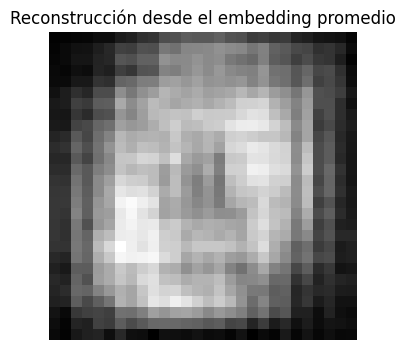

In [38]:
#graficamos el embedding medio
plt.figure(figsize=(4, 4))
plt.imshow(reconstructed_image.squeeze(), cmap='gray')
plt.title("Reconstrucción desde el embedding promedio")
plt.axis('off')
plt.show()

Esta imagen borrosa es lo que hemos obtenido tras reconstruir desde el embedding promedio del dígito 0. Es muy difusa pero nos podemos ver un 0 muy disimulado ya que por el centro es más negro y hace una especie de círculo (ls zonas más blancas).

El resultado es lógico ya que no estamos graficando una instancia tal cual, sino que estamos representando las medias de todas las imágenes del dígito 0. Por eso obtenemos un 0 borroso con las características comunes de un 0.  

Esto nos dice que el modelo generaliza bien porque no se sobreajusta a una única forma de pintar un 0, que está bien estructurado porque reconstruye intuituvamente la forma de un 0 y que la compresión funciona.

Vamos ahora a hacer lo mismo pero con todos los dígitos guardando el valor promedio y de desviación estándar (embedding de desviación).

In [51]:
#funcion para generar el embedding promedio de cada digito
def generate_and_decode_from_distribution(encoder, decoder, X_test, Y_test, num_samples=5):
    digit_embeddings = {} #diccionario donde guardaremos: digito+embbeding medio+desviacion tipica

    #calculamos la forma del embedding de salida del encoder con una imagen de prueba
    sample_embedding = encoder.predict(np.expand_dims(X_test[0], axis=0))
    embedding_shape = sample_embedding.shape[1:]
    embedding_size = np.prod(embedding_shape) #para poder aplanar luego

    # calculamos la media y desviación estándar
    for digit in range(10): #para los 10 digitos
        digit_images = X_test[Y_test == digit] #nos quedamos con las imagenes de test del digito actual

        # calculamos embeddings del encoder
        embeddings = encoder.predict(digit_images)

        # aplanamos
        flat_embeddings = embeddings.reshape((embeddings.shape[0], -1))

        # media y desviacion tipica
        mean_embedding = np.mean(flat_embeddings, axis=0)
        std_embedding = np.std(flat_embeddings, axis=0)

        #guardamos en el diccionario
        digit_embeddings[digit] = (mean_embedding, std_embedding)

    # para cada digito vamos a recuperar la media y la desviacion tipica calculada
    for digit in range(10):
        mean_emb, std_emb = digit_embeddings[digit]

        #dsitribuncion normal multivariante con la media y la desviacion
        sampled_embeddings = np.random.normal(loc=mean_emb, scale=std_emb, size=(num_samples, embedding_size))

        #lo convertimos a su forma original
        sampled_embeddings = sampled_embeddings.reshape((num_samples, *embedding_shape))

        #decodificamos
        decoded_images = decoder.predict(sampled_embeddings)

        # graficamos
        plt.figure(figsize=(10, 2))
        for i in range(num_samples):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(np.squeeze(decoded_images[i]), cmap='gray')
            plt.axis('off')
        plt.suptitle(f"Imágenes generadas para dígito {digit}", fontsize=12)
        plt.tight_layout()
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


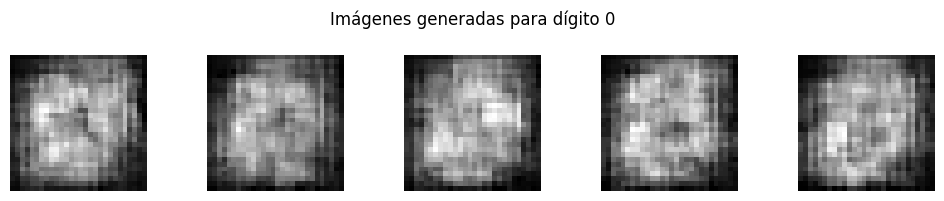

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


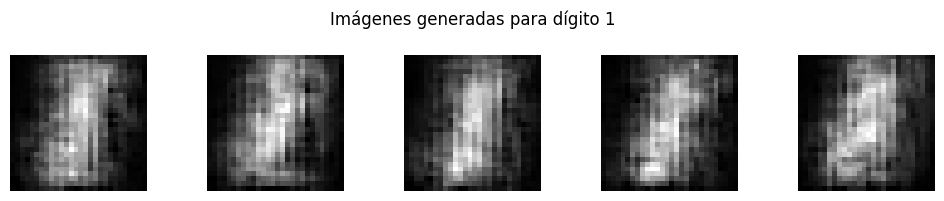

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


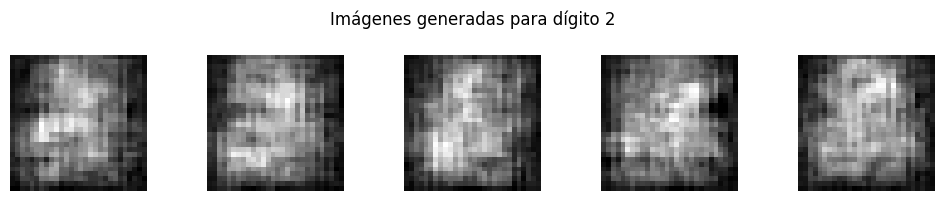

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


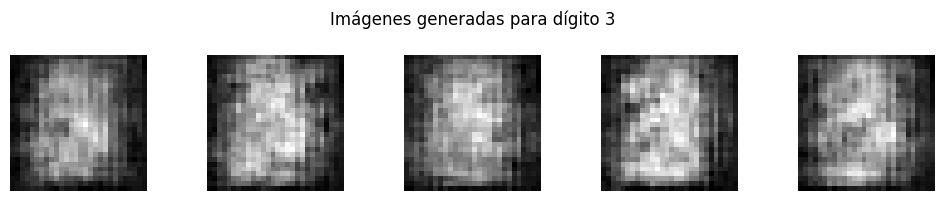

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


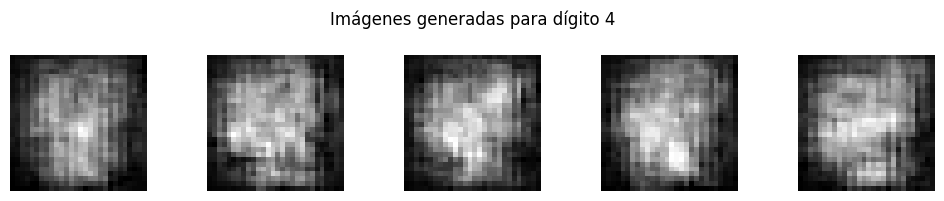

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


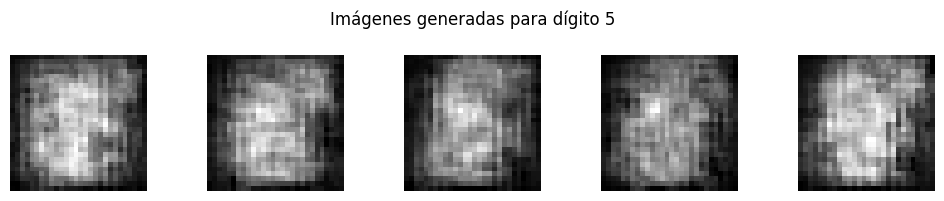

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


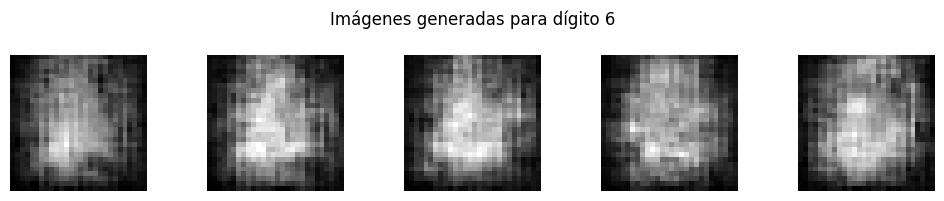

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


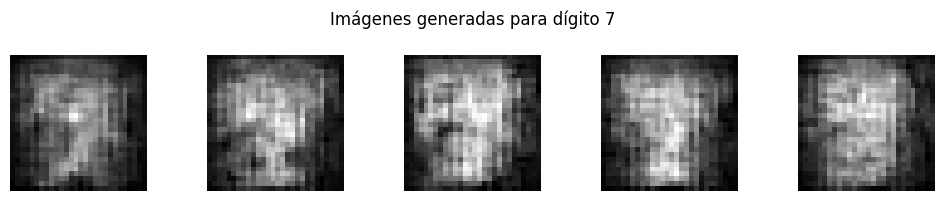

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


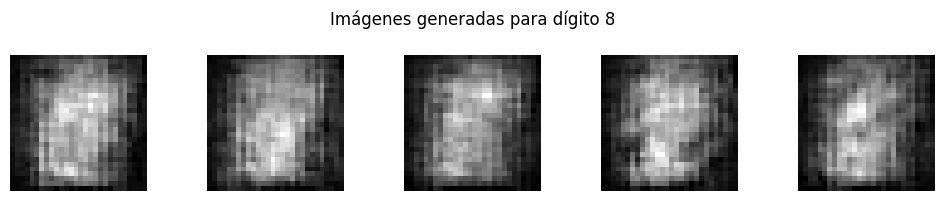

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


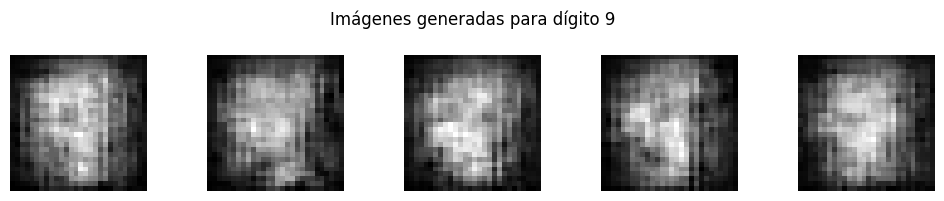

In [52]:
generate_and_decode_from_distribution(encoder, decoder, test_images, test_labels, num_samples=5)

Ya tenemos las imágenes de los embeddings para todos los dígitos. Son todas imágenes borrosas y difuminadas pero que si nos vamos fijando en los dígitos, podemos ver como hay ciertas características que en un número tienen sentido y son más blancas. Por ejemplo, en el 1, se ve una línea vertical, aunque a veces en diagonal.

Si nos fijamos en cada dígito, el 0,6 y 9 son los que más se pueden intuir, incluso el 1 y 7 por la línea vertical aunque no se distingan mucho entre ellos. El 3, 8, 4, 5 y 2 son bastante más complicados de intuir porque tienen bastante más detalles y dependiendo de los ejemplos pueden ser más liosos y tener más concetración en muchos píxeles de la imagen.